In [248]:
!unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
replace data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, stats, skew
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import scipy.stats as stats

In [496]:
raw_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
raw_data.drop(columns=['Id'], inplace=True)
test_data.drop(columns=['Id'], inplace=True)

In [497]:
test_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [498]:
raw_data.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [499]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [500]:
raw_data.shape

(1460, 80)

In [501]:
df = raw_data.copy()

Text(0.5, 0, 'salePrice in dollars - $')

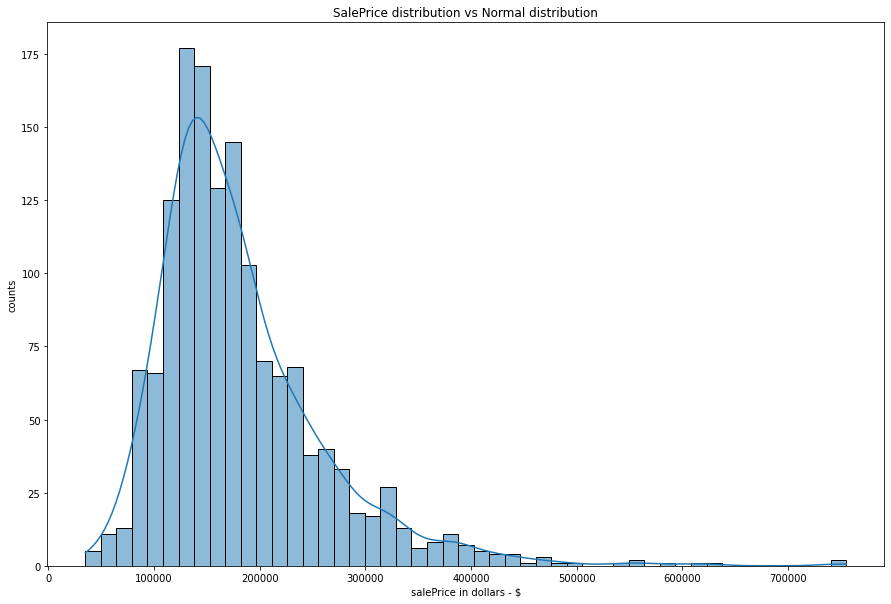

In [502]:
(mu, sigma) = norm.fit(df.SalePrice)
plt.figure(figsize=(15, 10))
sns.histplot(data=df.SalePrice, kde=True)
plt.title('SalePrice distribution vs Normal distribution')
plt.ylabel('counts')
plt.xlabel('salePrice in dollars - $')

<AxesSubplot:>

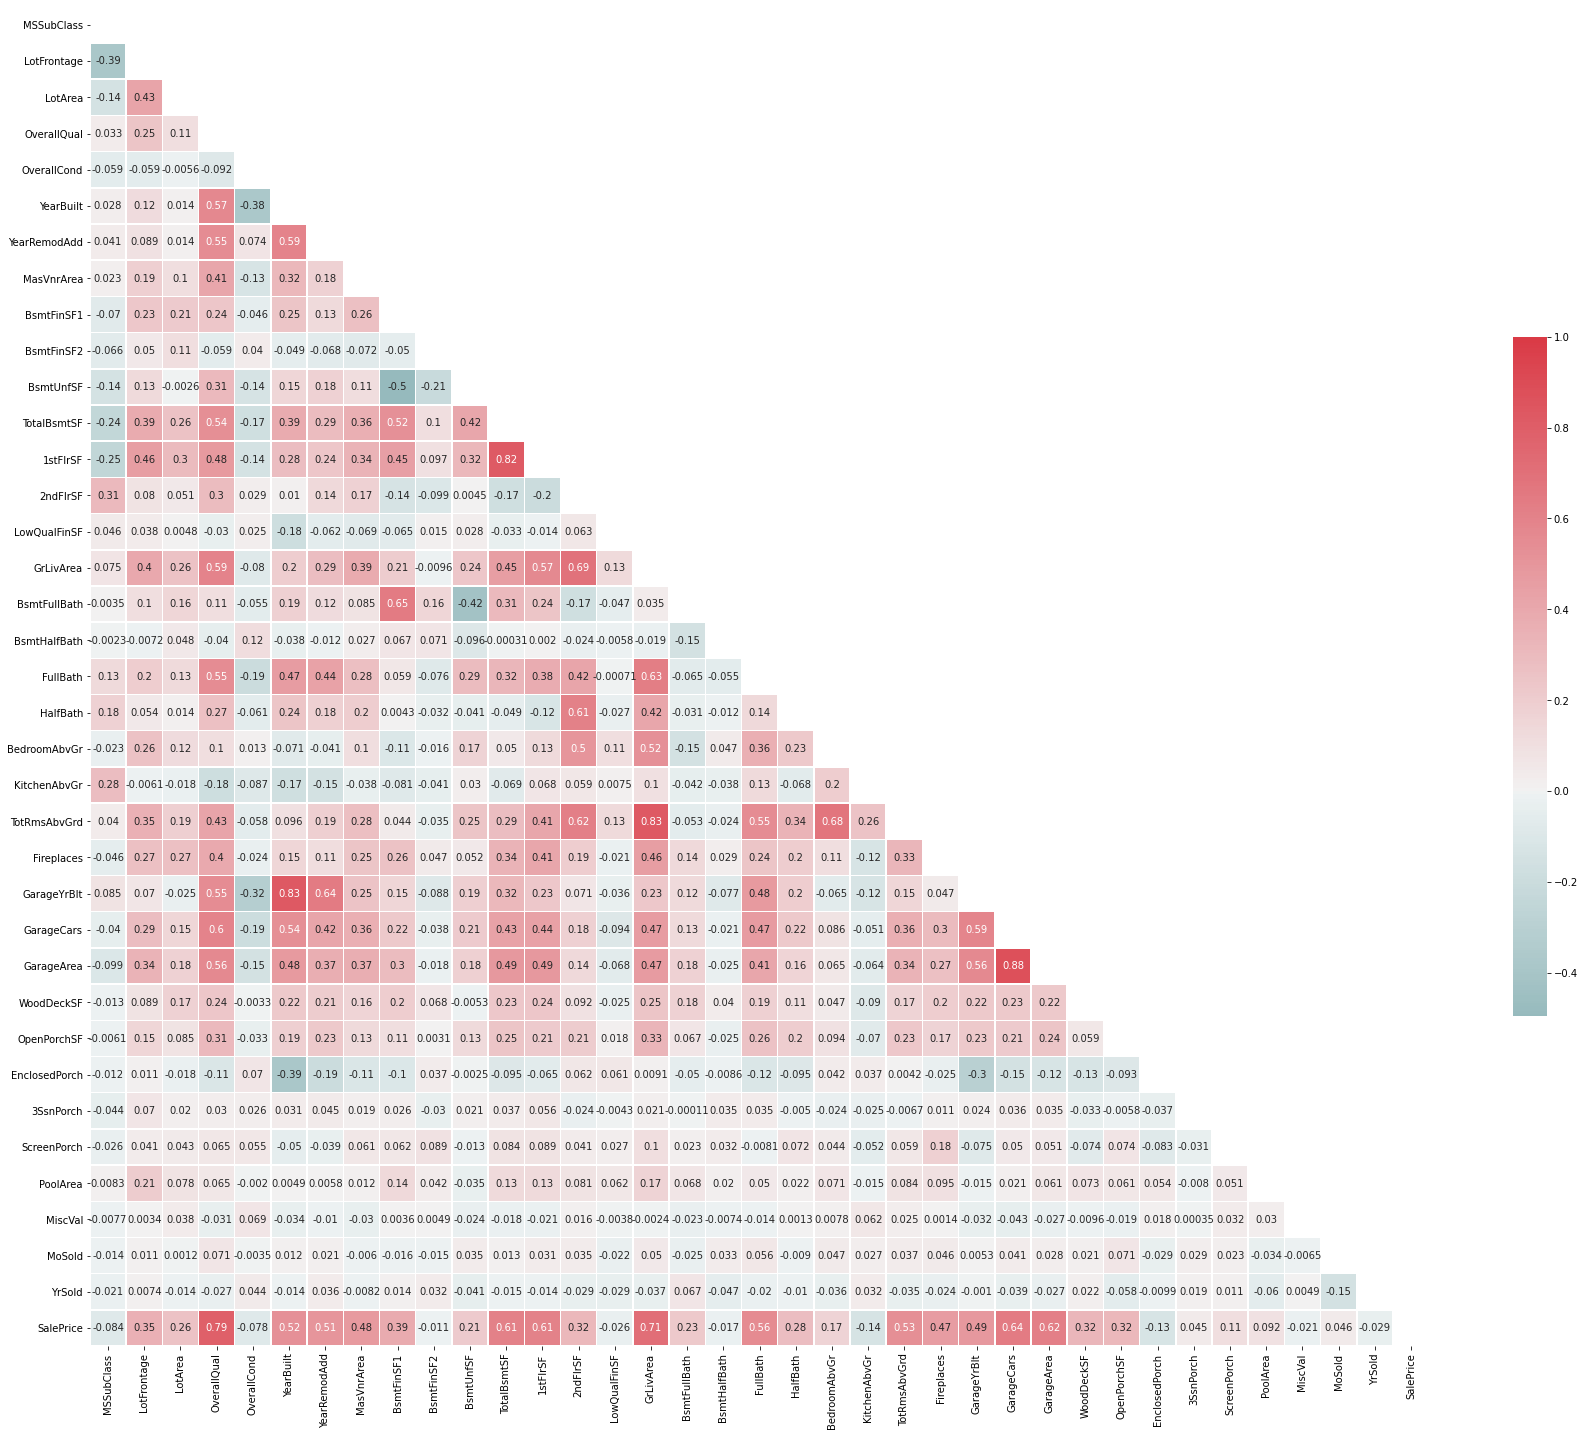

In [503]:
plt.figure(figsize=(30, 25))
corr_mat = df.corr()
mask = np.triu(corr_mat)
cmap = sns.diverging_palette(200, 10, as_cmap=True)
sns.heatmap(corr_mat, mask=mask, vmax=1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap=cmap)

In [504]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

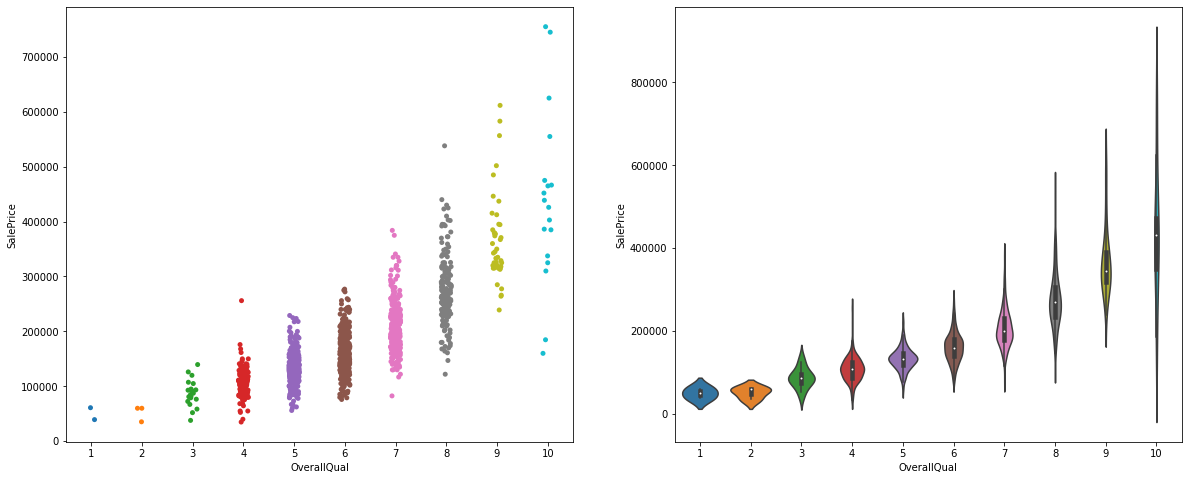

In [505]:
figure, ax = plt.subplots(1,2, figsize = (20,8))
sns.stripplot(data=df, x = 'OverallQual', y='SalePrice', ax = ax[0])
sns.violinplot(data=df, x = 'OverallQual', y='SalePrice', ax = ax[1])
plt.show()

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

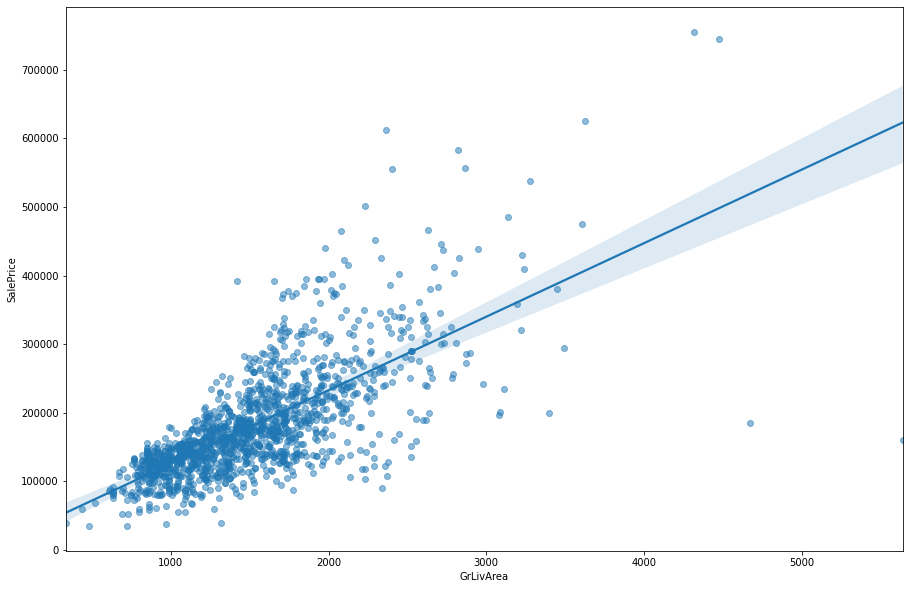

In [506]:
plt.figure(figsize=(15, 10))
sns.regplot(data=df, x='GrLivArea', y='SalePrice', scatter_kws={'alpha': .5})

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

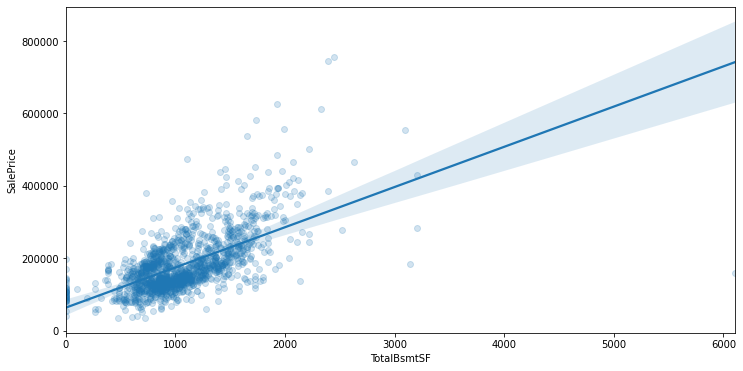

In [507]:
plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'TotalBsmtSF', y='SalePrice', scatter_kws={'alpha':0.2})

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

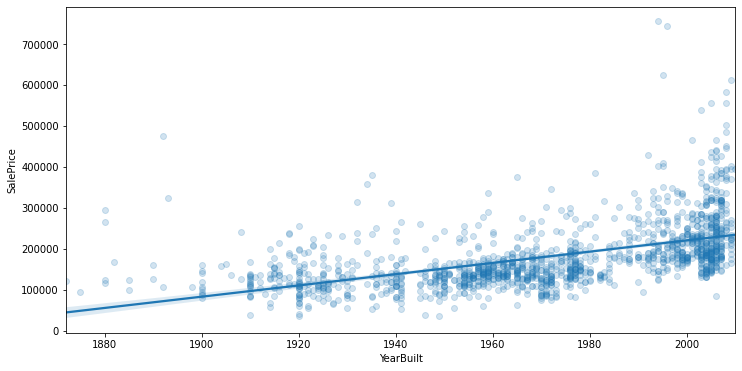

In [508]:
plt.figure(figsize = (12,6))
sns.regplot(data=df, x = 'YearBuilt', y='SalePrice', scatter_kws={'alpha':0.2})

<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

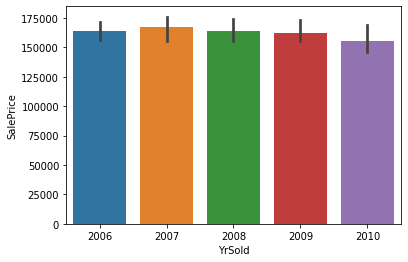

In [509]:
sns.barplot(x='YrSold', y="SalePrice", data = df, estimator = np.median)

In [510]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [571]:
features_df = df.copy()
test_data['SalePrice'] = 0
features_df = features_df.append(test_data)
features_df.reset_index(inplace=True, drop=True)

In [573]:
features_df.index

RangeIndex(start=0, stop=2919, step=1)

In [575]:
features_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,0
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,0
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,0
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,0


In [576]:
nan = pd.DataFrame(features_df.isna().sum(), columns=['NanCounts'])
nan['percentage'] = nan['NanCounts'] / 1460 * 100
nan = nan[nan['NanCounts'] > 0].sort_values(by='percentage')
nan

,NanCounts,percentage
TotalBsmtSF,1,0.068493
GarageArea,1,0.068493
GarageCars,1,0.068493
KitchenQual,1,0.068493
Electrical,1,0.068493
BsmtUnfSF,1,0.068493
BsmtFinSF2,1,0.068493
BsmtFinSF1,1,0.068493
SaleType,1,0.068493
Exterior1st,1,0.068493


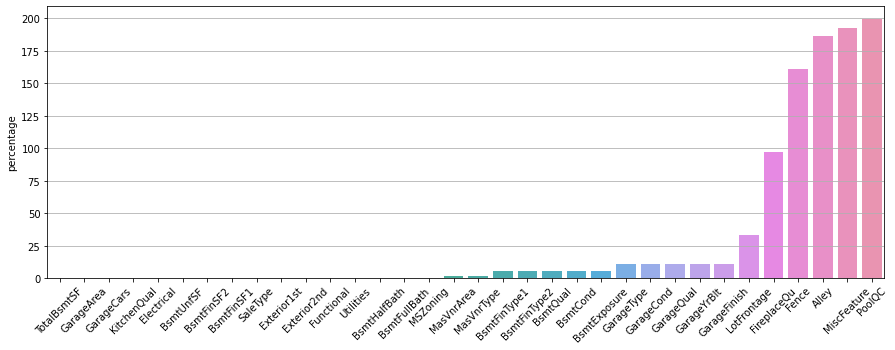

In [577]:
plt.figure(figsize=(15, 5))
sns.barplot(x=nan.index, y=nan['percentage'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [578]:
features_df['Alley'].fillna(value='No alley access', inplace=True)
features_df['PoolQC'].fillna(value='No Pool', inplace=True)
features_df['Fence'].fillna(value='No Fence', inplace=True)
features_df['MiscFeature'].fillna(value='None', inplace=True)
features_df['BsmtQual'].fillna(value='No Basement', inplace=True)
features_df['BsmtCond'].fillna(value='No Basement', inplace=True)
features_df['BsmtExposure'].fillna(value='No Basement', inplace=True)
features_df['BsmtFinType1'].fillna(value='No Basement', inplace=True)
features_df['BsmtFinType2'].fillna(value='No Basement', inplace=True)
features_df['FireplaceQu'].fillna(value='No Fireplace', inplace=True)
features_df['GarageType'].fillna(value='No Garage', inplace=True)
features_df['GarageFinish'].fillna(value='No Garage', inplace=True)
features_df['GarageQual'].fillna(value='No Garage', inplace=True)
features_df['GarageCond'].fillna(value='No Garage', inplace=True)

In [579]:
nan = pd.DataFrame(features_df.isna().sum(), columns=['NanCounts'])
nan['percentage'] = nan['NanCounts'] / 1460 * 100
nan = nan[nan['NanCounts'] > 0].sort_values(by='percentage')
nan

,NanCounts,percentage
BsmtUnfSF,1,0.068493
GarageCars,1,0.068493
KitchenQual,1,0.068493
Electrical,1,0.068493
TotalBsmtSF,1,0.068493
GarageArea,1,0.068493
BsmtFinSF2,1,0.068493
SaleType,1,0.068493
Exterior2nd,1,0.068493
Exterior1st,1,0.068493


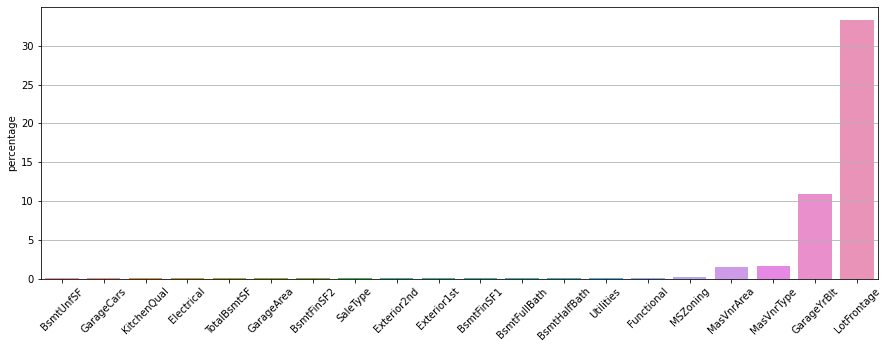

In [580]:
plt.figure(figsize=(15, 5))
sns.barplot(x=nan.index, y=nan['percentage'])
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [581]:
for col in features_df.columns:
    if features_df[col].isna().sum() > 0:
        print(col)

MSZoning
LotFrontage
Utilities
Exterior1st
Exterior2nd
MasVnrType
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
Electrical
BsmtFullBath
BsmtHalfBath
KitchenQual
Functional
GarageYrBlt
GarageCars
GarageArea
SaleType


In [582]:
useless_cols = ['LotFrontage', 'GarageYrBlt']
features_df.drop(columns=useless_cols, axis=1, inplace=True)

In [583]:
nan = pd.DataFrame(features_df.isna().sum(), columns=['NanCounts'])
nan['percentage'] = nan['NanCounts'] / 1460 * 100
nan = nan[nan['NanCounts'] > 0].sort_values(by='percentage')
nan

,NanCounts,percentage
BsmtUnfSF,1,0.068493
GarageCars,1,0.068493
KitchenQual,1,0.068493
Electrical,1,0.068493
TotalBsmtSF,1,0.068493
GarageArea,1,0.068493
BsmtFinSF2,1,0.068493
SaleType,1,0.068493
Exterior2nd,1,0.068493
Exterior1st,1,0.068493


In [584]:
features_df.dropna(inplace=True)

In [585]:
features_df.shape

(2882, 78)

In [586]:
features_df

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,Gtl,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,Gtl,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,160,RM,1936,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,No Pool,No Fence,None,0,6,2006,WD,Normal,0
2915,160,RM,1894,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,No Pool,No Fence,None,0,4,2006,WD,Abnorml,0
2916,20,RL,20000,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,No Pool,No Fence,None,0,9,2006,WD,Abnorml,0
2917,85,RL,10441,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,No Pool,MnPrv,Shed,700,7,2006,WD,Normal,0


In [587]:
features_df.head(3)

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,Gtl,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,Gtl,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500


In [588]:
df_numbers = features_df.select_dtypes(exclude='object')
df_categoricals = features_df.select_dtypes(include='object')

In [589]:
df_numbers.shape[1], df_categoricals.shape[1]

(35, 43)

In [590]:
df_categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,2882,2882,2882,2882,2882,2882,2882,2882,2882,2882,...,2882,2882,2882,2882,2882,2882,2882,2882,2882,2882
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,No alley access,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,No Pool,No Fence,None,WD,Normal
freq,2242,2871,2687,1838,2589,2881,2108,2742,443,2484,...,1698,1217,2573,2625,2611,2872,2313,2778,2505,2382


In [591]:
df_numbers.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,...,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000,2882.000000
mean,57.302221,10103.730396,6.089174,5.575642,1971.206107,1984.180777,102.511103,442.343511,49.795628,560.041985,...,94.190493,47.169327,22.999653,2.635670,16.239417,2.280708,51.218251,6.209924,2007.794587,90938.782790
std,42.649780,7812.027633,1.401403,1.105037,30.215365,20.854755,179.584636,455.340108,169.418562,438.993978,...,126.928071,67.147952,64.136507,25.347659,56.501028,35.891308,570.857095,2.706901,1.317966,106417.357383
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000
25%,20.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,0.000000,0.000000,220.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,0.000000
50%,50.000000,9429.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,370.000000,0.000000,466.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,57246.500000
75%,70.000000,11500.000000,7.000000,6.000000,2000.000000,2004.000000,164.750000,733.000000,0.000000,802.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,163000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [592]:
df_numbers = df_numbers[(np.abs(stats.zscore(df_numbers)) < 3).all(axis=1)]

In [593]:
df_numbers.index

Int64Index([   0,    2,    4,    6,   10,   11,   12,   13,   14,   15,
            ...
            2907, 2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2918],
           dtype='int64', length=2043)

In [594]:
df_categoricals.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2909, 2910, 2911, 2912, 2913, 2914, 2915, 2916, 2917, 2918],
           dtype='int64', length=2882)

In [595]:
df_categoricals = df_categoricals.loc[df_numbers.index]

In [596]:
df_categoricals = pd.get_dummies(df_categoricals, drop_first=True)

In [597]:
df_categoricals.head(3)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_No alley access,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [598]:
df_numbers.head(3)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,61,0,0,0,0,0,2,2008,208500
2,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,42,0,0,0,0,0,9,2008,223500
4,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,192,84,0,0,0,0,0,12,2008,250000


In [599]:
all_features_df = pd.concat([df_numbers, df_categoricals], axis=1)
all_features_df.reset_index(drop=True, inplace=True)

In [603]:
train_data_df = all_features_df[all_features_df['SalePrice'] > 0]
test_data_df = all_features_df[all_features_df['SalePrice'] == 0]

In [608]:
'SalePrice' in test_data_df.columns

False

In [607]:
test_data_df.drop(columns=['SalePrice'], axis=1, inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [610]:
train_data_df

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,0,1,0,0,0,1,0
1,60,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,0,1,0,0,0,1,0
2,60,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,0,1,0,0,0,1,0
3,20,10084,8,5,2004,2005,186.0,1369.0,0.0,317.0,...,0,0,0,0,1,0,0,0,1,0
4,20,11200,5,5,1965,1965,0.0,906.0,0.0,134.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,180,3675,5,5,2005,2005,80.0,547.0,0.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1026,20,17217,5,5,2006,2006,0.0,0.0,0.0,1140.0,...,0,0,0,0,1,0,0,0,0,0
1027,20,7500,7,5,2004,2005,0.0,410.0,0.0,811.0,...,0,0,0,0,1,0,0,0,1,0
1028,60,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,...,0,0,0,0,1,0,0,0,1,0


In [617]:
target_df = train_data_df['SalePrice']

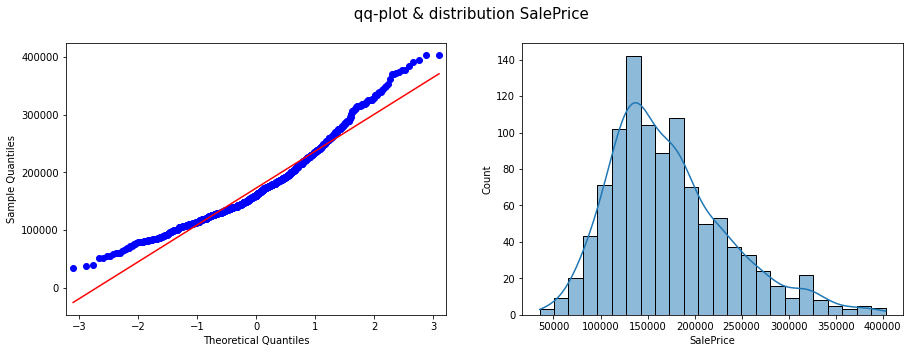

In [627]:
fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_df, line='s', ax = ax[0])

sns.histplot(target_df, kde = True, ax = ax[1])
plt.show()

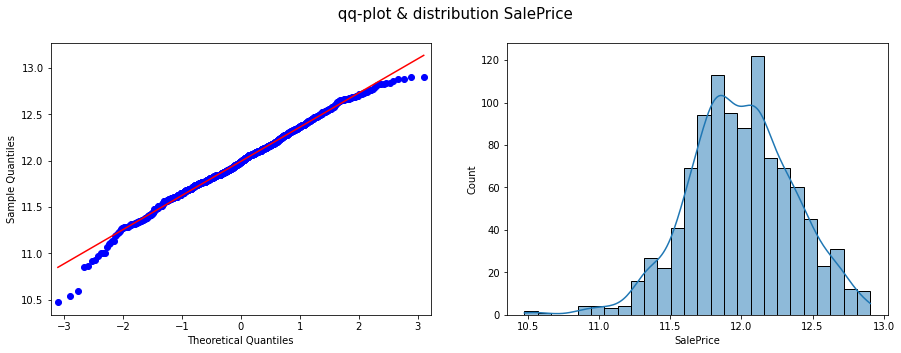

In [629]:
target_log = np.log1p(target_df)

fig, ax = plt.subplots(1,2, figsize= (15,5))
fig.suptitle(" qq-plot & distribution SalePrice ", fontsize= 15)

sm.qqplot(target_log, line='s', ax = ax[0])

sns.histplot(target_log, kde = True, ax = ax[1])
plt.show()

In [630]:
target_log

0       12.247699
1       12.317171
2       12.429220
3       12.634606
4       11.771444
          ...    
1025    11.884496
1026    11.344519
1027    12.128117
1028    12.072547
1029    12.254868
Name: SalePrice, Length: 1030, dtype: float64

In [640]:
import xgboost as xgb
from sklearn.svm import SVR
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [654]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, train_data_df, target_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [655]:
kf = KFold(n_splits=10, random_state=42, shuffle=True)

In [656]:
cv_scores = []
cv_std = []

In [657]:
baseline_models = ['Linear_Reg.','Bayesian_Ridge_Reg.','LGBM_Reg.','SVR',
                   'Dec_Tree_Reg.','Random_Forest_Reg.', 'XGB_Reg.',
                   'Grad_Boost_Reg.','Cat_Boost_Reg.','Stacked_Reg.']

In [658]:
lreg = LinearRegression()
score_lreg = cv_rmse(lreg)
cv_scores.append(score_lreg.mean())
cv_std.append(score_lreg.std())

In [659]:
brr = BayesianRidge(compute_score=True)
score_brr = cv_rmse(brr)
cv_scores.append(score_brr.mean())
cv_std.append(score_brr.std())

In [660]:
l_gbm = LGBMRegressor(objective='regression')
score_l_gbm = cv_rmse(l_gbm)
cv_scores.append(score_l_gbm.mean())
cv_std.append(score_l_gbm.std())

In [661]:
svr = SVR()
score_svr = cv_rmse(svr)
cv_scores.append(score_svr.mean())
cv_std.append(score_svr.std())

In [662]:
dtr = DecisionTreeRegressor()
score_dtr = cv_rmse(dtr)
cv_scores.append(score_dtr.mean())
cv_std.append(score_dtr.std())

In [663]:
rfr = RandomForestRegressor()
score_rfr = cv_rmse(rfr)
cv_scores.append(score_rfr.mean())
cv_std.append(score_rfr.std())

In [664]:
xgb = xgb.XGBRegressor()
score_xgb = cv_rmse(xgb)
cv_scores.append(score_xgb.mean())
cv_std.append(score_xgb.std())

In [665]:
gbr = GradientBoostingRegressor()
score_gbr = cv_rmse(gbr)
cv_scores.append(score_gbr.mean())
cv_std.append(score_gbr.std())

In [666]:
catb = CatBoostRegressor()
score_catb = cv_rmse(catb)
cv_scores.append(score_catb.mean())
cv_std.append(score_catb.std())

Learning rate set to 0.038507
0:	learn: 0.3586089	total: 55.6ms	remaining: 55.6s
1:	learn: 0.3480773	total: 60.2ms	remaining: 30s
2:	learn: 0.3392913	total: 65.2ms	remaining: 21.7s
3:	learn: 0.3297605	total: 69.6ms	remaining: 17.3s
4:	learn: 0.3200120	total: 73.1ms	remaining: 14.6s
5:	learn: 0.3115163	total: 76.9ms	remaining: 12.7s
6:	learn: 0.3027705	total: 80.2ms	remaining: 11.4s
7:	learn: 0.2943972	total: 83.6ms	remaining: 10.4s
8:	learn: 0.2853669	total: 87.9ms	remaining: 9.68s
9:	learn: 0.2772445	total: 92ms	remaining: 9.1s
10:	learn: 0.2697902	total: 95.8ms	remaining: 8.61s
11:	learn: 0.2620113	total: 99.3ms	remaining: 8.17s
12:	learn: 0.2546187	total: 103ms	remaining: 7.81s
13:	learn: 0.2478548	total: 107ms	remaining: 7.55s
14:	learn: 0.2404387	total: 111ms	remaining: 7.32s
15:	learn: 0.2330791	total: 115ms	remaining: 7.07s
16:	learn: 0.2264508	total: 118ms	remaining: 6.81s
17:	learn: 0.2204800	total: 121ms	remaining: 6.57s
18:	learn: 0.2143380	total: 124ms	remaining: 6.43s
19:	

217:	learn: 0.0164832	total: 749ms	remaining: 2.69s
218:	learn: 0.0164172	total: 752ms	remaining: 2.68s
219:	learn: 0.0163316	total: 755ms	remaining: 2.67s
220:	learn: 0.0163146	total: 757ms	remaining: 2.67s
221:	learn: 0.0162579	total: 760ms	remaining: 2.66s
222:	learn: 0.0161970	total: 763ms	remaining: 2.66s
223:	learn: 0.0161086	total: 767ms	remaining: 2.66s
224:	learn: 0.0160352	total: 770ms	remaining: 2.65s
225:	learn: 0.0159592	total: 773ms	remaining: 2.65s
226:	learn: 0.0159090	total: 776ms	remaining: 2.64s
227:	learn: 0.0158373	total: 779ms	remaining: 2.64s
228:	learn: 0.0157496	total: 782ms	remaining: 2.63s
229:	learn: 0.0157361	total: 785ms	remaining: 2.63s
230:	learn: 0.0156950	total: 788ms	remaining: 2.62s
231:	learn: 0.0156188	total: 790ms	remaining: 2.62s
232:	learn: 0.0155483	total: 793ms	remaining: 2.61s
233:	learn: 0.0155336	total: 796ms	remaining: 2.61s
234:	learn: 0.0154795	total: 799ms	remaining: 2.6s
235:	learn: 0.0154249	total: 802ms	remaining: 2.6s
236:	learn: 0.

430:	learn: 0.0084908	total: 1.5s	remaining: 1.97s
431:	learn: 0.0084812	total: 1.5s	remaining: 1.97s
432:	learn: 0.0084654	total: 1.5s	remaining: 1.97s
433:	learn: 0.0084533	total: 1.5s	remaining: 1.96s
434:	learn: 0.0084351	total: 1.51s	remaining: 1.96s
435:	learn: 0.0084097	total: 1.51s	remaining: 1.96s
436:	learn: 0.0083810	total: 1.51s	remaining: 1.95s
437:	learn: 0.0083753	total: 1.52s	remaining: 1.95s
438:	learn: 0.0083488	total: 1.52s	remaining: 1.95s
439:	learn: 0.0083393	total: 1.53s	remaining: 1.94s
440:	learn: 0.0083203	total: 1.53s	remaining: 1.94s
441:	learn: 0.0083158	total: 1.53s	remaining: 1.94s
442:	learn: 0.0082924	total: 1.54s	remaining: 1.93s
443:	learn: 0.0082722	total: 1.54s	remaining: 1.93s
444:	learn: 0.0082491	total: 1.54s	remaining: 1.93s
445:	learn: 0.0082273	total: 1.55s	remaining: 1.92s
446:	learn: 0.0082228	total: 1.55s	remaining: 1.92s
447:	learn: 0.0082009	total: 1.55s	remaining: 1.92s
448:	learn: 0.0081737	total: 1.56s	remaining: 1.91s
449:	learn: 0.00

594:	learn: 0.0061114	total: 2.06s	remaining: 1.4s
595:	learn: 0.0060968	total: 2.06s	remaining: 1.4s
596:	learn: 0.0060819	total: 2.06s	remaining: 1.39s
597:	learn: 0.0060733	total: 2.07s	remaining: 1.39s
598:	learn: 0.0060566	total: 2.07s	remaining: 1.39s
599:	learn: 0.0060446	total: 2.07s	remaining: 1.38s
600:	learn: 0.0060318	total: 2.08s	remaining: 1.38s
601:	learn: 0.0060216	total: 2.08s	remaining: 1.38s
602:	learn: 0.0060073	total: 2.09s	remaining: 1.37s
603:	learn: 0.0060059	total: 2.09s	remaining: 1.37s
604:	learn: 0.0059917	total: 2.09s	remaining: 1.37s
605:	learn: 0.0059837	total: 2.1s	remaining: 1.36s
606:	learn: 0.0059692	total: 2.1s	remaining: 1.36s
607:	learn: 0.0059667	total: 2.1s	remaining: 1.36s
608:	learn: 0.0059531	total: 2.11s	remaining: 1.35s
609:	learn: 0.0059422	total: 2.11s	remaining: 1.35s
610:	learn: 0.0059290	total: 2.12s	remaining: 1.35s
611:	learn: 0.0059280	total: 2.12s	remaining: 1.34s
612:	learn: 0.0059136	total: 2.12s	remaining: 1.34s
613:	learn: 0.005

804:	learn: 0.0042687	total: 2.8s	remaining: 679ms
805:	learn: 0.0042620	total: 2.81s	remaining: 676ms
806:	learn: 0.0042522	total: 2.81s	remaining: 672ms
807:	learn: 0.0042451	total: 2.81s	remaining: 669ms
808:	learn: 0.0042358	total: 2.82s	remaining: 666ms
809:	learn: 0.0042285	total: 2.82s	remaining: 662ms
810:	learn: 0.0042191	total: 2.83s	remaining: 659ms
811:	learn: 0.0042124	total: 2.83s	remaining: 655ms
812:	learn: 0.0042051	total: 2.83s	remaining: 652ms
813:	learn: 0.0042005	total: 2.84s	remaining: 648ms
814:	learn: 0.0041924	total: 2.84s	remaining: 645ms
815:	learn: 0.0041822	total: 2.84s	remaining: 641ms
816:	learn: 0.0041786	total: 2.85s	remaining: 638ms
817:	learn: 0.0041719	total: 2.85s	remaining: 634ms
818:	learn: 0.0041649	total: 2.85s	remaining: 631ms
819:	learn: 0.0041593	total: 2.86s	remaining: 627ms
820:	learn: 0.0041576	total: 2.86s	remaining: 624ms
821:	learn: 0.0041517	total: 2.86s	remaining: 620ms
822:	learn: 0.0041488	total: 2.87s	remaining: 617ms
823:	learn: 0

Learning rate set to 0.038507
0:	learn: 0.3575927	total: 3.25ms	remaining: 3.24s
1:	learn: 0.3467042	total: 7.62ms	remaining: 3.8s
2:	learn: 0.3358065	total: 11ms	remaining: 3.64s
3:	learn: 0.3262527	total: 15.2ms	remaining: 3.8s
4:	learn: 0.3158718	total: 18.9ms	remaining: 3.75s
5:	learn: 0.3060848	total: 22.1ms	remaining: 3.65s
6:	learn: 0.2966445	total: 25.7ms	remaining: 3.64s
7:	learn: 0.2882271	total: 29.9ms	remaining: 3.7s
8:	learn: 0.2797658	total: 33.1ms	remaining: 3.64s
9:	learn: 0.2731958	total: 36.5ms	remaining: 3.61s
10:	learn: 0.2653624	total: 39.7ms	remaining: 3.57s
11:	learn: 0.2572451	total: 42.8ms	remaining: 3.52s
12:	learn: 0.2496008	total: 46.6ms	remaining: 3.54s
13:	learn: 0.2430802	total: 49.6ms	remaining: 3.49s
14:	learn: 0.2372227	total: 53ms	remaining: 3.48s
15:	learn: 0.2314335	total: 56.9ms	remaining: 3.5s
16:	learn: 0.2251793	total: 60.5ms	remaining: 3.5s
17:	learn: 0.2186228	total: 63.7ms	remaining: 3.47s
18:	learn: 0.2127507	total: 67.3ms	remaining: 3.47s
1

208:	learn: 0.0173139	total: 744ms	remaining: 2.82s
209:	learn: 0.0172515	total: 749ms	remaining: 2.82s
210:	learn: 0.0171962	total: 753ms	remaining: 2.81s
211:	learn: 0.0171079	total: 757ms	remaining: 2.81s
212:	learn: 0.0170065	total: 760ms	remaining: 2.81s
213:	learn: 0.0169922	total: 764ms	remaining: 2.81s
214:	learn: 0.0169041	total: 767ms	remaining: 2.8s
215:	learn: 0.0168916	total: 770ms	remaining: 2.8s
216:	learn: 0.0168789	total: 775ms	remaining: 2.79s
217:	learn: 0.0167990	total: 778ms	remaining: 2.79s
218:	learn: 0.0167207	total: 781ms	remaining: 2.79s
219:	learn: 0.0166458	total: 785ms	remaining: 2.78s
220:	learn: 0.0166302	total: 788ms	remaining: 2.78s
221:	learn: 0.0166179	total: 791ms	remaining: 2.77s
222:	learn: 0.0165733	total: 796ms	remaining: 2.77s
223:	learn: 0.0165040	total: 800ms	remaining: 2.77s
224:	learn: 0.0164502	total: 803ms	remaining: 2.77s
225:	learn: 0.0163467	total: 807ms	remaining: 2.76s
226:	learn: 0.0163342	total: 810ms	remaining: 2.76s
227:	learn: 0.

416:	learn: 0.0095048	total: 1.49s	remaining: 2.08s
417:	learn: 0.0094801	total: 1.49s	remaining: 2.07s
418:	learn: 0.0094611	total: 1.49s	remaining: 2.07s
419:	learn: 0.0094281	total: 1.5s	remaining: 2.06s
420:	learn: 0.0093970	total: 1.5s	remaining: 2.06s
421:	learn: 0.0093811	total: 1.5s	remaining: 2.06s
422:	learn: 0.0093754	total: 1.5s	remaining: 2.05s
423:	learn: 0.0093445	total: 1.51s	remaining: 2.05s
424:	learn: 0.0093092	total: 1.51s	remaining: 2.04s
425:	learn: 0.0092858	total: 1.51s	remaining: 2.04s
426:	learn: 0.0092545	total: 1.52s	remaining: 2.04s
427:	learn: 0.0092369	total: 1.52s	remaining: 2.03s
428:	learn: 0.0092112	total: 1.52s	remaining: 2.03s
429:	learn: 0.0091774	total: 1.53s	remaining: 2.02s
430:	learn: 0.0091439	total: 1.53s	remaining: 2.02s
431:	learn: 0.0091328	total: 1.53s	remaining: 2.02s
432:	learn: 0.0091010	total: 1.53s	remaining: 2.01s
433:	learn: 0.0090730	total: 1.54s	remaining: 2.01s
434:	learn: 0.0090677	total: 1.54s	remaining: 2s
435:	learn: 0.00904

592:	learn: 0.0064419	total: 2.04s	remaining: 1.4s
593:	learn: 0.0064304	total: 2.05s	remaining: 1.4s
594:	learn: 0.0064154	total: 2.05s	remaining: 1.4s
595:	learn: 0.0064001	total: 2.06s	remaining: 1.39s
596:	learn: 0.0063967	total: 2.06s	remaining: 1.39s
597:	learn: 0.0063851	total: 2.06s	remaining: 1.39s
598:	learn: 0.0063829	total: 2.06s	remaining: 1.38s
599:	learn: 0.0063730	total: 2.07s	remaining: 1.38s
600:	learn: 0.0063563	total: 2.07s	remaining: 1.38s
601:	learn: 0.0063444	total: 2.08s	remaining: 1.37s
602:	learn: 0.0063403	total: 2.08s	remaining: 1.37s
603:	learn: 0.0063268	total: 2.08s	remaining: 1.36s
604:	learn: 0.0063200	total: 2.08s	remaining: 1.36s
605:	learn: 0.0063041	total: 2.09s	remaining: 1.36s
606:	learn: 0.0062925	total: 2.09s	remaining: 1.35s
607:	learn: 0.0062780	total: 2.09s	remaining: 1.35s
608:	learn: 0.0062663	total: 2.1s	remaining: 1.35s
609:	learn: 0.0062549	total: 2.1s	remaining: 1.34s
610:	learn: 0.0062414	total: 2.1s	remaining: 1.34s
611:	learn: 0.0062

774:	learn: 0.0046882	total: 2.6s	remaining: 757ms
775:	learn: 0.0046875	total: 2.61s	remaining: 753ms
776:	learn: 0.0046775	total: 2.61s	remaining: 750ms
777:	learn: 0.0046667	total: 2.62s	remaining: 747ms
778:	learn: 0.0046605	total: 2.62s	remaining: 743ms
779:	learn: 0.0046507	total: 2.62s	remaining: 740ms
780:	learn: 0.0046465	total: 2.63s	remaining: 736ms
781:	learn: 0.0046373	total: 2.63s	remaining: 733ms
782:	learn: 0.0046365	total: 2.63s	remaining: 730ms
783:	learn: 0.0046357	total: 2.64s	remaining: 726ms
784:	learn: 0.0046350	total: 2.64s	remaining: 723ms
785:	learn: 0.0046258	total: 2.64s	remaining: 720ms
786:	learn: 0.0046167	total: 2.65s	remaining: 716ms
787:	learn: 0.0046155	total: 2.65s	remaining: 713ms
788:	learn: 0.0046068	total: 2.65s	remaining: 710ms
789:	learn: 0.0046061	total: 2.65s	remaining: 706ms
790:	learn: 0.0046017	total: 2.66s	remaining: 703ms
791:	learn: 0.0045944	total: 2.66s	remaining: 699ms
792:	learn: 0.0045891	total: 2.67s	remaining: 696ms
793:	learn: 0

943:	learn: 0.0037050	total: 3.17s	remaining: 188ms
944:	learn: 0.0037003	total: 3.17s	remaining: 185ms
945:	learn: 0.0036932	total: 3.17s	remaining: 181ms
946:	learn: 0.0036876	total: 3.18s	remaining: 178ms
947:	learn: 0.0036809	total: 3.18s	remaining: 175ms
948:	learn: 0.0036737	total: 3.19s	remaining: 171ms
949:	learn: 0.0036693	total: 3.19s	remaining: 168ms
950:	learn: 0.0036618	total: 3.19s	remaining: 164ms
951:	learn: 0.0036579	total: 3.2s	remaining: 161ms
952:	learn: 0.0036517	total: 3.2s	remaining: 158ms
953:	learn: 0.0036449	total: 3.2s	remaining: 154ms
954:	learn: 0.0036396	total: 3.21s	remaining: 151ms
955:	learn: 0.0036368	total: 3.21s	remaining: 148ms
956:	learn: 0.0036321	total: 3.21s	remaining: 144ms
957:	learn: 0.0036278	total: 3.22s	remaining: 141ms
958:	learn: 0.0036244	total: 3.22s	remaining: 138ms
959:	learn: 0.0036190	total: 3.22s	remaining: 134ms
960:	learn: 0.0036142	total: 3.23s	remaining: 131ms
961:	learn: 0.0036088	total: 3.23s	remaining: 128ms
962:	learn: 0.0

126:	learn: 0.0263748	total: 371ms	remaining: 2.55s
127:	learn: 0.0261180	total: 374ms	remaining: 2.55s
128:	learn: 0.0259486	total: 377ms	remaining: 2.55s
129:	learn: 0.0256530	total: 380ms	remaining: 2.54s
130:	learn: 0.0254378	total: 383ms	remaining: 2.54s
131:	learn: 0.0251840	total: 386ms	remaining: 2.54s
132:	learn: 0.0249212	total: 389ms	remaining: 2.53s
133:	learn: 0.0248364	total: 392ms	remaining: 2.53s
134:	learn: 0.0246103	total: 395ms	remaining: 2.53s
135:	learn: 0.0244279	total: 398ms	remaining: 2.53s
136:	learn: 0.0242777	total: 401ms	remaining: 2.52s
137:	learn: 0.0240577	total: 403ms	remaining: 2.52s
138:	learn: 0.0238769	total: 406ms	remaining: 2.52s
139:	learn: 0.0236840	total: 409ms	remaining: 2.51s
140:	learn: 0.0234944	total: 412ms	remaining: 2.51s
141:	learn: 0.0233555	total: 415ms	remaining: 2.51s
142:	learn: 0.0231897	total: 418ms	remaining: 2.5s
143:	learn: 0.0230195	total: 421ms	remaining: 2.5s
144:	learn: 0.0228938	total: 424ms	remaining: 2.5s
145:	learn: 0.0

299:	learn: 0.0122518	total: 928ms	remaining: 2.17s
300:	learn: 0.0122092	total: 932ms	remaining: 2.16s
301:	learn: 0.0121667	total: 936ms	remaining: 2.16s
302:	learn: 0.0121253	total: 940ms	remaining: 2.16s
303:	learn: 0.0121006	total: 944ms	remaining: 2.16s
304:	learn: 0.0120592	total: 948ms	remaining: 2.16s
305:	learn: 0.0120198	total: 953ms	remaining: 2.16s
306:	learn: 0.0119930	total: 956ms	remaining: 2.16s
307:	learn: 0.0119471	total: 960ms	remaining: 2.16s
308:	learn: 0.0119099	total: 964ms	remaining: 2.15s
309:	learn: 0.0118991	total: 968ms	remaining: 2.15s
310:	learn: 0.0118729	total: 971ms	remaining: 2.15s
311:	learn: 0.0118667	total: 974ms	remaining: 2.15s
312:	learn: 0.0118178	total: 977ms	remaining: 2.15s
313:	learn: 0.0117838	total: 981ms	remaining: 2.14s
314:	learn: 0.0117514	total: 984ms	remaining: 2.14s
315:	learn: 0.0117104	total: 987ms	remaining: 2.14s
316:	learn: 0.0116682	total: 990ms	remaining: 2.13s
317:	learn: 0.0116262	total: 993ms	remaining: 2.13s
318:	learn: 

497:	learn: 0.0073989	total: 1.68s	remaining: 1.69s
498:	learn: 0.0073954	total: 1.68s	remaining: 1.69s
499:	learn: 0.0073824	total: 1.69s	remaining: 1.69s
500:	learn: 0.0073664	total: 1.69s	remaining: 1.69s
501:	learn: 0.0073637	total: 1.7s	remaining: 1.68s
502:	learn: 0.0073528	total: 1.7s	remaining: 1.68s
503:	learn: 0.0073496	total: 1.7s	remaining: 1.68s
504:	learn: 0.0073330	total: 1.71s	remaining: 1.68s
505:	learn: 0.0073239	total: 1.71s	remaining: 1.67s
506:	learn: 0.0073118	total: 1.72s	remaining: 1.67s
507:	learn: 0.0072943	total: 1.72s	remaining: 1.67s
508:	learn: 0.0072713	total: 1.73s	remaining: 1.67s
509:	learn: 0.0072585	total: 1.73s	remaining: 1.66s
510:	learn: 0.0072433	total: 1.73s	remaining: 1.66s
511:	learn: 0.0072285	total: 1.74s	remaining: 1.66s
512:	learn: 0.0072087	total: 1.74s	remaining: 1.65s
513:	learn: 0.0071961	total: 1.75s	remaining: 1.65s
514:	learn: 0.0071770	total: 1.75s	remaining: 1.65s
515:	learn: 0.0071650	total: 1.75s	remaining: 1.65s
516:	learn: 0.0

685:	learn: 0.0052785	total: 2.43s	remaining: 1.11s
686:	learn: 0.0052719	total: 2.44s	remaining: 1.11s
687:	learn: 0.0052643	total: 2.44s	remaining: 1.11s
688:	learn: 0.0052515	total: 2.45s	remaining: 1.1s
689:	learn: 0.0052410	total: 2.45s	remaining: 1.1s
690:	learn: 0.0052306	total: 2.46s	remaining: 1.1s
691:	learn: 0.0052252	total: 2.46s	remaining: 1.1s
692:	learn: 0.0052179	total: 2.47s	remaining: 1.09s
693:	learn: 0.0052130	total: 2.47s	remaining: 1.09s
694:	learn: 0.0052036	total: 2.48s	remaining: 1.09s
695:	learn: 0.0051902	total: 2.48s	remaining: 1.08s
696:	learn: 0.0051838	total: 2.48s	remaining: 1.08s
697:	learn: 0.0051733	total: 2.49s	remaining: 1.08s
698:	learn: 0.0051656	total: 2.49s	remaining: 1.07s
699:	learn: 0.0051587	total: 2.5s	remaining: 1.07s
700:	learn: 0.0051578	total: 2.5s	remaining: 1.07s
701:	learn: 0.0051525	total: 2.5s	remaining: 1.06s
702:	learn: 0.0051513	total: 2.51s	remaining: 1.06s
703:	learn: 0.0051448	total: 2.51s	remaining: 1.05s
704:	learn: 0.00513

865:	learn: 0.0040964	total: 3.19s	remaining: 493ms
866:	learn: 0.0040906	total: 3.19s	remaining: 490ms
867:	learn: 0.0040829	total: 3.19s	remaining: 486ms
868:	learn: 0.0040775	total: 3.2s	remaining: 482ms
869:	learn: 0.0040725	total: 3.2s	remaining: 479ms
870:	learn: 0.0040680	total: 3.21s	remaining: 475ms
871:	learn: 0.0040603	total: 3.21s	remaining: 471ms
872:	learn: 0.0040553	total: 3.21s	remaining: 468ms
873:	learn: 0.0040505	total: 3.22s	remaining: 464ms
874:	learn: 0.0040454	total: 3.22s	remaining: 460ms
875:	learn: 0.0040385	total: 3.23s	remaining: 457ms
876:	learn: 0.0040349	total: 3.23s	remaining: 453ms
877:	learn: 0.0040297	total: 3.23s	remaining: 450ms
878:	learn: 0.0040218	total: 3.24s	remaining: 446ms
879:	learn: 0.0040173	total: 3.24s	remaining: 442ms
880:	learn: 0.0040139	total: 3.25s	remaining: 439ms
881:	learn: 0.0040079	total: 3.25s	remaining: 435ms
882:	learn: 0.0040023	total: 3.25s	remaining: 431ms
883:	learn: 0.0039987	total: 3.26s	remaining: 428ms
884:	learn: 0.

72:	learn: 0.0569397	total: 238ms	remaining: 3.02s
73:	learn: 0.0558597	total: 241ms	remaining: 3.02s
74:	learn: 0.0546398	total: 244ms	remaining: 3.01s
75:	learn: 0.0535465	total: 247ms	remaining: 3s
76:	learn: 0.0526652	total: 250ms	remaining: 3s
77:	learn: 0.0516148	total: 253ms	remaining: 2.99s
78:	learn: 0.0508469	total: 257ms	remaining: 3s
79:	learn: 0.0500507	total: 260ms	remaining: 2.99s
80:	learn: 0.0489761	total: 264ms	remaining: 2.99s
81:	learn: 0.0481164	total: 267ms	remaining: 2.99s
82:	learn: 0.0470817	total: 271ms	remaining: 2.99s
83:	learn: 0.0463007	total: 274ms	remaining: 2.99s
84:	learn: 0.0454025	total: 277ms	remaining: 2.98s
85:	learn: 0.0445935	total: 280ms	remaining: 2.98s
86:	learn: 0.0438118	total: 285ms	remaining: 2.99s
87:	learn: 0.0430395	total: 288ms	remaining: 2.98s
88:	learn: 0.0422732	total: 291ms	remaining: 2.98s
89:	learn: 0.0416112	total: 294ms	remaining: 2.97s
90:	learn: 0.0409371	total: 298ms	remaining: 2.97s
91:	learn: 0.0402914	total: 301ms	remain

291:	learn: 0.0124938	total: 987ms	remaining: 2.39s
292:	learn: 0.0124684	total: 990ms	remaining: 2.39s
293:	learn: 0.0124129	total: 994ms	remaining: 2.39s
294:	learn: 0.0123693	total: 997ms	remaining: 2.38s
295:	learn: 0.0123333	total: 1s	remaining: 2.38s
296:	learn: 0.0122839	total: 1s	remaining: 2.37s
297:	learn: 0.0122290	total: 1.01s	remaining: 2.37s
298:	learn: 0.0121802	total: 1.01s	remaining: 2.37s
299:	learn: 0.0121174	total: 1.01s	remaining: 2.36s
300:	learn: 0.0120541	total: 1.02s	remaining: 2.36s
301:	learn: 0.0120146	total: 1.02s	remaining: 2.35s
302:	learn: 0.0119764	total: 1.02s	remaining: 2.35s
303:	learn: 0.0119361	total: 1.02s	remaining: 2.35s
304:	learn: 0.0118952	total: 1.03s	remaining: 2.34s
305:	learn: 0.0118912	total: 1.03s	remaining: 2.34s
306:	learn: 0.0118584	total: 1.03s	remaining: 2.33s
307:	learn: 0.0118131	total: 1.04s	remaining: 2.33s
308:	learn: 0.0117717	total: 1.04s	remaining: 2.32s
309:	learn: 0.0117284	total: 1.04s	remaining: 2.32s
310:	learn: 0.0116

454:	learn: 0.0077670	total: 1.54s	remaining: 1.85s
455:	learn: 0.0077643	total: 1.55s	remaining: 1.85s
456:	learn: 0.0077616	total: 1.55s	remaining: 1.85s
457:	learn: 0.0077450	total: 1.56s	remaining: 1.84s
458:	learn: 0.0077259	total: 1.56s	remaining: 1.84s
459:	learn: 0.0077038	total: 1.57s	remaining: 1.84s
460:	learn: 0.0076828	total: 1.57s	remaining: 1.84s
461:	learn: 0.0076642	total: 1.57s	remaining: 1.83s
462:	learn: 0.0076487	total: 1.58s	remaining: 1.83s
463:	learn: 0.0076297	total: 1.58s	remaining: 1.83s
464:	learn: 0.0076167	total: 1.59s	remaining: 1.82s
465:	learn: 0.0076035	total: 1.59s	remaining: 1.82s
466:	learn: 0.0075807	total: 1.59s	remaining: 1.82s
467:	learn: 0.0075610	total: 1.6s	remaining: 1.82s
468:	learn: 0.0075585	total: 1.6s	remaining: 1.81s
469:	learn: 0.0075555	total: 1.6s	remaining: 1.81s
470:	learn: 0.0075395	total: 1.61s	remaining: 1.81s
471:	learn: 0.0075364	total: 1.61s	remaining: 1.81s
472:	learn: 0.0075176	total: 1.62s	remaining: 1.8s
473:	learn: 0.00

623:	learn: 0.0058369	total: 2.1s	remaining: 1.27s
624:	learn: 0.0058242	total: 2.11s	remaining: 1.26s
625:	learn: 0.0058155	total: 2.11s	remaining: 1.26s
626:	learn: 0.0058040	total: 2.12s	remaining: 1.26s
627:	learn: 0.0058028	total: 2.12s	remaining: 1.25s
628:	learn: 0.0057875	total: 2.12s	remaining: 1.25s
629:	learn: 0.0057786	total: 2.12s	remaining: 1.25s
630:	learn: 0.0057743	total: 2.13s	remaining: 1.24s
631:	learn: 0.0057694	total: 2.13s	remaining: 1.24s
632:	learn: 0.0057573	total: 2.13s	remaining: 1.24s
633:	learn: 0.0057459	total: 2.14s	remaining: 1.23s
634:	learn: 0.0057359	total: 2.14s	remaining: 1.23s
635:	learn: 0.0057216	total: 2.15s	remaining: 1.23s
636:	learn: 0.0057131	total: 2.15s	remaining: 1.22s
637:	learn: 0.0056977	total: 2.15s	remaining: 1.22s
638:	learn: 0.0056862	total: 2.15s	remaining: 1.22s
639:	learn: 0.0056797	total: 2.16s	remaining: 1.21s
640:	learn: 0.0056702	total: 2.16s	remaining: 1.21s
641:	learn: 0.0056659	total: 2.16s	remaining: 1.21s
642:	learn: 0

825:	learn: 0.0042894	total: 2.86s	remaining: 602ms
826:	learn: 0.0042889	total: 2.86s	remaining: 599ms
827:	learn: 0.0042796	total: 2.87s	remaining: 596ms
828:	learn: 0.0042726	total: 2.87s	remaining: 592ms
829:	learn: 0.0042653	total: 2.88s	remaining: 589ms
830:	learn: 0.0042647	total: 2.88s	remaining: 586ms
831:	learn: 0.0042567	total: 2.88s	remaining: 582ms
832:	learn: 0.0042520	total: 2.89s	remaining: 579ms
833:	learn: 0.0042509	total: 2.89s	remaining: 575ms
834:	learn: 0.0042503	total: 2.89s	remaining: 572ms
835:	learn: 0.0042431	total: 2.9s	remaining: 568ms
836:	learn: 0.0042383	total: 2.9s	remaining: 565ms
837:	learn: 0.0042297	total: 2.9s	remaining: 561ms
838:	learn: 0.0042223	total: 2.91s	remaining: 558ms
839:	learn: 0.0042202	total: 2.91s	remaining: 554ms
840:	learn: 0.0042125	total: 2.91s	remaining: 551ms
841:	learn: 0.0042081	total: 2.92s	remaining: 548ms
842:	learn: 0.0042001	total: 2.92s	remaining: 544ms
843:	learn: 0.0041923	total: 2.93s	remaining: 541ms
844:	learn: 0.0

Learning rate set to 0.038507
0:	learn: 0.3579781	total: 4.73ms	remaining: 4.72s
1:	learn: 0.3477612	total: 8.54ms	remaining: 4.26s
2:	learn: 0.3373927	total: 11.5ms	remaining: 3.82s
3:	learn: 0.3270406	total: 14.9ms	remaining: 3.7s
4:	learn: 0.3175809	total: 18.2ms	remaining: 3.63s
5:	learn: 0.3078391	total: 23.2ms	remaining: 3.85s
6:	learn: 0.3005749	total: 26.7ms	remaining: 3.78s
7:	learn: 0.2914244	total: 30.3ms	remaining: 3.76s
8:	learn: 0.2824231	total: 33.6ms	remaining: 3.7s
9:	learn: 0.2737852	total: 37.5ms	remaining: 3.71s
10:	learn: 0.2661406	total: 42.5ms	remaining: 3.82s
11:	learn: 0.2590938	total: 46.1ms	remaining: 3.8s
12:	learn: 0.2518385	total: 49.8ms	remaining: 3.78s
13:	learn: 0.2448332	total: 52.7ms	remaining: 3.71s
14:	learn: 0.2375215	total: 56ms	remaining: 3.68s
15:	learn: 0.2312353	total: 60.6ms	remaining: 3.73s
16:	learn: 0.2247991	total: 64.3ms	remaining: 3.72s
17:	learn: 0.2190287	total: 67.6ms	remaining: 3.69s
18:	learn: 0.2136050	total: 70.6ms	remaining: 3.6

161:	learn: 0.0212352	total: 561ms	remaining: 2.9s
162:	learn: 0.0211320	total: 565ms	remaining: 2.9s
163:	learn: 0.0209636	total: 568ms	remaining: 2.9s
164:	learn: 0.0208309	total: 572ms	remaining: 2.89s
165:	learn: 0.0207359	total: 576ms	remaining: 2.89s
166:	learn: 0.0206172	total: 580ms	remaining: 2.89s
167:	learn: 0.0204838	total: 584ms	remaining: 2.89s
168:	learn: 0.0203637	total: 588ms	remaining: 2.89s
169:	learn: 0.0202722	total: 592ms	remaining: 2.89s
170:	learn: 0.0201936	total: 595ms	remaining: 2.89s
171:	learn: 0.0201302	total: 600ms	remaining: 2.89s
172:	learn: 0.0200206	total: 604ms	remaining: 2.88s
173:	learn: 0.0199010	total: 608ms	remaining: 2.88s
174:	learn: 0.0197884	total: 612ms	remaining: 2.89s
175:	learn: 0.0196679	total: 616ms	remaining: 2.88s
176:	learn: 0.0195965	total: 620ms	remaining: 2.88s
177:	learn: 0.0195446	total: 623ms	remaining: 2.88s
178:	learn: 0.0194270	total: 627ms	remaining: 2.87s
179:	learn: 0.0193223	total: 630ms	remaining: 2.87s
180:	learn: 0.0

325:	learn: 0.0120374	total: 1.12s	remaining: 2.32s
326:	learn: 0.0120174	total: 1.13s	remaining: 2.32s
327:	learn: 0.0119742	total: 1.13s	remaining: 2.31s
328:	learn: 0.0119444	total: 1.13s	remaining: 2.31s
329:	learn: 0.0119222	total: 1.14s	remaining: 2.31s
330:	learn: 0.0118917	total: 1.14s	remaining: 2.3s
331:	learn: 0.0118514	total: 1.14s	remaining: 2.3s
332:	learn: 0.0118213	total: 1.15s	remaining: 2.29s
333:	learn: 0.0117992	total: 1.15s	remaining: 2.29s
334:	learn: 0.0117642	total: 1.15s	remaining: 2.29s
335:	learn: 0.0117200	total: 1.15s	remaining: 2.28s
336:	learn: 0.0116820	total: 1.16s	remaining: 2.28s
337:	learn: 0.0116539	total: 1.16s	remaining: 2.27s
338:	learn: 0.0116265	total: 1.16s	remaining: 2.27s
339:	learn: 0.0115959	total: 1.17s	remaining: 2.26s
340:	learn: 0.0115484	total: 1.17s	remaining: 2.26s
341:	learn: 0.0115006	total: 1.17s	remaining: 2.25s
342:	learn: 0.0114719	total: 1.18s	remaining: 2.25s
343:	learn: 0.0114367	total: 1.18s	remaining: 2.25s
344:	learn: 0.

485:	learn: 0.0078316	total: 1.69s	remaining: 1.78s
486:	learn: 0.0078132	total: 1.69s	remaining: 1.78s
487:	learn: 0.0077931	total: 1.69s	remaining: 1.78s
488:	learn: 0.0077780	total: 1.7s	remaining: 1.77s
489:	learn: 0.0077574	total: 1.7s	remaining: 1.77s
490:	learn: 0.0077371	total: 1.71s	remaining: 1.77s
491:	learn: 0.0077356	total: 1.71s	remaining: 1.77s
492:	learn: 0.0077196	total: 1.72s	remaining: 1.76s
493:	learn: 0.0076976	total: 1.72s	remaining: 1.76s
494:	learn: 0.0076841	total: 1.72s	remaining: 1.76s
495:	learn: 0.0076707	total: 1.73s	remaining: 1.75s
496:	learn: 0.0076547	total: 1.73s	remaining: 1.75s
497:	learn: 0.0076405	total: 1.74s	remaining: 1.75s
498:	learn: 0.0076240	total: 1.74s	remaining: 1.75s
499:	learn: 0.0076057	total: 1.74s	remaining: 1.74s
500:	learn: 0.0075966	total: 1.75s	remaining: 1.74s
501:	learn: 0.0075748	total: 1.75s	remaining: 1.74s
502:	learn: 0.0075568	total: 1.76s	remaining: 1.74s
503:	learn: 0.0075430	total: 1.76s	remaining: 1.73s
504:	learn: 0.

694:	learn: 0.0052064	total: 2.44s	remaining: 1.07s
695:	learn: 0.0052003	total: 2.44s	remaining: 1.06s
696:	learn: 0.0051870	total: 2.44s	remaining: 1.06s
697:	learn: 0.0051765	total: 2.44s	remaining: 1.06s
698:	learn: 0.0051713	total: 2.45s	remaining: 1.05s
699:	learn: 0.0051619	total: 2.45s	remaining: 1.05s
700:	learn: 0.0051544	total: 2.46s	remaining: 1.05s
701:	learn: 0.0051432	total: 2.46s	remaining: 1.04s
702:	learn: 0.0051342	total: 2.46s	remaining: 1.04s
703:	learn: 0.0051233	total: 2.47s	remaining: 1.04s
704:	learn: 0.0051162	total: 2.47s	remaining: 1.03s
705:	learn: 0.0051088	total: 2.47s	remaining: 1.03s
706:	learn: 0.0051006	total: 2.48s	remaining: 1.03s
707:	learn: 0.0050935	total: 2.48s	remaining: 1.02s
708:	learn: 0.0050896	total: 2.48s	remaining: 1.02s
709:	learn: 0.0050774	total: 2.48s	remaining: 1.01s
710:	learn: 0.0050766	total: 2.49s	remaining: 1.01s
711:	learn: 0.0050696	total: 2.49s	remaining: 1.01s
712:	learn: 0.0050617	total: 2.49s	remaining: 1s
713:	learn: 0.0

867:	learn: 0.0040164	total: 3s	remaining: 456ms
868:	learn: 0.0040137	total: 3s	remaining: 453ms
869:	learn: 0.0040060	total: 3.01s	remaining: 449ms
870:	learn: 0.0039983	total: 3.01s	remaining: 446ms
871:	learn: 0.0039918	total: 3.01s	remaining: 442ms
872:	learn: 0.0039852	total: 3.02s	remaining: 439ms
873:	learn: 0.0039792	total: 3.02s	remaining: 436ms
874:	learn: 0.0039730	total: 3.03s	remaining: 432ms
875:	learn: 0.0039668	total: 3.03s	remaining: 429ms
876:	learn: 0.0039586	total: 3.03s	remaining: 426ms
877:	learn: 0.0039517	total: 3.04s	remaining: 422ms
878:	learn: 0.0039427	total: 3.04s	remaining: 419ms
879:	learn: 0.0039342	total: 3.04s	remaining: 415ms
880:	learn: 0.0039261	total: 3.05s	remaining: 412ms
881:	learn: 0.0039240	total: 3.05s	remaining: 408ms
882:	learn: 0.0039177	total: 3.06s	remaining: 405ms
883:	learn: 0.0039126	total: 3.06s	remaining: 402ms
884:	learn: 0.0039049	total: 3.06s	remaining: 398ms
885:	learn: 0.0038991	total: 3.07s	remaining: 395ms
886:	learn: 0.0038

78:	learn: 0.0508551	total: 260ms	remaining: 3.03s
79:	learn: 0.0499452	total: 264ms	remaining: 3.03s
80:	learn: 0.0489885	total: 267ms	remaining: 3.02s
81:	learn: 0.0481222	total: 270ms	remaining: 3.02s
82:	learn: 0.0471761	total: 274ms	remaining: 3.02s
83:	learn: 0.0463637	total: 277ms	remaining: 3.02s
84:	learn: 0.0453949	total: 280ms	remaining: 3.02s
85:	learn: 0.0446344	total: 284ms	remaining: 3.01s
86:	learn: 0.0439107	total: 289ms	remaining: 3.03s
87:	learn: 0.0432722	total: 292ms	remaining: 3.03s
88:	learn: 0.0425901	total: 295ms	remaining: 3.02s
89:	learn: 0.0417536	total: 298ms	remaining: 3.02s
90:	learn: 0.0411476	total: 303ms	remaining: 3.02s
91:	learn: 0.0405517	total: 306ms	remaining: 3.02s
92:	learn: 0.0398644	total: 309ms	remaining: 3.02s
93:	learn: 0.0392713	total: 312ms	remaining: 3.01s
94:	learn: 0.0386489	total: 315ms	remaining: 3s
95:	learn: 0.0380863	total: 319ms	remaining: 3.01s
96:	learn: 0.0375165	total: 323ms	remaining: 3s
97:	learn: 0.0370878	total: 327ms	rem

275:	learn: 0.0125530	total: 1.01s	remaining: 2.66s
276:	learn: 0.0124922	total: 1.02s	remaining: 2.66s
277:	learn: 0.0124471	total: 1.02s	remaining: 2.65s
278:	learn: 0.0124415	total: 1.02s	remaining: 2.65s
279:	learn: 0.0123845	total: 1.03s	remaining: 2.65s
280:	learn: 0.0123406	total: 1.03s	remaining: 2.65s
281:	learn: 0.0122865	total: 1.04s	remaining: 2.64s
282:	learn: 0.0122404	total: 1.04s	remaining: 2.64s
283:	learn: 0.0121778	total: 1.05s	remaining: 2.64s
284:	learn: 0.0121372	total: 1.05s	remaining: 2.64s
285:	learn: 0.0120914	total: 1.05s	remaining: 2.63s
286:	learn: 0.0120865	total: 1.06s	remaining: 2.63s
287:	learn: 0.0120485	total: 1.06s	remaining: 2.63s
288:	learn: 0.0120090	total: 1.06s	remaining: 2.62s
289:	learn: 0.0119663	total: 1.07s	remaining: 2.62s
290:	learn: 0.0119165	total: 1.07s	remaining: 2.61s
291:	learn: 0.0118821	total: 1.08s	remaining: 2.61s
292:	learn: 0.0118356	total: 1.08s	remaining: 2.6s
293:	learn: 0.0117831	total: 1.08s	remaining: 2.6s
294:	learn: 0.

475:	learn: 0.0071885	total: 1.77s	remaining: 1.95s
476:	learn: 0.0071712	total: 1.77s	remaining: 1.94s
477:	learn: 0.0071465	total: 1.78s	remaining: 1.94s
478:	learn: 0.0071254	total: 1.78s	remaining: 1.94s
479:	learn: 0.0071028	total: 1.79s	remaining: 1.93s
480:	learn: 0.0070867	total: 1.79s	remaining: 1.93s
481:	learn: 0.0070738	total: 1.79s	remaining: 1.93s
482:	learn: 0.0070577	total: 1.8s	remaining: 1.92s
483:	learn: 0.0070433	total: 1.8s	remaining: 1.92s
484:	learn: 0.0070256	total: 1.8s	remaining: 1.92s
485:	learn: 0.0070054	total: 1.81s	remaining: 1.92s
486:	learn: 0.0069910	total: 1.81s	remaining: 1.91s
487:	learn: 0.0069778	total: 1.82s	remaining: 1.91s
488:	learn: 0.0069583	total: 1.82s	remaining: 1.91s
489:	learn: 0.0069452	total: 1.83s	remaining: 1.9s
490:	learn: 0.0069263	total: 1.83s	remaining: 1.9s
491:	learn: 0.0069074	total: 1.83s	remaining: 1.89s
492:	learn: 0.0068916	total: 1.84s	remaining: 1.89s
493:	learn: 0.0068740	total: 1.84s	remaining: 1.89s
494:	learn: 0.006

684:	learn: 0.0047901	total: 2.52s	remaining: 1.16s
685:	learn: 0.0047891	total: 2.52s	remaining: 1.16s
686:	learn: 0.0047864	total: 2.53s	remaining: 1.15s
687:	learn: 0.0047804	total: 2.53s	remaining: 1.15s
688:	learn: 0.0047721	total: 2.53s	remaining: 1.14s
689:	learn: 0.0047679	total: 2.54s	remaining: 1.14s
690:	learn: 0.0047617	total: 2.54s	remaining: 1.14s
691:	learn: 0.0047500	total: 2.54s	remaining: 1.13s
692:	learn: 0.0047415	total: 2.55s	remaining: 1.13s
693:	learn: 0.0047400	total: 2.55s	remaining: 1.12s
694:	learn: 0.0047323	total: 2.55s	remaining: 1.12s
695:	learn: 0.0047259	total: 2.56s	remaining: 1.12s
696:	learn: 0.0047149	total: 2.56s	remaining: 1.11s
697:	learn: 0.0047078	total: 2.56s	remaining: 1.11s
698:	learn: 0.0046999	total: 2.57s	remaining: 1.1s
699:	learn: 0.0046917	total: 2.57s	remaining: 1.1s
700:	learn: 0.0046838	total: 2.57s	remaining: 1.1s
701:	learn: 0.0046779	total: 2.58s	remaining: 1.09s
702:	learn: 0.0046676	total: 2.58s	remaining: 1.09s
703:	learn: 0.0

852:	learn: 0.0037329	total: 3.09s	remaining: 532ms
853:	learn: 0.0037289	total: 3.09s	remaining: 529ms
854:	learn: 0.0037280	total: 3.1s	remaining: 525ms
855:	learn: 0.0037216	total: 3.1s	remaining: 521ms
856:	learn: 0.0037143	total: 3.1s	remaining: 518ms
857:	learn: 0.0037112	total: 3.11s	remaining: 514ms
858:	learn: 0.0037045	total: 3.11s	remaining: 510ms
859:	learn: 0.0037039	total: 3.11s	remaining: 507ms
860:	learn: 0.0036995	total: 3.12s	remaining: 503ms
861:	learn: 0.0036973	total: 3.12s	remaining: 499ms
862:	learn: 0.0036943	total: 3.12s	remaining: 496ms
863:	learn: 0.0036880	total: 3.13s	remaining: 492ms
864:	learn: 0.0036871	total: 3.13s	remaining: 489ms
865:	learn: 0.0036794	total: 3.13s	remaining: 485ms
866:	learn: 0.0036761	total: 3.14s	remaining: 482ms
867:	learn: 0.0036707	total: 3.14s	remaining: 478ms
868:	learn: 0.0036664	total: 3.15s	remaining: 474ms
869:	learn: 0.0036631	total: 3.15s	remaining: 471ms
870:	learn: 0.0036557	total: 3.15s	remaining: 467ms
871:	learn: 0.0

65:	learn: 0.0664721	total: 212ms	remaining: 3s
66:	learn: 0.0651828	total: 216ms	remaining: 3s
67:	learn: 0.0640215	total: 219ms	remaining: 3s
68:	learn: 0.0625852	total: 222ms	remaining: 3s
69:	learn: 0.0613616	total: 225ms	remaining: 2.99s
70:	learn: 0.0601143	total: 228ms	remaining: 2.98s
71:	learn: 0.0587764	total: 232ms	remaining: 2.99s
72:	learn: 0.0576407	total: 235ms	remaining: 2.99s
73:	learn: 0.0564799	total: 240ms	remaining: 3s
74:	learn: 0.0555711	total: 244ms	remaining: 3.01s
75:	learn: 0.0546000	total: 247ms	remaining: 3.01s
76:	learn: 0.0533444	total: 251ms	remaining: 3.01s
77:	learn: 0.0522914	total: 255ms	remaining: 3.01s
78:	learn: 0.0513323	total: 258ms	remaining: 3.01s
79:	learn: 0.0503073	total: 262ms	remaining: 3.01s
80:	learn: 0.0494241	total: 265ms	remaining: 3s
81:	learn: 0.0484932	total: 268ms	remaining: 3s
82:	learn: 0.0476553	total: 271ms	remaining: 2.99s
83:	learn: 0.0467818	total: 275ms	remaining: 2.99s
84:	learn: 0.0459846	total: 278ms	remaining: 2.99s
8

225:	learn: 0.0164656	total: 769ms	remaining: 2.63s
226:	learn: 0.0163877	total: 774ms	remaining: 2.63s
227:	learn: 0.0163607	total: 779ms	remaining: 2.64s
228:	learn: 0.0162684	total: 782ms	remaining: 2.63s
229:	learn: 0.0162489	total: 786ms	remaining: 2.63s
230:	learn: 0.0161837	total: 790ms	remaining: 2.63s
231:	learn: 0.0161197	total: 795ms	remaining: 2.63s
232:	learn: 0.0161048	total: 799ms	remaining: 2.63s
233:	learn: 0.0160895	total: 804ms	remaining: 2.63s
234:	learn: 0.0160389	total: 808ms	remaining: 2.63s
235:	learn: 0.0159562	total: 812ms	remaining: 2.63s
236:	learn: 0.0159401	total: 815ms	remaining: 2.62s
237:	learn: 0.0158609	total: 820ms	remaining: 2.62s
238:	learn: 0.0158453	total: 824ms	remaining: 2.62s
239:	learn: 0.0158326	total: 828ms	remaining: 2.62s
240:	learn: 0.0158099	total: 831ms	remaining: 2.62s
241:	learn: 0.0157460	total: 836ms	remaining: 2.62s
242:	learn: 0.0156807	total: 840ms	remaining: 2.62s
243:	learn: 0.0156636	total: 843ms	remaining: 2.61s
244:	learn: 

388:	learn: 0.0101721	total: 1.33s	remaining: 2.09s
389:	learn: 0.0101326	total: 1.34s	remaining: 2.09s
390:	learn: 0.0101136	total: 1.34s	remaining: 2.09s
391:	learn: 0.0101094	total: 1.34s	remaining: 2.08s
392:	learn: 0.0100706	total: 1.35s	remaining: 2.08s
393:	learn: 0.0100680	total: 1.35s	remaining: 2.08s
394:	learn: 0.0100398	total: 1.36s	remaining: 2.08s
395:	learn: 0.0100057	total: 1.36s	remaining: 2.07s
396:	learn: 0.0099866	total: 1.36s	remaining: 2.07s
397:	learn: 0.0099843	total: 1.37s	remaining: 2.07s
398:	learn: 0.0099557	total: 1.37s	remaining: 2.07s
399:	learn: 0.0099179	total: 1.38s	remaining: 2.06s
400:	learn: 0.0098875	total: 1.38s	remaining: 2.06s
401:	learn: 0.0098536	total: 1.38s	remaining: 2.06s
402:	learn: 0.0098515	total: 1.39s	remaining: 2.05s
403:	learn: 0.0098476	total: 1.39s	remaining: 2.05s
404:	learn: 0.0098201	total: 1.39s	remaining: 2.05s
405:	learn: 0.0097906	total: 1.4s	remaining: 2.04s
406:	learn: 0.0097605	total: 1.4s	remaining: 2.04s
407:	learn: 0.

596:	learn: 0.0065180	total: 2.08s	remaining: 1.4s
597:	learn: 0.0065055	total: 2.08s	remaining: 1.4s
598:	learn: 0.0064929	total: 2.09s	remaining: 1.4s
599:	learn: 0.0064736	total: 2.09s	remaining: 1.39s
600:	learn: 0.0064598	total: 2.09s	remaining: 1.39s
601:	learn: 0.0064476	total: 2.1s	remaining: 1.39s
602:	learn: 0.0064399	total: 2.1s	remaining: 1.38s
603:	learn: 0.0064252	total: 2.11s	remaining: 1.38s
604:	learn: 0.0064160	total: 2.11s	remaining: 1.38s
605:	learn: 0.0064115	total: 2.12s	remaining: 1.38s
606:	learn: 0.0063937	total: 2.12s	remaining: 1.37s
607:	learn: 0.0063912	total: 2.13s	remaining: 1.37s
608:	learn: 0.0063803	total: 2.13s	remaining: 1.37s
609:	learn: 0.0063768	total: 2.13s	remaining: 1.36s
610:	learn: 0.0063744	total: 2.14s	remaining: 1.36s
611:	learn: 0.0063634	total: 2.14s	remaining: 1.36s
612:	learn: 0.0063562	total: 2.14s	remaining: 1.35s
613:	learn: 0.0063407	total: 2.15s	remaining: 1.35s
614:	learn: 0.0063353	total: 2.15s	remaining: 1.35s
615:	learn: 0.006

756:	learn: 0.0049250	total: 2.65s	remaining: 849ms
757:	learn: 0.0049187	total: 2.65s	remaining: 846ms
758:	learn: 0.0049115	total: 2.65s	remaining: 843ms
759:	learn: 0.0049041	total: 2.66s	remaining: 839ms
760:	learn: 0.0049001	total: 2.66s	remaining: 836ms
761:	learn: 0.0048936	total: 2.66s	remaining: 832ms
762:	learn: 0.0048850	total: 2.67s	remaining: 829ms
763:	learn: 0.0048769	total: 2.67s	remaining: 825ms
764:	learn: 0.0048644	total: 2.67s	remaining: 822ms
765:	learn: 0.0048567	total: 2.68s	remaining: 819ms
766:	learn: 0.0048495	total: 2.68s	remaining: 815ms
767:	learn: 0.0048444	total: 2.69s	remaining: 812ms
768:	learn: 0.0048371	total: 2.69s	remaining: 809ms
769:	learn: 0.0048289	total: 2.69s	remaining: 805ms
770:	learn: 0.0048197	total: 2.7s	remaining: 802ms
771:	learn: 0.0048078	total: 2.7s	remaining: 798ms
772:	learn: 0.0048004	total: 2.71s	remaining: 795ms
773:	learn: 0.0047887	total: 2.71s	remaining: 792ms
774:	learn: 0.0047812	total: 2.71s	remaining: 788ms
775:	learn: 0.

968:	learn: 0.0036978	total: 3.39s	remaining: 109ms
969:	learn: 0.0036925	total: 3.4s	remaining: 105ms
970:	learn: 0.0036852	total: 3.4s	remaining: 102ms
971:	learn: 0.0036791	total: 3.4s	remaining: 98.1ms
972:	learn: 0.0036742	total: 3.41s	remaining: 94.6ms
973:	learn: 0.0036738	total: 3.41s	remaining: 91ms
974:	learn: 0.0036689	total: 3.41s	remaining: 87.5ms
975:	learn: 0.0036642	total: 3.42s	remaining: 84.1ms
976:	learn: 0.0036590	total: 3.42s	remaining: 80.6ms
977:	learn: 0.0036528	total: 3.42s	remaining: 77.1ms
978:	learn: 0.0036472	total: 3.43s	remaining: 73.5ms
979:	learn: 0.0036421	total: 3.43s	remaining: 70ms
980:	learn: 0.0036365	total: 3.44s	remaining: 66.5ms
981:	learn: 0.0036325	total: 3.44s	remaining: 63ms
982:	learn: 0.0036274	total: 3.44s	remaining: 59.5ms
983:	learn: 0.0036208	total: 3.44s	remaining: 56ms
984:	learn: 0.0036167	total: 3.45s	remaining: 52.5ms
985:	learn: 0.0036077	total: 3.45s	remaining: 49ms
986:	learn: 0.0036027	total: 3.46s	remaining: 45.5ms
987:	lear

179:	learn: 0.0182862	total: 589ms	remaining: 2.68s
180:	learn: 0.0181756	total: 593ms	remaining: 2.68s
181:	learn: 0.0180822	total: 596ms	remaining: 2.68s
182:	learn: 0.0180444	total: 599ms	remaining: 2.67s
183:	learn: 0.0179454	total: 602ms	remaining: 2.67s
184:	learn: 0.0178484	total: 605ms	remaining: 2.67s
185:	learn: 0.0177497	total: 609ms	remaining: 2.66s
186:	learn: 0.0176642	total: 612ms	remaining: 2.66s
187:	learn: 0.0175424	total: 617ms	remaining: 2.66s
188:	learn: 0.0174815	total: 620ms	remaining: 2.66s
189:	learn: 0.0174355	total: 624ms	remaining: 2.66s
190:	learn: 0.0173648	total: 627ms	remaining: 2.66s
191:	learn: 0.0173380	total: 631ms	remaining: 2.65s
192:	learn: 0.0172765	total: 635ms	remaining: 2.65s
193:	learn: 0.0172127	total: 638ms	remaining: 2.65s
194:	learn: 0.0171926	total: 641ms	remaining: 2.64s
195:	learn: 0.0170761	total: 644ms	remaining: 2.64s
196:	learn: 0.0170199	total: 647ms	remaining: 2.64s
197:	learn: 0.0169555	total: 651ms	remaining: 2.63s
198:	learn: 

351:	learn: 0.0105904	total: 1.15s	remaining: 2.11s
352:	learn: 0.0105627	total: 1.15s	remaining: 2.11s
353:	learn: 0.0105242	total: 1.16s	remaining: 2.11s
354:	learn: 0.0104899	total: 1.16s	remaining: 2.11s
355:	learn: 0.0104565	total: 1.16s	remaining: 2.1s
356:	learn: 0.0104145	total: 1.17s	remaining: 2.1s
357:	learn: 0.0103800	total: 1.17s	remaining: 2.1s
358:	learn: 0.0103497	total: 1.17s	remaining: 2.1s
359:	learn: 0.0103170	total: 1.18s	remaining: 2.09s
360:	learn: 0.0102918	total: 1.18s	remaining: 2.09s
361:	learn: 0.0102666	total: 1.19s	remaining: 2.09s
362:	learn: 0.0102390	total: 1.19s	remaining: 2.09s
363:	learn: 0.0102087	total: 1.19s	remaining: 2.08s
364:	learn: 0.0101804	total: 1.2s	remaining: 2.08s
365:	learn: 0.0101574	total: 1.2s	remaining: 2.08s
366:	learn: 0.0101225	total: 1.2s	remaining: 2.08s
367:	learn: 0.0100866	total: 1.21s	remaining: 2.07s
368:	learn: 0.0100543	total: 1.21s	remaining: 2.07s
369:	learn: 0.0100235	total: 1.21s	remaining: 2.07s
370:	learn: 0.00999

522:	learn: 0.0069340	total: 1.71s	remaining: 1.56s
523:	learn: 0.0069186	total: 1.71s	remaining: 1.55s
524:	learn: 0.0068996	total: 1.72s	remaining: 1.55s
525:	learn: 0.0068975	total: 1.72s	remaining: 1.55s
526:	learn: 0.0068955	total: 1.72s	remaining: 1.55s
527:	learn: 0.0068934	total: 1.73s	remaining: 1.54s
528:	learn: 0.0068796	total: 1.73s	remaining: 1.54s
529:	learn: 0.0068639	total: 1.74s	remaining: 1.54s
530:	learn: 0.0068619	total: 1.74s	remaining: 1.53s
531:	learn: 0.0068458	total: 1.74s	remaining: 1.53s
532:	learn: 0.0068440	total: 1.75s	remaining: 1.53s
533:	learn: 0.0068298	total: 1.75s	remaining: 1.53s
534:	learn: 0.0068225	total: 1.75s	remaining: 1.52s
535:	learn: 0.0068199	total: 1.75s	remaining: 1.52s
536:	learn: 0.0068182	total: 1.76s	remaining: 1.52s
537:	learn: 0.0068013	total: 1.76s	remaining: 1.51s
538:	learn: 0.0067854	total: 1.77s	remaining: 1.51s
539:	learn: 0.0067704	total: 1.77s	remaining: 1.51s
540:	learn: 0.0067501	total: 1.77s	remaining: 1.5s
541:	learn: 0

690:	learn: 0.0052121	total: 2.27s	remaining: 1.01s
691:	learn: 0.0052015	total: 2.27s	remaining: 1.01s
692:	learn: 0.0051931	total: 2.28s	remaining: 1.01s
693:	learn: 0.0051865	total: 2.28s	remaining: 1s
694:	learn: 0.0051793	total: 2.28s	remaining: 1s
695:	learn: 0.0051708	total: 2.29s	remaining: 1s
696:	learn: 0.0051619	total: 2.29s	remaining: 997ms
697:	learn: 0.0051612	total: 2.3s	remaining: 994ms
698:	learn: 0.0051530	total: 2.3s	remaining: 991ms
699:	learn: 0.0051420	total: 2.31s	remaining: 988ms
700:	learn: 0.0051313	total: 2.31s	remaining: 985ms
701:	learn: 0.0051243	total: 2.31s	remaining: 982ms
702:	learn: 0.0051161	total: 2.31s	remaining: 978ms
703:	learn: 0.0051154	total: 2.32s	remaining: 976ms
704:	learn: 0.0051036	total: 2.32s	remaining: 973ms
705:	learn: 0.0050924	total: 2.33s	remaining: 969ms
706:	learn: 0.0050789	total: 2.33s	remaining: 966ms
707:	learn: 0.0050700	total: 2.34s	remaining: 963ms
708:	learn: 0.0050604	total: 2.34s	remaining: 960ms
709:	learn: 0.0050584	t

860:	learn: 0.0040290	total: 2.83s	remaining: 457ms
861:	learn: 0.0040234	total: 2.83s	remaining: 454ms
862:	learn: 0.0040183	total: 2.84s	remaining: 451ms
863:	learn: 0.0040120	total: 2.84s	remaining: 447ms
864:	learn: 0.0040093	total: 2.84s	remaining: 444ms
865:	learn: 0.0040038	total: 2.85s	remaining: 441ms
866:	learn: 0.0040010	total: 2.85s	remaining: 437ms
867:	learn: 0.0039935	total: 2.85s	remaining: 434ms
868:	learn: 0.0039873	total: 2.86s	remaining: 431ms
869:	learn: 0.0039842	total: 2.86s	remaining: 428ms
870:	learn: 0.0039773	total: 2.87s	remaining: 424ms
871:	learn: 0.0039765	total: 2.87s	remaining: 421ms
872:	learn: 0.0039701	total: 2.87s	remaining: 418ms
873:	learn: 0.0039653	total: 2.88s	remaining: 415ms
874:	learn: 0.0039594	total: 2.88s	remaining: 412ms
875:	learn: 0.0039530	total: 2.88s	remaining: 408ms
876:	learn: 0.0039491	total: 2.89s	remaining: 405ms
877:	learn: 0.0039429	total: 2.89s	remaining: 402ms
878:	learn: 0.0039375	total: 2.9s	remaining: 399ms
879:	learn: 0

71:	learn: 0.0530648	total: 241ms	remaining: 3.1s
72:	learn: 0.0518546	total: 245ms	remaining: 3.1s
73:	learn: 0.0506684	total: 249ms	remaining: 3.11s
74:	learn: 0.0494512	total: 253ms	remaining: 3.12s
75:	learn: 0.0484666	total: 256ms	remaining: 3.12s
76:	learn: 0.0475077	total: 259ms	remaining: 3.11s
77:	learn: 0.0467140	total: 263ms	remaining: 3.11s
78:	learn: 0.0458209	total: 267ms	remaining: 3.11s
79:	learn: 0.0450921	total: 271ms	remaining: 3.11s
80:	learn: 0.0442304	total: 274ms	remaining: 3.11s
81:	learn: 0.0434193	total: 277ms	remaining: 3.1s
82:	learn: 0.0426159	total: 281ms	remaining: 3.11s
83:	learn: 0.0418269	total: 285ms	remaining: 3.1s
84:	learn: 0.0412161	total: 288ms	remaining: 3.1s
85:	learn: 0.0404931	total: 291ms	remaining: 3.09s
86:	learn: 0.0396956	total: 295ms	remaining: 3.09s
87:	learn: 0.0390090	total: 299ms	remaining: 3.09s
88:	learn: 0.0383458	total: 302ms	remaining: 3.09s
89:	learn: 0.0377180	total: 305ms	remaining: 3.08s
90:	learn: 0.0370861	total: 308ms	re

243:	learn: 0.0152492	total: 797ms	remaining: 2.47s
244:	learn: 0.0151699	total: 801ms	remaining: 2.47s
245:	learn: 0.0150838	total: 805ms	remaining: 2.46s
246:	learn: 0.0150594	total: 808ms	remaining: 2.46s
247:	learn: 0.0150459	total: 812ms	remaining: 2.46s
248:	learn: 0.0149525	total: 815ms	remaining: 2.46s
249:	learn: 0.0148759	total: 818ms	remaining: 2.45s
250:	learn: 0.0148592	total: 823ms	remaining: 2.46s
251:	learn: 0.0148013	total: 827ms	remaining: 2.45s
252:	learn: 0.0147415	total: 830ms	remaining: 2.45s
253:	learn: 0.0147205	total: 834ms	remaining: 2.45s
254:	learn: 0.0146410	total: 838ms	remaining: 2.45s
255:	learn: 0.0146275	total: 842ms	remaining: 2.45s
256:	learn: 0.0145414	total: 845ms	remaining: 2.44s
257:	learn: 0.0144779	total: 847ms	remaining: 2.44s
258:	learn: 0.0144048	total: 850ms	remaining: 2.43s
259:	learn: 0.0143542	total: 855ms	remaining: 2.43s
260:	learn: 0.0143357	total: 858ms	remaining: 2.43s
261:	learn: 0.0143179	total: 861ms	remaining: 2.42s
262:	learn: 

418:	learn: 0.0093828	total: 1.36s	remaining: 1.88s
419:	learn: 0.0093579	total: 1.36s	remaining: 1.88s
420:	learn: 0.0093239	total: 1.36s	remaining: 1.88s
421:	learn: 0.0093009	total: 1.37s	remaining: 1.87s
422:	learn: 0.0092616	total: 1.37s	remaining: 1.87s
423:	learn: 0.0092406	total: 1.37s	remaining: 1.87s
424:	learn: 0.0092158	total: 1.38s	remaining: 1.86s
425:	learn: 0.0091833	total: 1.38s	remaining: 1.86s
426:	learn: 0.0091537	total: 1.38s	remaining: 1.86s
427:	learn: 0.0091152	total: 1.39s	remaining: 1.86s
428:	learn: 0.0090853	total: 1.39s	remaining: 1.85s
429:	learn: 0.0090585	total: 1.4s	remaining: 1.85s
430:	learn: 0.0090371	total: 1.4s	remaining: 1.85s
431:	learn: 0.0090063	total: 1.4s	remaining: 1.85s
432:	learn: 0.0089815	total: 1.41s	remaining: 1.84s
433:	learn: 0.0089516	total: 1.41s	remaining: 1.84s
434:	learn: 0.0089318	total: 1.41s	remaining: 1.83s
435:	learn: 0.0089086	total: 1.42s	remaining: 1.83s
436:	learn: 0.0089025	total: 1.42s	remaining: 1.83s
437:	learn: 0.0

592:	learn: 0.0063686	total: 1.92s	remaining: 1.32s
593:	learn: 0.0063567	total: 1.92s	remaining: 1.31s
594:	learn: 0.0063404	total: 1.93s	remaining: 1.31s
595:	learn: 0.0063271	total: 1.93s	remaining: 1.31s
596:	learn: 0.0063113	total: 1.93s	remaining: 1.31s
597:	learn: 0.0063030	total: 1.94s	remaining: 1.3s
598:	learn: 0.0062911	total: 1.94s	remaining: 1.3s
599:	learn: 0.0062785	total: 1.95s	remaining: 1.3s
600:	learn: 0.0062678	total: 1.95s	remaining: 1.29s
601:	learn: 0.0062630	total: 1.96s	remaining: 1.29s
602:	learn: 0.0062487	total: 1.96s	remaining: 1.29s
603:	learn: 0.0062427	total: 1.96s	remaining: 1.29s
604:	learn: 0.0062288	total: 1.97s	remaining: 1.28s
605:	learn: 0.0062189	total: 1.97s	remaining: 1.28s
606:	learn: 0.0062089	total: 1.97s	remaining: 1.28s
607:	learn: 0.0061987	total: 1.98s	remaining: 1.27s
608:	learn: 0.0061869	total: 1.98s	remaining: 1.27s
609:	learn: 0.0061696	total: 1.98s	remaining: 1.27s
610:	learn: 0.0061533	total: 1.99s	remaining: 1.26s
611:	learn: 0.0

760:	learn: 0.0047251	total: 2.48s	remaining: 780ms
761:	learn: 0.0047159	total: 2.49s	remaining: 777ms
762:	learn: 0.0047067	total: 2.49s	remaining: 774ms
763:	learn: 0.0046946	total: 2.49s	remaining: 770ms
764:	learn: 0.0046890	total: 2.5s	remaining: 767ms
765:	learn: 0.0046864	total: 2.5s	remaining: 764ms
766:	learn: 0.0046784	total: 2.5s	remaining: 761ms
767:	learn: 0.0046728	total: 2.51s	remaining: 758ms
768:	learn: 0.0046611	total: 2.51s	remaining: 755ms
769:	learn: 0.0046497	total: 2.52s	remaining: 752ms
770:	learn: 0.0046460	total: 2.52s	remaining: 749ms
771:	learn: 0.0046387	total: 2.52s	remaining: 746ms
772:	learn: 0.0046283	total: 2.53s	remaining: 743ms
773:	learn: 0.0046195	total: 2.53s	remaining: 739ms
774:	learn: 0.0046150	total: 2.54s	remaining: 736ms
775:	learn: 0.0046090	total: 2.54s	remaining: 733ms
776:	learn: 0.0046007	total: 2.54s	remaining: 730ms
777:	learn: 0.0045965	total: 2.55s	remaining: 727ms
778:	learn: 0.0045879	total: 2.55s	remaining: 723ms
779:	learn: 0.0

933:	learn: 0.0036142	total: 3.05s	remaining: 215ms
934:	learn: 0.0036109	total: 3.05s	remaining: 212ms
935:	learn: 0.0036031	total: 3.06s	remaining: 209ms
936:	learn: 0.0035950	total: 3.06s	remaining: 206ms
937:	learn: 0.0035875	total: 3.06s	remaining: 202ms
938:	learn: 0.0035838	total: 3.06s	remaining: 199ms
939:	learn: 0.0035789	total: 3.07s	remaining: 196ms
940:	learn: 0.0035735	total: 3.07s	remaining: 193ms
941:	learn: 0.0035677	total: 3.07s	remaining: 189ms
942:	learn: 0.0035610	total: 3.08s	remaining: 186ms
943:	learn: 0.0035605	total: 3.08s	remaining: 183ms
944:	learn: 0.0035533	total: 3.09s	remaining: 180ms
945:	learn: 0.0035480	total: 3.09s	remaining: 176ms
946:	learn: 0.0035411	total: 3.1s	remaining: 173ms
947:	learn: 0.0035370	total: 3.1s	remaining: 170ms
948:	learn: 0.0035366	total: 3.1s	remaining: 167ms
949:	learn: 0.0035321	total: 3.1s	remaining: 163ms
950:	learn: 0.0035284	total: 3.11s	remaining: 160ms
951:	learn: 0.0035221	total: 3.11s	remaining: 157ms
952:	learn: 0.00

136:	learn: 0.0257180	total: 479ms	remaining: 3.02s
137:	learn: 0.0256844	total: 480ms	remaining: 3s
138:	learn: 0.0254476	total: 484ms	remaining: 3s
139:	learn: 0.0252567	total: 488ms	remaining: 3s
140:	learn: 0.0250884	total: 492ms	remaining: 3s
141:	learn: 0.0248777	total: 497ms	remaining: 3s
142:	learn: 0.0248180	total: 501ms	remaining: 3s
143:	learn: 0.0245982	total: 504ms	remaining: 3s
144:	learn: 0.0243824	total: 508ms	remaining: 2.99s
145:	learn: 0.0242388	total: 511ms	remaining: 2.99s
146:	learn: 0.0241220	total: 514ms	remaining: 2.98s
147:	learn: 0.0239427	total: 519ms	remaining: 2.99s
148:	learn: 0.0237606	total: 522ms	remaining: 2.98s
149:	learn: 0.0235937	total: 525ms	remaining: 2.98s
150:	learn: 0.0234528	total: 528ms	remaining: 2.97s
151:	learn: 0.0233253	total: 531ms	remaining: 2.96s
152:	learn: 0.0231602	total: 534ms	remaining: 2.96s
153:	learn: 0.0230414	total: 538ms	remaining: 2.96s
154:	learn: 0.0229126	total: 542ms	remaining: 2.95s
155:	learn: 0.0228046	total: 545m

304:	learn: 0.0127345	total: 1.03s	remaining: 2.36s
305:	learn: 0.0126735	total: 1.04s	remaining: 2.36s
306:	learn: 0.0126251	total: 1.04s	remaining: 2.35s
307:	learn: 0.0125561	total: 1.05s	remaining: 2.35s
308:	learn: 0.0125502	total: 1.05s	remaining: 2.35s
309:	learn: 0.0125042	total: 1.05s	remaining: 2.35s
310:	learn: 0.0124430	total: 1.06s	remaining: 2.34s
311:	learn: 0.0124365	total: 1.06s	remaining: 2.34s
312:	learn: 0.0123943	total: 1.06s	remaining: 2.33s
313:	learn: 0.0123536	total: 1.07s	remaining: 2.33s
314:	learn: 0.0123266	total: 1.07s	remaining: 2.33s
315:	learn: 0.0122808	total: 1.07s	remaining: 2.33s
316:	learn: 0.0122148	total: 1.08s	remaining: 2.33s
317:	learn: 0.0121647	total: 1.08s	remaining: 2.33s
318:	learn: 0.0121305	total: 1.09s	remaining: 2.32s
319:	learn: 0.0120734	total: 1.09s	remaining: 2.32s
320:	learn: 0.0120227	total: 1.09s	remaining: 2.31s
321:	learn: 0.0119763	total: 1.1s	remaining: 2.31s
322:	learn: 0.0119707	total: 1.1s	remaining: 2.31s
323:	learn: 0.

472:	learn: 0.0079160	total: 1.6s	remaining: 1.78s
473:	learn: 0.0079091	total: 1.6s	remaining: 1.78s
474:	learn: 0.0078845	total: 1.6s	remaining: 1.77s
475:	learn: 0.0078700	total: 1.61s	remaining: 1.77s
476:	learn: 0.0078496	total: 1.61s	remaining: 1.77s
477:	learn: 0.0078340	total: 1.61s	remaining: 1.76s
478:	learn: 0.0078083	total: 1.62s	remaining: 1.76s
479:	learn: 0.0077845	total: 1.62s	remaining: 1.75s
480:	learn: 0.0077559	total: 1.62s	remaining: 1.75s
481:	learn: 0.0077369	total: 1.63s	remaining: 1.75s
482:	learn: 0.0077182	total: 1.63s	remaining: 1.75s
483:	learn: 0.0076947	total: 1.64s	remaining: 1.74s
484:	learn: 0.0076841	total: 1.64s	remaining: 1.74s
485:	learn: 0.0076612	total: 1.64s	remaining: 1.74s
486:	learn: 0.0076471	total: 1.65s	remaining: 1.73s
487:	learn: 0.0076255	total: 1.65s	remaining: 1.73s
488:	learn: 0.0076234	total: 1.65s	remaining: 1.73s
489:	learn: 0.0076091	total: 1.65s	remaining: 1.72s
490:	learn: 0.0075989	total: 1.66s	remaining: 1.72s
491:	learn: 0.0

645:	learn: 0.0057068	total: 2.16s	remaining: 1.18s
646:	learn: 0.0056930	total: 2.16s	remaining: 1.18s
647:	learn: 0.0056802	total: 2.16s	remaining: 1.18s
648:	learn: 0.0056709	total: 2.17s	remaining: 1.17s
649:	learn: 0.0056623	total: 2.17s	remaining: 1.17s
650:	learn: 0.0056560	total: 2.17s	remaining: 1.17s
651:	learn: 0.0056478	total: 2.18s	remaining: 1.16s
652:	learn: 0.0056465	total: 2.18s	remaining: 1.16s
653:	learn: 0.0056392	total: 2.19s	remaining: 1.16s
654:	learn: 0.0056300	total: 2.19s	remaining: 1.15s
655:	learn: 0.0056185	total: 2.19s	remaining: 1.15s
656:	learn: 0.0056173	total: 2.2s	remaining: 1.15s
657:	learn: 0.0056061	total: 2.2s	remaining: 1.15s
658:	learn: 0.0056049	total: 2.21s	remaining: 1.14s
659:	learn: 0.0055960	total: 2.21s	remaining: 1.14s
660:	learn: 0.0055871	total: 2.21s	remaining: 1.14s
661:	learn: 0.0055781	total: 2.22s	remaining: 1.13s
662:	learn: 0.0055702	total: 2.22s	remaining: 1.13s
663:	learn: 0.0055566	total: 2.23s	remaining: 1.13s
664:	learn: 0.

852:	learn: 0.0041903	total: 2.91s	remaining: 501ms
853:	learn: 0.0041878	total: 2.91s	remaining: 498ms
854:	learn: 0.0041811	total: 2.92s	remaining: 495ms
855:	learn: 0.0041732	total: 2.92s	remaining: 491ms
856:	learn: 0.0041668	total: 2.92s	remaining: 488ms
857:	learn: 0.0041598	total: 2.92s	remaining: 484ms
858:	learn: 0.0041493	total: 2.93s	remaining: 481ms
859:	learn: 0.0041469	total: 2.93s	remaining: 478ms
860:	learn: 0.0041375	total: 2.94s	remaining: 474ms
861:	learn: 0.0041323	total: 2.94s	remaining: 471ms
862:	learn: 0.0041303	total: 2.94s	remaining: 467ms
863:	learn: 0.0041291	total: 2.95s	remaining: 464ms
864:	learn: 0.0041223	total: 2.95s	remaining: 461ms
865:	learn: 0.0041112	total: 2.95s	remaining: 457ms
866:	learn: 0.0041025	total: 2.96s	remaining: 454ms
867:	learn: 0.0041012	total: 2.96s	remaining: 450ms
868:	learn: 0.0040925	total: 2.96s	remaining: 447ms
869:	learn: 0.0040868	total: 2.97s	remaining: 443ms
870:	learn: 0.0040810	total: 2.97s	remaining: 440ms
871:	learn: 

In [667]:
stack_gen = StackingRegressor(regressors=(CatBoostRegressor(),
                                          LinearRegression(),
                                          BayesianRidge(),
                                          GradientBoostingRegressor()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)

score_stack_gen = cv_rmse(stack_gen)
cv_scores.append(score_stack_gen.mean())
cv_std.append(score_stack_gen.std())

Learning rate set to 0.038507
0:	learn: 0.3586089	total: 2.75ms	remaining: 2.75s
1:	learn: 0.3480773	total: 6.25ms	remaining: 3.12s
2:	learn: 0.3392913	total: 9.91ms	remaining: 3.29s
3:	learn: 0.3297605	total: 13.8ms	remaining: 3.44s
4:	learn: 0.3200120	total: 16.9ms	remaining: 3.36s
5:	learn: 0.3115163	total: 20.1ms	remaining: 3.33s
6:	learn: 0.3027705	total: 23.3ms	remaining: 3.3s
7:	learn: 0.2943972	total: 27.3ms	remaining: 3.38s
8:	learn: 0.2853669	total: 31.1ms	remaining: 3.42s
9:	learn: 0.2772445	total: 34.4ms	remaining: 3.41s
10:	learn: 0.2697902	total: 37.4ms	remaining: 3.36s
11:	learn: 0.2620113	total: 40.2ms	remaining: 3.31s
12:	learn: 0.2546187	total: 43.7ms	remaining: 3.32s
13:	learn: 0.2478548	total: 46.6ms	remaining: 3.28s
14:	learn: 0.2404387	total: 49.7ms	remaining: 3.26s
15:	learn: 0.2330791	total: 52.7ms	remaining: 3.24s
16:	learn: 0.2264508	total: 55.8ms	remaining: 3.22s
17:	learn: 0.2204800	total: 58.6ms	remaining: 3.2s
18:	learn: 0.2143380	total: 61.7ms	remaining: 

166:	learn: 0.0213849	total: 557ms	remaining: 2.78s
167:	learn: 0.0212453	total: 561ms	remaining: 2.78s
168:	learn: 0.0210904	total: 564ms	remaining: 2.77s
169:	learn: 0.0209830	total: 568ms	remaining: 2.77s
170:	learn: 0.0208689	total: 572ms	remaining: 2.77s
171:	learn: 0.0207108	total: 576ms	remaining: 2.77s
172:	learn: 0.0205508	total: 579ms	remaining: 2.77s
173:	learn: 0.0204150	total: 583ms	remaining: 2.77s
174:	learn: 0.0203033	total: 587ms	remaining: 2.77s
175:	learn: 0.0201941	total: 590ms	remaining: 2.76s
176:	learn: 0.0200971	total: 594ms	remaining: 2.76s
177:	learn: 0.0200191	total: 597ms	remaining: 2.76s
178:	learn: 0.0198876	total: 601ms	remaining: 2.76s
179:	learn: 0.0197714	total: 605ms	remaining: 2.75s
180:	learn: 0.0196799	total: 608ms	remaining: 2.75s
181:	learn: 0.0195755	total: 612ms	remaining: 2.75s
182:	learn: 0.0194297	total: 616ms	remaining: 2.75s
183:	learn: 0.0193095	total: 619ms	remaining: 2.75s
184:	learn: 0.0191868	total: 623ms	remaining: 2.74s
185:	learn: 

337:	learn: 0.0110022	total: 1.12s	remaining: 2.19s
338:	learn: 0.0109743	total: 1.12s	remaining: 2.19s
339:	learn: 0.0109289	total: 1.13s	remaining: 2.19s
340:	learn: 0.0108764	total: 1.13s	remaining: 2.18s
341:	learn: 0.0108424	total: 1.13s	remaining: 2.18s
342:	learn: 0.0108003	total: 1.14s	remaining: 2.18s
343:	learn: 0.0107643	total: 1.14s	remaining: 2.17s
344:	learn: 0.0107304	total: 1.14s	remaining: 2.17s
345:	learn: 0.0107275	total: 1.15s	remaining: 2.17s
346:	learn: 0.0106832	total: 1.15s	remaining: 2.17s
347:	learn: 0.0106602	total: 1.16s	remaining: 2.17s
348:	learn: 0.0106287	total: 1.16s	remaining: 2.16s
349:	learn: 0.0106000	total: 1.16s	remaining: 2.16s
350:	learn: 0.0105688	total: 1.17s	remaining: 2.16s
351:	learn: 0.0105362	total: 1.17s	remaining: 2.16s
352:	learn: 0.0105064	total: 1.18s	remaining: 2.16s
353:	learn: 0.0104823	total: 1.18s	remaining: 2.15s
354:	learn: 0.0104792	total: 1.18s	remaining: 2.15s
355:	learn: 0.0104485	total: 1.19s	remaining: 2.15s
356:	learn: 

504:	learn: 0.0072398	total: 1.68s	remaining: 1.64s
505:	learn: 0.0072203	total: 1.68s	remaining: 1.64s
506:	learn: 0.0072045	total: 1.69s	remaining: 1.64s
507:	learn: 0.0071958	total: 1.69s	remaining: 1.64s
508:	learn: 0.0071841	total: 1.69s	remaining: 1.63s
509:	learn: 0.0071617	total: 1.7s	remaining: 1.63s
510:	learn: 0.0071442	total: 1.7s	remaining: 1.63s
511:	learn: 0.0071254	total: 1.7s	remaining: 1.62s
512:	learn: 0.0071062	total: 1.71s	remaining: 1.62s
513:	learn: 0.0070972	total: 1.71s	remaining: 1.62s
514:	learn: 0.0070812	total: 1.72s	remaining: 1.61s
515:	learn: 0.0070641	total: 1.72s	remaining: 1.61s
516:	learn: 0.0070465	total: 1.72s	remaining: 1.61s
517:	learn: 0.0070286	total: 1.73s	remaining: 1.61s
518:	learn: 0.0070162	total: 1.73s	remaining: 1.6s
519:	learn: 0.0070033	total: 1.73s	remaining: 1.6s
520:	learn: 0.0069917	total: 1.74s	remaining: 1.6s
521:	learn: 0.0069745	total: 1.74s	remaining: 1.59s
522:	learn: 0.0069583	total: 1.75s	remaining: 1.59s
523:	learn: 0.0069

667:	learn: 0.0053144	total: 2.24s	remaining: 1.11s
668:	learn: 0.0053101	total: 2.25s	remaining: 1.11s
669:	learn: 0.0052990	total: 2.25s	remaining: 1.11s
670:	learn: 0.0052889	total: 2.25s	remaining: 1.1s
671:	learn: 0.0052811	total: 2.26s	remaining: 1.1s
672:	learn: 0.0052788	total: 2.26s	remaining: 1.1s
673:	learn: 0.0052727	total: 2.27s	remaining: 1.1s
674:	learn: 0.0052633	total: 2.27s	remaining: 1.09s
675:	learn: 0.0052515	total: 2.27s	remaining: 1.09s
676:	learn: 0.0052416	total: 2.28s	remaining: 1.09s
677:	learn: 0.0052408	total: 2.28s	remaining: 1.08s
678:	learn: 0.0052312	total: 2.29s	remaining: 1.08s
679:	learn: 0.0052224	total: 2.29s	remaining: 1.08s
680:	learn: 0.0052112	total: 2.29s	remaining: 1.07s
681:	learn: 0.0051988	total: 2.3s	remaining: 1.07s
682:	learn: 0.0051890	total: 2.3s	remaining: 1.07s
683:	learn: 0.0051766	total: 2.31s	remaining: 1.07s
684:	learn: 0.0051655	total: 2.31s	remaining: 1.06s
685:	learn: 0.0051554	total: 2.32s	remaining: 1.06s
686:	learn: 0.0051

868:	learn: 0.0039081	total: 2.99s	remaining: 451ms
869:	learn: 0.0039075	total: 3s	remaining: 448ms
870:	learn: 0.0039013	total: 3s	remaining: 445ms
871:	learn: 0.0038945	total: 3.01s	remaining: 441ms
872:	learn: 0.0038858	total: 3.01s	remaining: 438ms
873:	learn: 0.0038789	total: 3.01s	remaining: 434ms
874:	learn: 0.0038717	total: 3.02s	remaining: 431ms
875:	learn: 0.0038675	total: 3.02s	remaining: 428ms
876:	learn: 0.0038637	total: 3.02s	remaining: 424ms
877:	learn: 0.0038578	total: 3.03s	remaining: 421ms
878:	learn: 0.0038562	total: 3.03s	remaining: 417ms
879:	learn: 0.0038493	total: 3.03s	remaining: 414ms
880:	learn: 0.0038425	total: 3.04s	remaining: 410ms
881:	learn: 0.0038332	total: 3.04s	remaining: 407ms
882:	learn: 0.0038262	total: 3.04s	remaining: 403ms
883:	learn: 0.0038256	total: 3.05s	remaining: 400ms
884:	learn: 0.0038189	total: 3.05s	remaining: 396ms
885:	learn: 0.0038136	total: 3.05s	remaining: 393ms
886:	learn: 0.0038079	total: 3.06s	remaining: 389ms
887:	learn: 0.0038

50:	learn: 0.0826300	total: 185ms	remaining: 3.45s
51:	learn: 0.0803592	total: 189ms	remaining: 3.45s
52:	learn: 0.0783388	total: 192ms	remaining: 3.43s
53:	learn: 0.0764872	total: 195ms	remaining: 3.41s
54:	learn: 0.0745330	total: 199ms	remaining: 3.43s
55:	learn: 0.0726200	total: 203ms	remaining: 3.43s
56:	learn: 0.0707532	total: 207ms	remaining: 3.43s
57:	learn: 0.0688855	total: 211ms	remaining: 3.42s
58:	learn: 0.0671549	total: 214ms	remaining: 3.42s
59:	learn: 0.0655328	total: 218ms	remaining: 3.41s
60:	learn: 0.0641060	total: 221ms	remaining: 3.41s
61:	learn: 0.0625356	total: 224ms	remaining: 3.4s
62:	learn: 0.0610690	total: 227ms	remaining: 3.38s
63:	learn: 0.0596220	total: 231ms	remaining: 3.37s
64:	learn: 0.0583029	total: 234ms	remaining: 3.36s
65:	learn: 0.0570155	total: 237ms	remaining: 3.35s
66:	learn: 0.0557306	total: 240ms	remaining: 3.34s
67:	learn: 0.0545328	total: 242ms	remaining: 3.32s
68:	learn: 0.0533874	total: 245ms	remaining: 3.31s
69:	learn: 0.0522092	total: 248m

235:	learn: 0.0153983	total: 742ms	remaining: 2.4s
236:	learn: 0.0153562	total: 745ms	remaining: 2.4s
237:	learn: 0.0153081	total: 749ms	remaining: 2.4s
238:	learn: 0.0152644	total: 752ms	remaining: 2.39s
239:	learn: 0.0152562	total: 755ms	remaining: 2.39s
240:	learn: 0.0152054	total: 759ms	remaining: 2.39s
241:	learn: 0.0151396	total: 762ms	remaining: 2.39s
242:	learn: 0.0150744	total: 766ms	remaining: 2.38s
243:	learn: 0.0150657	total: 769ms	remaining: 2.38s
244:	learn: 0.0149867	total: 774ms	remaining: 2.38s
245:	learn: 0.0149472	total: 777ms	remaining: 2.38s
246:	learn: 0.0148891	total: 781ms	remaining: 2.38s
247:	learn: 0.0148265	total: 784ms	remaining: 2.38s
248:	learn: 0.0147685	total: 787ms	remaining: 2.37s
249:	learn: 0.0147213	total: 790ms	remaining: 2.37s
250:	learn: 0.0146705	total: 793ms	remaining: 2.37s
251:	learn: 0.0146414	total: 797ms	remaining: 2.36s
252:	learn: 0.0145906	total: 800ms	remaining: 2.36s
253:	learn: 0.0145347	total: 803ms	remaining: 2.36s
254:	learn: 0.0

418:	learn: 0.0091954	total: 1.3s	remaining: 1.8s
419:	learn: 0.0091907	total: 1.3s	remaining: 1.8s
420:	learn: 0.0091859	total: 1.3s	remaining: 1.79s
421:	learn: 0.0091698	total: 1.31s	remaining: 1.79s
422:	learn: 0.0091504	total: 1.31s	remaining: 1.79s
423:	learn: 0.0091313	total: 1.31s	remaining: 1.79s
424:	learn: 0.0091099	total: 1.32s	remaining: 1.78s
425:	learn: 0.0090929	total: 1.32s	remaining: 1.78s
426:	learn: 0.0090731	total: 1.32s	remaining: 1.78s
427:	learn: 0.0090486	total: 1.33s	remaining: 1.78s
428:	learn: 0.0090252	total: 1.33s	remaining: 1.77s
429:	learn: 0.0089979	total: 1.33s	remaining: 1.77s
430:	learn: 0.0089762	total: 1.34s	remaining: 1.77s
431:	learn: 0.0089485	total: 1.34s	remaining: 1.76s
432:	learn: 0.0089368	total: 1.34s	remaining: 1.76s
433:	learn: 0.0089224	total: 1.35s	remaining: 1.76s
434:	learn: 0.0088937	total: 1.35s	remaining: 1.75s
435:	learn: 0.0088846	total: 1.35s	remaining: 1.75s
436:	learn: 0.0088573	total: 1.36s	remaining: 1.75s
437:	learn: 0.008

603:	learn: 0.0064594	total: 1.86s	remaining: 1.22s
604:	learn: 0.0064482	total: 1.86s	remaining: 1.22s
605:	learn: 0.0064367	total: 1.86s	remaining: 1.21s
606:	learn: 0.0064249	total: 1.87s	remaining: 1.21s
607:	learn: 0.0064142	total: 1.87s	remaining: 1.21s
608:	learn: 0.0063964	total: 1.88s	remaining: 1.2s
609:	learn: 0.0063946	total: 1.88s	remaining: 1.2s
610:	learn: 0.0063865	total: 1.88s	remaining: 1.2s
611:	learn: 0.0063685	total: 1.89s	remaining: 1.2s
612:	learn: 0.0063582	total: 1.89s	remaining: 1.19s
613:	learn: 0.0063440	total: 1.89s	remaining: 1.19s
614:	learn: 0.0063331	total: 1.9s	remaining: 1.19s
615:	learn: 0.0063217	total: 1.9s	remaining: 1.18s
616:	learn: 0.0063085	total: 1.9s	remaining: 1.18s
617:	learn: 0.0063075	total: 1.91s	remaining: 1.18s
618:	learn: 0.0062931	total: 1.91s	remaining: 1.17s
619:	learn: 0.0062811	total: 1.91s	remaining: 1.17s
620:	learn: 0.0062687	total: 1.92s	remaining: 1.17s
621:	learn: 0.0062564	total: 1.92s	remaining: 1.17s
622:	learn: 0.00624

788:	learn: 0.0048221	total: 2.42s	remaining: 647ms
789:	learn: 0.0048177	total: 2.42s	remaining: 644ms
790:	learn: 0.0048084	total: 2.42s	remaining: 641ms
791:	learn: 0.0048005	total: 2.43s	remaining: 638ms
792:	learn: 0.0047918	total: 2.43s	remaining: 635ms
793:	learn: 0.0047857	total: 2.44s	remaining: 632ms
794:	learn: 0.0047783	total: 2.44s	remaining: 629ms
795:	learn: 0.0047774	total: 2.44s	remaining: 626ms
796:	learn: 0.0047698	total: 2.44s	remaining: 623ms
797:	learn: 0.0047620	total: 2.45s	remaining: 620ms
798:	learn: 0.0047528	total: 2.45s	remaining: 617ms
799:	learn: 0.0047518	total: 2.46s	remaining: 614ms
800:	learn: 0.0047490	total: 2.46s	remaining: 611ms
801:	learn: 0.0047410	total: 2.46s	remaining: 608ms
802:	learn: 0.0047356	total: 2.46s	remaining: 605ms
803:	learn: 0.0047295	total: 2.47s	remaining: 602ms
804:	learn: 0.0047227	total: 2.47s	remaining: 599ms
805:	learn: 0.0047199	total: 2.48s	remaining: 596ms
806:	learn: 0.0047103	total: 2.48s	remaining: 593ms
807:	learn: 

970:	learn: 0.0037709	total: 2.98s	remaining: 88.9ms
971:	learn: 0.0037660	total: 2.98s	remaining: 85.9ms
972:	learn: 0.0037578	total: 2.98s	remaining: 82.8ms
973:	learn: 0.0037502	total: 2.99s	remaining: 79.8ms
974:	learn: 0.0037472	total: 2.99s	remaining: 76.7ms
975:	learn: 0.0037431	total: 2.99s	remaining: 73.6ms
976:	learn: 0.0037380	total: 3s	remaining: 70.6ms
977:	learn: 0.0037299	total: 3s	remaining: 67.5ms
978:	learn: 0.0037237	total: 3s	remaining: 64.5ms
979:	learn: 0.0037181	total: 3.01s	remaining: 61.4ms
980:	learn: 0.0037123	total: 3.01s	remaining: 58.3ms
981:	learn: 0.0037056	total: 3.01s	remaining: 55.2ms
982:	learn: 0.0037008	total: 3.02s	remaining: 52.2ms
983:	learn: 0.0036948	total: 3.02s	remaining: 49.1ms
984:	learn: 0.0036899	total: 3.02s	remaining: 46.1ms
985:	learn: 0.0036832	total: 3.03s	remaining: 43ms
986:	learn: 0.0036793	total: 3.03s	remaining: 39.9ms
987:	learn: 0.0036778	total: 3.04s	remaining: 36.9ms
988:	learn: 0.0036718	total: 3.04s	remaining: 33.8ms
989:

171:	learn: 0.0205646	total: 585ms	remaining: 2.81s
172:	learn: 0.0204603	total: 588ms	remaining: 2.81s
173:	learn: 0.0203994	total: 591ms	remaining: 2.8s
174:	learn: 0.0202715	total: 594ms	remaining: 2.8s
175:	learn: 0.0201770	total: 597ms	remaining: 2.79s
176:	learn: 0.0201063	total: 600ms	remaining: 2.79s
177:	learn: 0.0200029	total: 604ms	remaining: 2.79s
178:	learn: 0.0198943	total: 606ms	remaining: 2.78s
179:	learn: 0.0197968	total: 609ms	remaining: 2.77s
180:	learn: 0.0197261	total: 613ms	remaining: 2.77s
181:	learn: 0.0196012	total: 616ms	remaining: 2.77s
182:	learn: 0.0194588	total: 619ms	remaining: 2.76s
183:	learn: 0.0193364	total: 621ms	remaining: 2.75s
184:	learn: 0.0192657	total: 624ms	remaining: 2.75s
185:	learn: 0.0191932	total: 628ms	remaining: 2.75s
186:	learn: 0.0191353	total: 631ms	remaining: 2.74s
187:	learn: 0.0190026	total: 633ms	remaining: 2.73s
188:	learn: 0.0189782	total: 636ms	remaining: 2.73s
189:	learn: 0.0188700	total: 639ms	remaining: 2.72s
190:	learn: 0.

350:	learn: 0.0115234	total: 1.14s	remaining: 2.12s
351:	learn: 0.0114737	total: 1.15s	remaining: 2.11s
352:	learn: 0.0114338	total: 1.15s	remaining: 2.11s
353:	learn: 0.0113992	total: 1.15s	remaining: 2.11s
354:	learn: 0.0113857	total: 1.16s	remaining: 2.1s
355:	learn: 0.0113515	total: 1.16s	remaining: 2.1s
356:	learn: 0.0113254	total: 1.16s	remaining: 2.1s
357:	learn: 0.0113054	total: 1.17s	remaining: 2.09s
358:	learn: 0.0112680	total: 1.17s	remaining: 2.09s
359:	learn: 0.0112538	total: 1.17s	remaining: 2.09s
360:	learn: 0.0112228	total: 1.18s	remaining: 2.08s
361:	learn: 0.0111798	total: 1.18s	remaining: 2.08s
362:	learn: 0.0111443	total: 1.19s	remaining: 2.08s
363:	learn: 0.0111133	total: 1.19s	remaining: 2.08s
364:	learn: 0.0110846	total: 1.19s	remaining: 2.07s
365:	learn: 0.0110501	total: 1.2s	remaining: 2.07s
366:	learn: 0.0110165	total: 1.2s	remaining: 2.07s
367:	learn: 0.0109808	total: 1.2s	remaining: 2.07s
368:	learn: 0.0109424	total: 1.21s	remaining: 2.06s
369:	learn: 0.0109

519:	learn: 0.0074866	total: 1.7s	remaining: 1.57s
520:	learn: 0.0074661	total: 1.71s	remaining: 1.57s
521:	learn: 0.0074485	total: 1.71s	remaining: 1.57s
522:	learn: 0.0074297	total: 1.71s	remaining: 1.56s
523:	learn: 0.0074102	total: 1.72s	remaining: 1.56s
524:	learn: 0.0073891	total: 1.72s	remaining: 1.56s
525:	learn: 0.0073688	total: 1.72s	remaining: 1.55s
526:	learn: 0.0073526	total: 1.73s	remaining: 1.55s
527:	learn: 0.0073296	total: 1.73s	remaining: 1.55s
528:	learn: 0.0073122	total: 1.73s	remaining: 1.54s
529:	learn: 0.0072992	total: 1.74s	remaining: 1.54s
530:	learn: 0.0072916	total: 1.74s	remaining: 1.54s
531:	learn: 0.0072888	total: 1.74s	remaining: 1.53s
532:	learn: 0.0072725	total: 1.75s	remaining: 1.53s
533:	learn: 0.0072602	total: 1.75s	remaining: 1.53s
534:	learn: 0.0072515	total: 1.75s	remaining: 1.52s
535:	learn: 0.0072322	total: 1.76s	remaining: 1.52s
536:	learn: 0.0072156	total: 1.76s	remaining: 1.52s
537:	learn: 0.0072038	total: 1.76s	remaining: 1.51s
538:	learn: 0

694:	learn: 0.0053750	total: 2.26s	remaining: 992ms
695:	learn: 0.0053650	total: 2.26s	remaining: 989ms
696:	learn: 0.0053520	total: 2.27s	remaining: 985ms
697:	learn: 0.0053393	total: 2.27s	remaining: 982ms
698:	learn: 0.0053311	total: 2.27s	remaining: 979ms
699:	learn: 0.0053192	total: 2.28s	remaining: 976ms
700:	learn: 0.0053115	total: 2.28s	remaining: 973ms
701:	learn: 0.0053034	total: 2.28s	remaining: 969ms
702:	learn: 0.0052962	total: 2.29s	remaining: 967ms
703:	learn: 0.0052854	total: 2.29s	remaining: 964ms
704:	learn: 0.0052769	total: 2.29s	remaining: 960ms
705:	learn: 0.0052755	total: 2.3s	remaining: 957ms
706:	learn: 0.0052712	total: 2.3s	remaining: 954ms
707:	learn: 0.0052608	total: 2.31s	remaining: 951ms
708:	learn: 0.0052549	total: 2.31s	remaining: 948ms
709:	learn: 0.0052505	total: 2.31s	remaining: 944ms
710:	learn: 0.0052411	total: 2.31s	remaining: 941ms
711:	learn: 0.0052339	total: 2.32s	remaining: 938ms
712:	learn: 0.0052240	total: 2.32s	remaining: 935ms
713:	learn: 0.

873:	learn: 0.0040808	total: 2.82s	remaining: 407ms
874:	learn: 0.0040727	total: 2.83s	remaining: 404ms
875:	learn: 0.0040664	total: 2.83s	remaining: 401ms
876:	learn: 0.0040585	total: 2.83s	remaining: 398ms
877:	learn: 0.0040533	total: 2.84s	remaining: 394ms
878:	learn: 0.0040468	total: 2.84s	remaining: 391ms
879:	learn: 0.0040409	total: 2.85s	remaining: 388ms
880:	learn: 0.0040338	total: 2.85s	remaining: 385ms
881:	learn: 0.0040256	total: 2.85s	remaining: 382ms
882:	learn: 0.0040189	total: 2.85s	remaining: 378ms
883:	learn: 0.0040127	total: 2.86s	remaining: 375ms
884:	learn: 0.0040094	total: 2.86s	remaining: 372ms
885:	learn: 0.0040070	total: 2.86s	remaining: 369ms
886:	learn: 0.0039986	total: 2.87s	remaining: 365ms
887:	learn: 0.0039920	total: 2.87s	remaining: 362ms
888:	learn: 0.0039864	total: 2.87s	remaining: 359ms
889:	learn: 0.0039786	total: 2.88s	remaining: 356ms
890:	learn: 0.0039734	total: 2.88s	remaining: 352ms
891:	learn: 0.0039669	total: 2.88s	remaining: 349ms
892:	learn: 

54:	learn: 0.0760946	total: 186ms	remaining: 3.19s
55:	learn: 0.0740729	total: 189ms	remaining: 3.19s
56:	learn: 0.0723710	total: 192ms	remaining: 3.18s
57:	learn: 0.0705522	total: 195ms	remaining: 3.17s
58:	learn: 0.0688944	total: 199ms	remaining: 3.17s
59:	learn: 0.0672231	total: 202ms	remaining: 3.16s
60:	learn: 0.0655612	total: 206ms	remaining: 3.16s
61:	learn: 0.0639305	total: 208ms	remaining: 3.15s
62:	learn: 0.0625071	total: 211ms	remaining: 3.14s
63:	learn: 0.0610552	total: 214ms	remaining: 3.13s
64:	learn: 0.0599009	total: 217ms	remaining: 3.11s
65:	learn: 0.0585334	total: 219ms	remaining: 3.1s
66:	learn: 0.0574755	total: 222ms	remaining: 3.1s
67:	learn: 0.0561152	total: 225ms	remaining: 3.08s
68:	learn: 0.0548546	total: 228ms	remaining: 3.07s
69:	learn: 0.0536337	total: 230ms	remaining: 3.06s
70:	learn: 0.0525378	total: 233ms	remaining: 3.04s
71:	learn: 0.0514134	total: 236ms	remaining: 3.04s
72:	learn: 0.0503783	total: 238ms	remaining: 3.02s
73:	learn: 0.0493463	total: 241ms

242:	learn: 0.0149047	total: 746ms	remaining: 2.32s
243:	learn: 0.0148559	total: 749ms	remaining: 2.32s
244:	learn: 0.0147924	total: 752ms	remaining: 2.32s
245:	learn: 0.0147557	total: 755ms	remaining: 2.31s
246:	learn: 0.0147486	total: 758ms	remaining: 2.31s
247:	learn: 0.0147011	total: 762ms	remaining: 2.31s
248:	learn: 0.0146582	total: 765ms	remaining: 2.31s
249:	learn: 0.0146494	total: 767ms	remaining: 2.3s
250:	learn: 0.0146144	total: 770ms	remaining: 2.3s
251:	learn: 0.0145700	total: 774ms	remaining: 2.3s
252:	learn: 0.0145507	total: 777ms	remaining: 2.29s
253:	learn: 0.0145100	total: 780ms	remaining: 2.29s
254:	learn: 0.0144944	total: 783ms	remaining: 2.29s
255:	learn: 0.0144492	total: 786ms	remaining: 2.28s
256:	learn: 0.0144072	total: 790ms	remaining: 2.28s
257:	learn: 0.0143712	total: 793ms	remaining: 2.28s
258:	learn: 0.0143195	total: 795ms	remaining: 2.27s
259:	learn: 0.0142751	total: 798ms	remaining: 2.27s
260:	learn: 0.0142364	total: 801ms	remaining: 2.27s
261:	learn: 0.0

426:	learn: 0.0093093	total: 1.3s	remaining: 1.75s
427:	learn: 0.0092819	total: 1.31s	remaining: 1.75s
428:	learn: 0.0092584	total: 1.31s	remaining: 1.74s
429:	learn: 0.0092337	total: 1.31s	remaining: 1.74s
430:	learn: 0.0092171	total: 1.32s	remaining: 1.74s
431:	learn: 0.0091913	total: 1.32s	remaining: 1.74s
432:	learn: 0.0091696	total: 1.32s	remaining: 1.73s
433:	learn: 0.0091538	total: 1.33s	remaining: 1.73s
434:	learn: 0.0091274	total: 1.33s	remaining: 1.73s
435:	learn: 0.0091076	total: 1.33s	remaining: 1.72s
436:	learn: 0.0090893	total: 1.34s	remaining: 1.72s
437:	learn: 0.0090739	total: 1.34s	remaining: 1.72s
438:	learn: 0.0090581	total: 1.34s	remaining: 1.72s
439:	learn: 0.0090345	total: 1.34s	remaining: 1.71s
440:	learn: 0.0090157	total: 1.35s	remaining: 1.71s
441:	learn: 0.0089994	total: 1.35s	remaining: 1.71s
442:	learn: 0.0089908	total: 1.35s	remaining: 1.7s
443:	learn: 0.0089709	total: 1.36s	remaining: 1.7s
444:	learn: 0.0089485	total: 1.36s	remaining: 1.7s
445:	learn: 0.00

619:	learn: 0.0064160	total: 1.86s	remaining: 1.14s
620:	learn: 0.0064029	total: 1.86s	remaining: 1.14s
621:	learn: 0.0063895	total: 1.87s	remaining: 1.14s
622:	learn: 0.0063781	total: 1.87s	remaining: 1.13s
623:	learn: 0.0063677	total: 1.88s	remaining: 1.13s
624:	learn: 0.0063575	total: 1.88s	remaining: 1.13s
625:	learn: 0.0063415	total: 1.88s	remaining: 1.12s
626:	learn: 0.0063332	total: 1.89s	remaining: 1.12s
627:	learn: 0.0063207	total: 1.89s	remaining: 1.12s
628:	learn: 0.0063108	total: 1.89s	remaining: 1.12s
629:	learn: 0.0063047	total: 1.9s	remaining: 1.11s
630:	learn: 0.0062938	total: 1.9s	remaining: 1.11s
631:	learn: 0.0062783	total: 1.9s	remaining: 1.11s
632:	learn: 0.0062666	total: 1.91s	remaining: 1.1s
633:	learn: 0.0062518	total: 1.91s	remaining: 1.1s
634:	learn: 0.0062476	total: 1.91s	remaining: 1.1s
635:	learn: 0.0062313	total: 1.92s	remaining: 1.1s
636:	learn: 0.0062199	total: 1.92s	remaining: 1.09s
637:	learn: 0.0062101	total: 1.92s	remaining: 1.09s
638:	learn: 0.00619

793:	learn: 0.0048293	total: 2.42s	remaining: 628ms
794:	learn: 0.0048220	total: 2.42s	remaining: 626ms
795:	learn: 0.0048115	total: 2.43s	remaining: 623ms
796:	learn: 0.0048026	total: 2.43s	remaining: 620ms
797:	learn: 0.0048016	total: 2.44s	remaining: 617ms
798:	learn: 0.0047897	total: 2.44s	remaining: 614ms
799:	learn: 0.0047856	total: 2.44s	remaining: 611ms
800:	learn: 0.0047847	total: 2.45s	remaining: 608ms
801:	learn: 0.0047754	total: 2.45s	remaining: 605ms
802:	learn: 0.0047688	total: 2.45s	remaining: 602ms
803:	learn: 0.0047590	total: 2.46s	remaining: 599ms
804:	learn: 0.0047524	total: 2.46s	remaining: 596ms
805:	learn: 0.0047459	total: 2.46s	remaining: 593ms
806:	learn: 0.0047390	total: 2.46s	remaining: 590ms
807:	learn: 0.0047372	total: 2.47s	remaining: 586ms
808:	learn: 0.0047260	total: 2.47s	remaining: 583ms
809:	learn: 0.0047179	total: 2.47s	remaining: 580ms
810:	learn: 0.0047155	total: 2.48s	remaining: 577ms
811:	learn: 0.0047102	total: 2.48s	remaining: 574ms
812:	learn: 

967:	learn: 0.0037536	total: 2.98s	remaining: 98.6ms
968:	learn: 0.0037489	total: 2.98s	remaining: 95.5ms
969:	learn: 0.0037408	total: 2.99s	remaining: 92.4ms
970:	learn: 0.0037371	total: 2.99s	remaining: 89.3ms
971:	learn: 0.0037304	total: 2.99s	remaining: 86.2ms
972:	learn: 0.0037252	total: 3s	remaining: 83.1ms
973:	learn: 0.0037187	total: 3s	remaining: 80ms
974:	learn: 0.0037173	total: 3s	remaining: 77ms
975:	learn: 0.0037132	total: 3s	remaining: 73.9ms
976:	learn: 0.0037083	total: 3.01s	remaining: 70.8ms
977:	learn: 0.0037073	total: 3.01s	remaining: 67.7ms
978:	learn: 0.0037067	total: 3.01s	remaining: 64.6ms
979:	learn: 0.0037009	total: 3.01s	remaining: 61.5ms
980:	learn: 0.0036958	total: 3.02s	remaining: 58.4ms
981:	learn: 0.0036952	total: 3.02s	remaining: 55.4ms
982:	learn: 0.0036870	total: 3.02s	remaining: 52.3ms
983:	learn: 0.0036822	total: 3.02s	remaining: 49.2ms
984:	learn: 0.0036753	total: 3.03s	remaining: 46.1ms
985:	learn: 0.0036710	total: 3.03s	remaining: 43ms
986:	learn:

169:	learn: 0.0196910	total: 585ms	remaining: 2.86s
170:	learn: 0.0195955	total: 589ms	remaining: 2.85s
171:	learn: 0.0194786	total: 593ms	remaining: 2.85s
172:	learn: 0.0193619	total: 596ms	remaining: 2.85s
173:	learn: 0.0192525	total: 600ms	remaining: 2.85s
174:	learn: 0.0191434	total: 604ms	remaining: 2.85s
175:	learn: 0.0190199	total: 608ms	remaining: 2.85s
176:	learn: 0.0189003	total: 611ms	remaining: 2.84s
177:	learn: 0.0188123	total: 615ms	remaining: 2.84s
178:	learn: 0.0187356	total: 618ms	remaining: 2.84s
179:	learn: 0.0186995	total: 622ms	remaining: 2.83s
180:	learn: 0.0185891	total: 626ms	remaining: 2.83s
181:	learn: 0.0185417	total: 630ms	remaining: 2.83s
182:	learn: 0.0184634	total: 634ms	remaining: 2.83s
183:	learn: 0.0183217	total: 637ms	remaining: 2.83s
184:	learn: 0.0182916	total: 641ms	remaining: 2.82s
185:	learn: 0.0182093	total: 643ms	remaining: 2.81s
186:	learn: 0.0181338	total: 649ms	remaining: 2.82s
187:	learn: 0.0180432	total: 664ms	remaining: 2.87s
188:	learn: 

371:	learn: 0.0098672	total: 1.33s	remaining: 2.25s
372:	learn: 0.0098428	total: 1.34s	remaining: 2.25s
373:	learn: 0.0098194	total: 1.34s	remaining: 2.25s
374:	learn: 0.0097924	total: 1.34s	remaining: 2.24s
375:	learn: 0.0097737	total: 1.35s	remaining: 2.24s
376:	learn: 0.0097526	total: 1.35s	remaining: 2.24s
377:	learn: 0.0097239	total: 1.36s	remaining: 2.23s
378:	learn: 0.0096977	total: 1.36s	remaining: 2.23s
379:	learn: 0.0096698	total: 1.36s	remaining: 2.23s
380:	learn: 0.0096604	total: 1.37s	remaining: 2.22s
381:	learn: 0.0096268	total: 1.37s	remaining: 2.22s
382:	learn: 0.0095928	total: 1.38s	remaining: 2.21s
383:	learn: 0.0095676	total: 1.38s	remaining: 2.21s
384:	learn: 0.0095378	total: 1.38s	remaining: 2.21s
385:	learn: 0.0095102	total: 1.39s	remaining: 2.2s
386:	learn: 0.0094834	total: 1.39s	remaining: 2.2s
387:	learn: 0.0094743	total: 1.39s	remaining: 2.19s
388:	learn: 0.0094396	total: 1.4s	remaining: 2.19s
389:	learn: 0.0094057	total: 1.4s	remaining: 2.19s
390:	learn: 0.00

541:	learn: 0.0068103	total: 1.9s	remaining: 1.6s
542:	learn: 0.0067944	total: 1.9s	remaining: 1.6s
543:	learn: 0.0067818	total: 1.91s	remaining: 1.6s
544:	learn: 0.0067615	total: 1.91s	remaining: 1.59s
545:	learn: 0.0067594	total: 1.91s	remaining: 1.59s
546:	learn: 0.0067565	total: 1.92s	remaining: 1.59s
547:	learn: 0.0067395	total: 1.92s	remaining: 1.58s
548:	learn: 0.0067280	total: 1.93s	remaining: 1.58s
549:	learn: 0.0067138	total: 1.93s	remaining: 1.58s
550:	learn: 0.0067029	total: 1.93s	remaining: 1.57s
551:	learn: 0.0066881	total: 1.93s	remaining: 1.57s
552:	learn: 0.0066742	total: 1.94s	remaining: 1.57s
553:	learn: 0.0066586	total: 1.94s	remaining: 1.56s
554:	learn: 0.0066441	total: 1.95s	remaining: 1.56s
555:	learn: 0.0066337	total: 1.95s	remaining: 1.55s
556:	learn: 0.0066213	total: 1.95s	remaining: 1.55s
557:	learn: 0.0066062	total: 1.96s	remaining: 1.55s
558:	learn: 0.0065945	total: 1.96s	remaining: 1.54s
559:	learn: 0.0065920	total: 1.96s	remaining: 1.54s
560:	learn: 0.006

750:	learn: 0.0048150	total: 2.65s	remaining: 877ms
751:	learn: 0.0048096	total: 2.65s	remaining: 874ms
752:	learn: 0.0048086	total: 2.65s	remaining: 870ms
753:	learn: 0.0048007	total: 2.65s	remaining: 866ms
754:	learn: 0.0047944	total: 2.66s	remaining: 863ms
755:	learn: 0.0047890	total: 2.66s	remaining: 859ms
756:	learn: 0.0047811	total: 2.67s	remaining: 856ms
757:	learn: 0.0047703	total: 2.67s	remaining: 852ms
758:	learn: 0.0047641	total: 2.67s	remaining: 848ms
759:	learn: 0.0047587	total: 2.67s	remaining: 845ms
760:	learn: 0.0047530	total: 2.68s	remaining: 841ms
761:	learn: 0.0047459	total: 2.68s	remaining: 837ms
762:	learn: 0.0047448	total: 2.68s	remaining: 834ms
763:	learn: 0.0047386	total: 2.69s	remaining: 830ms
764:	learn: 0.0047318	total: 2.69s	remaining: 827ms
765:	learn: 0.0047237	total: 2.69s	remaining: 823ms
766:	learn: 0.0047146	total: 2.7s	remaining: 819ms
767:	learn: 0.0047060	total: 2.7s	remaining: 816ms
768:	learn: 0.0047052	total: 2.7s	remaining: 812ms
769:	learn: 0.0

918:	learn: 0.0038050	total: 3.21s	remaining: 283ms
919:	learn: 0.0037981	total: 3.21s	remaining: 279ms
920:	learn: 0.0037921	total: 3.21s	remaining: 276ms
921:	learn: 0.0037877	total: 3.22s	remaining: 272ms
922:	learn: 0.0037837	total: 3.22s	remaining: 269ms
923:	learn: 0.0037804	total: 3.23s	remaining: 265ms
924:	learn: 0.0037743	total: 3.23s	remaining: 262ms
925:	learn: 0.0037706	total: 3.23s	remaining: 258ms
926:	learn: 0.0037652	total: 3.24s	remaining: 255ms
927:	learn: 0.0037644	total: 3.24s	remaining: 251ms
928:	learn: 0.0037610	total: 3.24s	remaining: 248ms
929:	learn: 0.0037573	total: 3.25s	remaining: 244ms
930:	learn: 0.0037568	total: 3.25s	remaining: 241ms
931:	learn: 0.0037541	total: 3.25s	remaining: 237ms
932:	learn: 0.0037536	total: 3.26s	remaining: 234ms
933:	learn: 0.0037483	total: 3.26s	remaining: 230ms
934:	learn: 0.0037424	total: 3.26s	remaining: 227ms
935:	learn: 0.0037383	total: 3.27s	remaining: 223ms
936:	learn: 0.0037305	total: 3.27s	remaining: 220ms
937:	learn: 

96:	learn: 0.0313427	total: 376ms	remaining: 3.5s
97:	learn: 0.0308840	total: 381ms	remaining: 3.5s
98:	learn: 0.0303909	total: 384ms	remaining: 3.49s
99:	learn: 0.0299594	total: 388ms	remaining: 3.5s
100:	learn: 0.0295169	total: 392ms	remaining: 3.49s
101:	learn: 0.0291349	total: 397ms	remaining: 3.49s
102:	learn: 0.0287634	total: 400ms	remaining: 3.48s
103:	learn: 0.0283252	total: 403ms	remaining: 3.48s
104:	learn: 0.0279587	total: 408ms	remaining: 3.48s
105:	learn: 0.0276246	total: 411ms	remaining: 3.47s
106:	learn: 0.0273165	total: 415ms	remaining: 3.46s
107:	learn: 0.0269753	total: 418ms	remaining: 3.45s
108:	learn: 0.0266070	total: 421ms	remaining: 3.44s
109:	learn: 0.0263412	total: 425ms	remaining: 3.44s
110:	learn: 0.0260268	total: 428ms	remaining: 3.43s
111:	learn: 0.0257149	total: 432ms	remaining: 3.42s
112:	learn: 0.0254150	total: 436ms	remaining: 3.42s
113:	learn: 0.0251173	total: 440ms	remaining: 3.42s
114:	learn: 0.0248173	total: 443ms	remaining: 3.41s
115:	learn: 0.02460

256:	learn: 0.0138285	total: 931ms	remaining: 2.69s
257:	learn: 0.0137827	total: 935ms	remaining: 2.69s
258:	learn: 0.0137310	total: 938ms	remaining: 2.68s
259:	learn: 0.0137250	total: 941ms	remaining: 2.68s
260:	learn: 0.0136618	total: 944ms	remaining: 2.67s
261:	learn: 0.0136564	total: 948ms	remaining: 2.67s
262:	learn: 0.0136085	total: 951ms	remaining: 2.66s
263:	learn: 0.0135637	total: 954ms	remaining: 2.66s
264:	learn: 0.0135589	total: 957ms	remaining: 2.65s
265:	learn: 0.0135066	total: 960ms	remaining: 2.65s
266:	learn: 0.0134633	total: 965ms	remaining: 2.65s
267:	learn: 0.0134578	total: 968ms	remaining: 2.64s
268:	learn: 0.0134199	total: 972ms	remaining: 2.64s
269:	learn: 0.0134147	total: 975ms	remaining: 2.64s
270:	learn: 0.0133710	total: 979ms	remaining: 2.63s
271:	learn: 0.0133274	total: 982ms	remaining: 2.63s
272:	learn: 0.0132914	total: 985ms	remaining: 2.62s
273:	learn: 0.0132413	total: 988ms	remaining: 2.62s
274:	learn: 0.0131960	total: 991ms	remaining: 2.61s
275:	learn: 

441:	learn: 0.0086526	total: 1.49s	remaining: 1.88s
442:	learn: 0.0086257	total: 1.49s	remaining: 1.88s
443:	learn: 0.0086054	total: 1.5s	remaining: 1.88s
444:	learn: 0.0085837	total: 1.5s	remaining: 1.87s
445:	learn: 0.0085644	total: 1.5s	remaining: 1.87s
446:	learn: 0.0085431	total: 1.51s	remaining: 1.86s
447:	learn: 0.0085246	total: 1.51s	remaining: 1.86s
448:	learn: 0.0085009	total: 1.51s	remaining: 1.86s
449:	learn: 0.0084836	total: 1.52s	remaining: 1.86s
450:	learn: 0.0084631	total: 1.52s	remaining: 1.85s
451:	learn: 0.0084610	total: 1.53s	remaining: 1.85s
452:	learn: 0.0084452	total: 1.53s	remaining: 1.85s
453:	learn: 0.0084243	total: 1.53s	remaining: 1.84s
454:	learn: 0.0084047	total: 1.54s	remaining: 1.84s
455:	learn: 0.0083878	total: 1.54s	remaining: 1.84s
456:	learn: 0.0083842	total: 1.54s	remaining: 1.84s
457:	learn: 0.0083648	total: 1.55s	remaining: 1.83s
458:	learn: 0.0083532	total: 1.55s	remaining: 1.83s
459:	learn: 0.0083508	total: 1.55s	remaining: 1.82s
460:	learn: 0.0

621:	learn: 0.0063425	total: 2.04s	remaining: 1.24s
622:	learn: 0.0063241	total: 2.05s	remaining: 1.24s
623:	learn: 0.0063223	total: 2.05s	remaining: 1.24s
624:	learn: 0.0063085	total: 2.06s	remaining: 1.23s
625:	learn: 0.0062960	total: 2.06s	remaining: 1.23s
626:	learn: 0.0062855	total: 2.06s	remaining: 1.23s
627:	learn: 0.0062752	total: 2.07s	remaining: 1.22s
628:	learn: 0.0062613	total: 2.07s	remaining: 1.22s
629:	learn: 0.0062513	total: 2.08s	remaining: 1.22s
630:	learn: 0.0062416	total: 2.08s	remaining: 1.22s
631:	learn: 0.0062332	total: 2.08s	remaining: 1.21s
632:	learn: 0.0062186	total: 2.09s	remaining: 1.21s
633:	learn: 0.0062060	total: 2.09s	remaining: 1.21s
634:	learn: 0.0061918	total: 2.09s	remaining: 1.2s
635:	learn: 0.0061779	total: 2.1s	remaining: 1.2s
636:	learn: 0.0061683	total: 2.1s	remaining: 1.2s
637:	learn: 0.0061620	total: 2.11s	remaining: 1.2s
638:	learn: 0.0061517	total: 2.11s	remaining: 1.19s
639:	learn: 0.0061426	total: 2.11s	remaining: 1.19s
640:	learn: 0.0061

828:	learn: 0.0046472	total: 2.79s	remaining: 576ms
829:	learn: 0.0046464	total: 2.8s	remaining: 573ms
830:	learn: 0.0046386	total: 2.8s	remaining: 570ms
831:	learn: 0.0046295	total: 2.8s	remaining: 566ms
832:	learn: 0.0046289	total: 2.81s	remaining: 563ms
833:	learn: 0.0046212	total: 2.81s	remaining: 559ms
834:	learn: 0.0046165	total: 2.81s	remaining: 556ms
835:	learn: 0.0046072	total: 2.82s	remaining: 553ms
836:	learn: 0.0045976	total: 2.82s	remaining: 549ms
837:	learn: 0.0045877	total: 2.82s	remaining: 546ms
838:	learn: 0.0045825	total: 2.83s	remaining: 543ms
839:	learn: 0.0045785	total: 2.83s	remaining: 539ms
840:	learn: 0.0045736	total: 2.83s	remaining: 536ms
841:	learn: 0.0045698	total: 2.84s	remaining: 532ms
842:	learn: 0.0045692	total: 2.84s	remaining: 529ms
843:	learn: 0.0045547	total: 2.84s	remaining: 526ms
844:	learn: 0.0045538	total: 2.85s	remaining: 522ms
845:	learn: 0.0045465	total: 2.85s	remaining: 519ms
846:	learn: 0.0045356	total: 2.85s	remaining: 515ms
847:	learn: 0.0

Learning rate set to 0.038507
0:	learn: 0.3591560	total: 4.21ms	remaining: 4.21s
1:	learn: 0.3472305	total: 8.04ms	remaining: 4.01s
2:	learn: 0.3376149	total: 12.2ms	remaining: 4.05s
3:	learn: 0.3269937	total: 16ms	remaining: 3.98s
4:	learn: 0.3179552	total: 19.2ms	remaining: 3.83s
5:	learn: 0.3087006	total: 22.8ms	remaining: 3.78s
6:	learn: 0.2997815	total: 26.9ms	remaining: 3.81s
7:	learn: 0.2911712	total: 30.6ms	remaining: 3.8s
8:	learn: 0.2837663	total: 34ms	remaining: 3.74s
9:	learn: 0.2751811	total: 37.5ms	remaining: 3.71s
10:	learn: 0.2668193	total: 40.9ms	remaining: 3.67s
11:	learn: 0.2596408	total: 44.4ms	remaining: 3.65s
12:	learn: 0.2525823	total: 47.8ms	remaining: 3.63s
13:	learn: 0.2449442	total: 51.1ms	remaining: 3.6s
14:	learn: 0.2373170	total: 54.6ms	remaining: 3.59s
15:	learn: 0.2308333	total: 58.1ms	remaining: 3.57s
16:	learn: 0.2249163	total: 61.6ms	remaining: 3.56s
17:	learn: 0.2185982	total: 65ms	remaining: 3.54s
18:	learn: 0.2124717	total: 68.8ms	remaining: 3.55s


168:	learn: 0.0200296	total: 559ms	remaining: 2.75s
169:	learn: 0.0199139	total: 562ms	remaining: 2.74s
170:	learn: 0.0197615	total: 565ms	remaining: 2.74s
171:	learn: 0.0196584	total: 569ms	remaining: 2.74s
172:	learn: 0.0195481	total: 572ms	remaining: 2.73s
173:	learn: 0.0194865	total: 576ms	remaining: 2.73s
174:	learn: 0.0193782	total: 579ms	remaining: 2.73s
175:	learn: 0.0192989	total: 582ms	remaining: 2.73s
176:	learn: 0.0191652	total: 587ms	remaining: 2.73s
177:	learn: 0.0190982	total: 591ms	remaining: 2.73s
178:	learn: 0.0190091	total: 595ms	remaining: 2.73s
179:	learn: 0.0189143	total: 598ms	remaining: 2.72s
180:	learn: 0.0188547	total: 602ms	remaining: 2.72s
181:	learn: 0.0187621	total: 605ms	remaining: 2.72s
182:	learn: 0.0187320	total: 609ms	remaining: 2.72s
183:	learn: 0.0186304	total: 612ms	remaining: 2.71s
184:	learn: 0.0185461	total: 615ms	remaining: 2.71s
185:	learn: 0.0184234	total: 618ms	remaining: 2.7s
186:	learn: 0.0183510	total: 621ms	remaining: 2.7s
187:	learn: 0.

347:	learn: 0.0104273	total: 1.12s	remaining: 2.1s
348:	learn: 0.0103872	total: 1.13s	remaining: 2.1s
349:	learn: 0.0103482	total: 1.13s	remaining: 2.1s
350:	learn: 0.0103166	total: 1.13s	remaining: 2.09s
351:	learn: 0.0102875	total: 1.14s	remaining: 2.09s
352:	learn: 0.0102586	total: 1.14s	remaining: 2.09s
353:	learn: 0.0102352	total: 1.14s	remaining: 2.08s
354:	learn: 0.0102030	total: 1.14s	remaining: 2.08s
355:	learn: 0.0101730	total: 1.15s	remaining: 2.08s
356:	learn: 0.0101451	total: 1.15s	remaining: 2.08s
357:	learn: 0.0101097	total: 1.16s	remaining: 2.07s
358:	learn: 0.0100709	total: 1.16s	remaining: 2.07s
359:	learn: 0.0100384	total: 1.16s	remaining: 2.07s
360:	learn: 0.0100129	total: 1.17s	remaining: 2.07s
361:	learn: 0.0099879	total: 1.17s	remaining: 2.06s
362:	learn: 0.0099606	total: 1.17s	remaining: 2.06s
363:	learn: 0.0099247	total: 1.18s	remaining: 2.06s
364:	learn: 0.0098973	total: 1.18s	remaining: 2.06s
365:	learn: 0.0098654	total: 1.18s	remaining: 2.05s
366:	learn: 0.0

517:	learn: 0.0069788	total: 1.69s	remaining: 1.57s
518:	learn: 0.0069638	total: 1.69s	remaining: 1.57s
519:	learn: 0.0069618	total: 1.69s	remaining: 1.56s
520:	learn: 0.0069495	total: 1.7s	remaining: 1.56s
521:	learn: 0.0069478	total: 1.7s	remaining: 1.56s
522:	learn: 0.0069459	total: 1.71s	remaining: 1.55s
523:	learn: 0.0069443	total: 1.71s	remaining: 1.55s
524:	learn: 0.0069285	total: 1.71s	remaining: 1.55s
525:	learn: 0.0069099	total: 1.72s	remaining: 1.55s
526:	learn: 0.0068944	total: 1.72s	remaining: 1.54s
527:	learn: 0.0068805	total: 1.72s	remaining: 1.54s
528:	learn: 0.0068610	total: 1.73s	remaining: 1.54s
529:	learn: 0.0068491	total: 1.73s	remaining: 1.53s
530:	learn: 0.0068343	total: 1.74s	remaining: 1.53s
531:	learn: 0.0068151	total: 1.74s	remaining: 1.53s
532:	learn: 0.0068041	total: 1.74s	remaining: 1.53s
533:	learn: 0.0067881	total: 1.75s	remaining: 1.52s
534:	learn: 0.0067698	total: 1.75s	remaining: 1.52s
535:	learn: 0.0067684	total: 1.75s	remaining: 1.52s
536:	learn: 0.

690:	learn: 0.0052996	total: 2.25s	remaining: 1.01s
691:	learn: 0.0052860	total: 2.26s	remaining: 1s
692:	learn: 0.0052852	total: 2.26s	remaining: 1s
693:	learn: 0.0052765	total: 2.26s	remaining: 998ms
694:	learn: 0.0052705	total: 2.27s	remaining: 995ms
695:	learn: 0.0052612	total: 2.27s	remaining: 992ms
696:	learn: 0.0052476	total: 2.27s	remaining: 989ms
697:	learn: 0.0052383	total: 2.28s	remaining: 986ms
698:	learn: 0.0052305	total: 2.28s	remaining: 983ms
699:	learn: 0.0052229	total: 2.29s	remaining: 980ms
700:	learn: 0.0052213	total: 2.29s	remaining: 976ms
701:	learn: 0.0052091	total: 2.29s	remaining: 973ms
702:	learn: 0.0051969	total: 2.3s	remaining: 970ms
703:	learn: 0.0051925	total: 2.3s	remaining: 967ms
704:	learn: 0.0051776	total: 2.3s	remaining: 964ms
705:	learn: 0.0051670	total: 2.31s	remaining: 961ms
706:	learn: 0.0051576	total: 2.31s	remaining: 957ms
707:	learn: 0.0051484	total: 2.31s	remaining: 954ms
708:	learn: 0.0051412	total: 2.31s	remaining: 951ms
709:	learn: 0.0051321

861:	learn: 0.0040857	total: 2.82s	remaining: 451ms
862:	learn: 0.0040806	total: 2.82s	remaining: 448ms
863:	learn: 0.0040706	total: 2.82s	remaining: 445ms
864:	learn: 0.0040644	total: 2.83s	remaining: 441ms
865:	learn: 0.0040639	total: 2.83s	remaining: 438ms
866:	learn: 0.0040616	total: 2.84s	remaining: 435ms
867:	learn: 0.0040558	total: 2.84s	remaining: 432ms
868:	learn: 0.0040467	total: 2.85s	remaining: 429ms
869:	learn: 0.0040402	total: 2.85s	remaining: 426ms
870:	learn: 0.0040349	total: 2.85s	remaining: 423ms
871:	learn: 0.0040322	total: 2.86s	remaining: 420ms
872:	learn: 0.0040257	total: 2.86s	remaining: 416ms
873:	learn: 0.0040208	total: 2.87s	remaining: 413ms
874:	learn: 0.0040142	total: 2.87s	remaining: 410ms
875:	learn: 0.0040062	total: 2.87s	remaining: 407ms
876:	learn: 0.0039986	total: 2.88s	remaining: 404ms
877:	learn: 0.0039913	total: 2.88s	remaining: 400ms
878:	learn: 0.0039888	total: 2.88s	remaining: 397ms
879:	learn: 0.0039801	total: 2.89s	remaining: 394ms
880:	learn: 

47:	learn: 0.0893658	total: 183ms	remaining: 3.62s
48:	learn: 0.0869085	total: 187ms	remaining: 3.62s
49:	learn: 0.0846462	total: 191ms	remaining: 3.62s
50:	learn: 0.0824998	total: 194ms	remaining: 3.6s
51:	learn: 0.0804146	total: 197ms	remaining: 3.59s
52:	learn: 0.0783095	total: 200ms	remaining: 3.57s
53:	learn: 0.0762691	total: 203ms	remaining: 3.56s
54:	learn: 0.0744706	total: 207ms	remaining: 3.56s
55:	learn: 0.0726121	total: 210ms	remaining: 3.54s
56:	learn: 0.0708006	total: 213ms	remaining: 3.52s
57:	learn: 0.0689157	total: 216ms	remaining: 3.51s
58:	learn: 0.0672883	total: 220ms	remaining: 3.5s
59:	learn: 0.0656291	total: 223ms	remaining: 3.5s
60:	learn: 0.0640735	total: 226ms	remaining: 3.48s
61:	learn: 0.0626858	total: 229ms	remaining: 3.46s
62:	learn: 0.0612815	total: 232ms	remaining: 3.45s
63:	learn: 0.0598756	total: 236ms	remaining: 3.46s
64:	learn: 0.0586036	total: 239ms	remaining: 3.44s
65:	learn: 0.0571312	total: 242ms	remaining: 3.43s
66:	learn: 0.0558380	total: 245ms	

262:	learn: 0.0140901	total: 893ms	remaining: 2.5s
263:	learn: 0.0140419	total: 896ms	remaining: 2.5s
264:	learn: 0.0140370	total: 899ms	remaining: 2.49s
265:	learn: 0.0140321	total: 902ms	remaining: 2.49s
266:	learn: 0.0139838	total: 904ms	remaining: 2.48s
267:	learn: 0.0139790	total: 907ms	remaining: 2.48s
268:	learn: 0.0139747	total: 910ms	remaining: 2.47s
269:	learn: 0.0139249	total: 912ms	remaining: 2.47s
270:	learn: 0.0139201	total: 915ms	remaining: 2.46s
271:	learn: 0.0138722	total: 918ms	remaining: 2.46s
272:	learn: 0.0138550	total: 921ms	remaining: 2.45s
273:	learn: 0.0138064	total: 923ms	remaining: 2.45s
274:	learn: 0.0137575	total: 926ms	remaining: 2.44s
275:	learn: 0.0137052	total: 929ms	remaining: 2.44s
276:	learn: 0.0136872	total: 931ms	remaining: 2.43s
277:	learn: 0.0136533	total: 934ms	remaining: 2.42s
278:	learn: 0.0136120	total: 936ms	remaining: 2.42s
279:	learn: 0.0135552	total: 939ms	remaining: 2.42s
280:	learn: 0.0135055	total: 942ms	remaining: 2.41s
281:	learn: 0.

465:	learn: 0.0086672	total: 1.45s	remaining: 1.66s
466:	learn: 0.0086579	total: 1.45s	remaining: 1.66s
467:	learn: 0.0086364	total: 1.46s	remaining: 1.65s
468:	learn: 0.0086142	total: 1.46s	remaining: 1.65s
469:	learn: 0.0085915	total: 1.46s	remaining: 1.65s
470:	learn: 0.0085888	total: 1.46s	remaining: 1.64s
471:	learn: 0.0085645	total: 1.47s	remaining: 1.64s
472:	learn: 0.0085409	total: 1.47s	remaining: 1.64s
473:	learn: 0.0085210	total: 1.47s	remaining: 1.63s
474:	learn: 0.0085077	total: 1.48s	remaining: 1.63s
475:	learn: 0.0084797	total: 1.48s	remaining: 1.63s
476:	learn: 0.0084706	total: 1.48s	remaining: 1.63s
477:	learn: 0.0084580	total: 1.49s	remaining: 1.62s
478:	learn: 0.0084429	total: 1.49s	remaining: 1.62s
479:	learn: 0.0084183	total: 1.49s	remaining: 1.62s
480:	learn: 0.0084083	total: 1.5s	remaining: 1.61s
481:	learn: 0.0083887	total: 1.5s	remaining: 1.61s
482:	learn: 0.0083825	total: 1.5s	remaining: 1.61s
483:	learn: 0.0083495	total: 1.51s	remaining: 1.6s
484:	learn: 0.00

655:	learn: 0.0063170	total: 2s	remaining: 1.05s
656:	learn: 0.0063065	total: 2.01s	remaining: 1.05s
657:	learn: 0.0062961	total: 2.01s	remaining: 1.04s
658:	learn: 0.0062859	total: 2.01s	remaining: 1.04s
659:	learn: 0.0062739	total: 2.02s	remaining: 1.04s
660:	learn: 0.0062659	total: 2.02s	remaining: 1.04s
661:	learn: 0.0062599	total: 2.02s	remaining: 1.03s
662:	learn: 0.0062495	total: 2.03s	remaining: 1.03s
663:	learn: 0.0062428	total: 2.03s	remaining: 1.03s
664:	learn: 0.0062285	total: 2.04s	remaining: 1.02s
665:	learn: 0.0062240	total: 2.04s	remaining: 1.02s
666:	learn: 0.0062054	total: 2.04s	remaining: 1.02s
667:	learn: 0.0061960	total: 2.04s	remaining: 1.01s
668:	learn: 0.0061951	total: 2.05s	remaining: 1.01s
669:	learn: 0.0061874	total: 2.05s	remaining: 1.01s
670:	learn: 0.0061776	total: 2.05s	remaining: 1.01s
671:	learn: 0.0061718	total: 2.05s	remaining: 1s
672:	learn: 0.0061619	total: 2.06s	remaining: 1000ms
673:	learn: 0.0061611	total: 2.06s	remaining: 997ms
674:	learn: 0.006

839:	learn: 0.0048021	total: 2.55s	remaining: 485ms
840:	learn: 0.0047955	total: 2.55s	remaining: 482ms
841:	learn: 0.0047862	total: 2.55s	remaining: 479ms
842:	learn: 0.0047733	total: 2.56s	remaining: 476ms
843:	learn: 0.0047703	total: 2.56s	remaining: 473ms
844:	learn: 0.0047567	total: 2.56s	remaining: 470ms
845:	learn: 0.0047513	total: 2.57s	remaining: 467ms
846:	learn: 0.0047442	total: 2.57s	remaining: 464ms
847:	learn: 0.0047386	total: 2.57s	remaining: 461ms
848:	learn: 0.0047341	total: 2.57s	remaining: 458ms
849:	learn: 0.0047254	total: 2.58s	remaining: 455ms
850:	learn: 0.0047207	total: 2.58s	remaining: 452ms
851:	learn: 0.0047131	total: 2.58s	remaining: 449ms
852:	learn: 0.0047041	total: 2.59s	remaining: 446ms
853:	learn: 0.0046995	total: 2.59s	remaining: 443ms
854:	learn: 0.0046930	total: 2.59s	remaining: 439ms
855:	learn: 0.0046875	total: 2.59s	remaining: 436ms
856:	learn: 0.0046842	total: 2.6s	remaining: 433ms
857:	learn: 0.0046802	total: 2.6s	remaining: 430ms
858:	learn: 0.

Learning rate set to 0.038507
0:	learn: 0.3579781	total: 4.11ms	remaining: 4.1s
1:	learn: 0.3477612	total: 7.53ms	remaining: 3.75s
2:	learn: 0.3373927	total: 11.2ms	remaining: 3.72s
3:	learn: 0.3270406	total: 14.4ms	remaining: 3.58s
4:	learn: 0.3175809	total: 17.7ms	remaining: 3.53s
5:	learn: 0.3078391	total: 21.1ms	remaining: 3.49s
6:	learn: 0.3005749	total: 24.4ms	remaining: 3.47s
7:	learn: 0.2914244	total: 27.6ms	remaining: 3.42s
8:	learn: 0.2824231	total: 30.8ms	remaining: 3.39s
9:	learn: 0.2737852	total: 34ms	remaining: 3.37s
10:	learn: 0.2661406	total: 37.1ms	remaining: 3.34s
11:	learn: 0.2590938	total: 40.5ms	remaining: 3.34s
12:	learn: 0.2518385	total: 43.7ms	remaining: 3.32s
13:	learn: 0.2448332	total: 46.9ms	remaining: 3.31s
14:	learn: 0.2375215	total: 50.4ms	remaining: 3.31s
15:	learn: 0.2312353	total: 53.8ms	remaining: 3.31s
16:	learn: 0.2247991	total: 57.2ms	remaining: 3.31s
17:	learn: 0.2190287	total: 60.4ms	remaining: 3.29s
18:	learn: 0.2136050	total: 63.5ms	remaining: 3

178:	learn: 0.0194270	total: 560ms	remaining: 2.57s
179:	learn: 0.0193223	total: 563ms	remaining: 2.56s
180:	learn: 0.0192677	total: 566ms	remaining: 2.56s
181:	learn: 0.0191925	total: 569ms	remaining: 2.56s
182:	learn: 0.0190740	total: 572ms	remaining: 2.55s
183:	learn: 0.0189722	total: 575ms	remaining: 2.55s
184:	learn: 0.0188980	total: 579ms	remaining: 2.55s
185:	learn: 0.0188547	total: 582ms	remaining: 2.54s
186:	learn: 0.0187433	total: 585ms	remaining: 2.54s
187:	learn: 0.0186350	total: 588ms	remaining: 2.54s
188:	learn: 0.0185675	total: 591ms	remaining: 2.54s
189:	learn: 0.0185327	total: 595ms	remaining: 2.54s
190:	learn: 0.0184361	total: 598ms	remaining: 2.53s
191:	learn: 0.0183949	total: 601ms	remaining: 2.53s
192:	learn: 0.0183296	total: 604ms	remaining: 2.53s
193:	learn: 0.0182422	total: 608ms	remaining: 2.52s
194:	learn: 0.0182174	total: 611ms	remaining: 2.52s
195:	learn: 0.0181558	total: 614ms	remaining: 2.52s
196:	learn: 0.0180768	total: 617ms	remaining: 2.51s
197:	learn: 

359:	learn: 0.0108892	total: 1.12s	remaining: 1.99s
360:	learn: 0.0108522	total: 1.12s	remaining: 1.98s
361:	learn: 0.0108069	total: 1.12s	remaining: 1.98s
362:	learn: 0.0107761	total: 1.13s	remaining: 1.98s
363:	learn: 0.0107413	total: 1.13s	remaining: 1.98s
364:	learn: 0.0107022	total: 1.13s	remaining: 1.97s
365:	learn: 0.0106630	total: 1.14s	remaining: 1.97s
366:	learn: 0.0106431	total: 1.14s	remaining: 1.97s
367:	learn: 0.0106116	total: 1.14s	remaining: 1.96s
368:	learn: 0.0105801	total: 1.15s	remaining: 1.96s
369:	learn: 0.0105505	total: 1.15s	remaining: 1.96s
370:	learn: 0.0105298	total: 1.15s	remaining: 1.95s
371:	learn: 0.0104945	total: 1.15s	remaining: 1.95s
372:	learn: 0.0104568	total: 1.16s	remaining: 1.95s
373:	learn: 0.0104174	total: 1.16s	remaining: 1.94s
374:	learn: 0.0103923	total: 1.16s	remaining: 1.94s
375:	learn: 0.0103599	total: 1.17s	remaining: 1.94s
376:	learn: 0.0103168	total: 1.17s	remaining: 1.93s
377:	learn: 0.0102758	total: 1.17s	remaining: 1.93s
378:	learn: 

543:	learn: 0.0069373	total: 1.68s	remaining: 1.41s
544:	learn: 0.0069230	total: 1.68s	remaining: 1.4s
545:	learn: 0.0069032	total: 1.68s	remaining: 1.4s
546:	learn: 0.0068826	total: 1.69s	remaining: 1.4s
547:	learn: 0.0068638	total: 1.69s	remaining: 1.39s
548:	learn: 0.0068512	total: 1.69s	remaining: 1.39s
549:	learn: 0.0068401	total: 1.7s	remaining: 1.39s
550:	learn: 0.0068294	total: 1.7s	remaining: 1.38s
551:	learn: 0.0068186	total: 1.7s	remaining: 1.38s
552:	learn: 0.0067969	total: 1.7s	remaining: 1.38s
553:	learn: 0.0067806	total: 1.71s	remaining: 1.37s
554:	learn: 0.0067616	total: 1.71s	remaining: 1.37s
555:	learn: 0.0067510	total: 1.71s	remaining: 1.37s
556:	learn: 0.0067342	total: 1.72s	remaining: 1.36s
557:	learn: 0.0067108	total: 1.72s	remaining: 1.36s
558:	learn: 0.0066927	total: 1.72s	remaining: 1.36s
559:	learn: 0.0066781	total: 1.72s	remaining: 1.35s
560:	learn: 0.0066708	total: 1.73s	remaining: 1.35s
561:	learn: 0.0066502	total: 1.73s	remaining: 1.35s
562:	learn: 0.00664

729:	learn: 0.0049084	total: 2.24s	remaining: 827ms
730:	learn: 0.0048966	total: 2.24s	remaining: 824ms
731:	learn: 0.0048884	total: 2.24s	remaining: 821ms
732:	learn: 0.0048833	total: 2.25s	remaining: 818ms
733:	learn: 0.0048732	total: 2.25s	remaining: 815ms
734:	learn: 0.0048681	total: 2.25s	remaining: 812ms
735:	learn: 0.0048611	total: 2.25s	remaining: 808ms
736:	learn: 0.0048544	total: 2.26s	remaining: 805ms
737:	learn: 0.0048460	total: 2.26s	remaining: 802ms
738:	learn: 0.0048361	total: 2.26s	remaining: 799ms
739:	learn: 0.0048261	total: 2.26s	remaining: 796ms
740:	learn: 0.0048220	total: 2.27s	remaining: 793ms
741:	learn: 0.0048156	total: 2.27s	remaining: 789ms
742:	learn: 0.0048082	total: 2.27s	remaining: 786ms
743:	learn: 0.0048001	total: 2.28s	remaining: 783ms
744:	learn: 0.0047934	total: 2.28s	remaining: 780ms
745:	learn: 0.0047858	total: 2.28s	remaining: 777ms
746:	learn: 0.0047786	total: 2.28s	remaining: 774ms
747:	learn: 0.0047712	total: 2.29s	remaining: 771ms
748:	learn: 

915:	learn: 0.0037423	total: 2.79s	remaining: 256ms
916:	learn: 0.0037354	total: 2.79s	remaining: 253ms
917:	learn: 0.0037289	total: 2.8s	remaining: 250ms
918:	learn: 0.0037251	total: 2.8s	remaining: 247ms
919:	learn: 0.0037180	total: 2.8s	remaining: 244ms
920:	learn: 0.0037129	total: 2.81s	remaining: 241ms
921:	learn: 0.0037061	total: 2.81s	remaining: 238ms
922:	learn: 0.0036999	total: 2.81s	remaining: 235ms
923:	learn: 0.0036956	total: 2.82s	remaining: 232ms
924:	learn: 0.0036893	total: 2.82s	remaining: 229ms
925:	learn: 0.0036842	total: 2.82s	remaining: 226ms
926:	learn: 0.0036766	total: 2.83s	remaining: 222ms
927:	learn: 0.0036710	total: 2.83s	remaining: 219ms
928:	learn: 0.0036674	total: 2.83s	remaining: 216ms
929:	learn: 0.0036638	total: 2.83s	remaining: 213ms
930:	learn: 0.0036567	total: 2.84s	remaining: 210ms
931:	learn: 0.0036506	total: 2.84s	remaining: 207ms
932:	learn: 0.0036439	total: 2.84s	remaining: 204ms
933:	learn: 0.0036411	total: 2.85s	remaining: 201ms
934:	learn: 0.0

118:	learn: 0.0243486	total: 373ms	remaining: 2.76s
119:	learn: 0.0240858	total: 376ms	remaining: 2.76s
120:	learn: 0.0238491	total: 380ms	remaining: 2.76s
121:	learn: 0.0236128	total: 383ms	remaining: 2.76s
122:	learn: 0.0233836	total: 387ms	remaining: 2.76s
123:	learn: 0.0232027	total: 390ms	remaining: 2.76s
124:	learn: 0.0230163	total: 394ms	remaining: 2.76s
125:	learn: 0.0228596	total: 398ms	remaining: 2.76s
126:	learn: 0.0227042	total: 401ms	remaining: 2.76s
127:	learn: 0.0225336	total: 405ms	remaining: 2.76s
128:	learn: 0.0223522	total: 409ms	remaining: 2.76s
129:	learn: 0.0222316	total: 412ms	remaining: 2.76s
130:	learn: 0.0220445	total: 416ms	remaining: 2.76s
131:	learn: 0.0218935	total: 420ms	remaining: 2.76s
132:	learn: 0.0217507	total: 423ms	remaining: 2.76s
133:	learn: 0.0215948	total: 427ms	remaining: 2.76s
134:	learn: 0.0214237	total: 430ms	remaining: 2.75s
135:	learn: 0.0212795	total: 434ms	remaining: 2.75s
136:	learn: 0.0211259	total: 437ms	remaining: 2.75s
137:	learn: 

292:	learn: 0.0130668	total: 928ms	remaining: 2.24s
293:	learn: 0.0130375	total: 932ms	remaining: 2.24s
294:	learn: 0.0129912	total: 935ms	remaining: 2.23s
295:	learn: 0.0129655	total: 938ms	remaining: 2.23s
296:	learn: 0.0129419	total: 941ms	remaining: 2.23s
297:	learn: 0.0129354	total: 944ms	remaining: 2.22s
298:	learn: 0.0129302	total: 946ms	remaining: 2.22s
299:	learn: 0.0128757	total: 949ms	remaining: 2.21s
300:	learn: 0.0128691	total: 952ms	remaining: 2.21s
301:	learn: 0.0128343	total: 954ms	remaining: 2.21s
302:	learn: 0.0127833	total: 958ms	remaining: 2.2s
303:	learn: 0.0127590	total: 960ms	remaining: 2.2s
304:	learn: 0.0127188	total: 963ms	remaining: 2.19s
305:	learn: 0.0126895	total: 966ms	remaining: 2.19s
306:	learn: 0.0126491	total: 969ms	remaining: 2.19s
307:	learn: 0.0126089	total: 971ms	remaining: 2.18s
308:	learn: 0.0125696	total: 974ms	remaining: 2.18s
309:	learn: 0.0125575	total: 977ms	remaining: 2.17s
310:	learn: 0.0125233	total: 980ms	remaining: 2.17s
311:	learn: 0.

483:	learn: 0.0087204	total: 1.49s	remaining: 1.58s
484:	learn: 0.0087038	total: 1.49s	remaining: 1.58s
485:	learn: 0.0086872	total: 1.49s	remaining: 1.58s
486:	learn: 0.0086715	total: 1.5s	remaining: 1.57s
487:	learn: 0.0086528	total: 1.5s	remaining: 1.57s
488:	learn: 0.0086391	total: 1.5s	remaining: 1.57s
489:	learn: 0.0086242	total: 1.5s	remaining: 1.57s
490:	learn: 0.0086086	total: 1.51s	remaining: 1.56s
491:	learn: 0.0085984	total: 1.51s	remaining: 1.56s
492:	learn: 0.0085755	total: 1.51s	remaining: 1.56s
493:	learn: 0.0085616	total: 1.52s	remaining: 1.55s
494:	learn: 0.0085411	total: 1.52s	remaining: 1.55s
495:	learn: 0.0085327	total: 1.52s	remaining: 1.55s
496:	learn: 0.0085122	total: 1.52s	remaining: 1.54s
497:	learn: 0.0084981	total: 1.53s	remaining: 1.54s
498:	learn: 0.0084828	total: 1.53s	remaining: 1.54s
499:	learn: 0.0084588	total: 1.53s	remaining: 1.53s
500:	learn: 0.0084408	total: 1.53s	remaining: 1.53s
501:	learn: 0.0084126	total: 1.54s	remaining: 1.52s
502:	learn: 0.00

655:	learn: 0.0063330	total: 2.04s	remaining: 1.07s
656:	learn: 0.0063260	total: 2.05s	remaining: 1.07s
657:	learn: 0.0063162	total: 2.05s	remaining: 1.07s
658:	learn: 0.0063017	total: 2.06s	remaining: 1.06s
659:	learn: 0.0062910	total: 2.06s	remaining: 1.06s
660:	learn: 0.0062806	total: 2.06s	remaining: 1.06s
661:	learn: 0.0062752	total: 2.07s	remaining: 1.05s
662:	learn: 0.0062625	total: 2.07s	remaining: 1.05s
663:	learn: 0.0062580	total: 2.07s	remaining: 1.05s
664:	learn: 0.0062428	total: 2.08s	remaining: 1.05s
665:	learn: 0.0062323	total: 2.08s	remaining: 1.04s
666:	learn: 0.0062190	total: 2.08s	remaining: 1.04s
667:	learn: 0.0062047	total: 2.09s	remaining: 1.04s
668:	learn: 0.0061952	total: 2.09s	remaining: 1.03s
669:	learn: 0.0061852	total: 2.09s	remaining: 1.03s
670:	learn: 0.0061754	total: 2.1s	remaining: 1.03s
671:	learn: 0.0061641	total: 2.1s	remaining: 1.02s
672:	learn: 0.0061539	total: 2.1s	remaining: 1.02s
673:	learn: 0.0061432	total: 2.11s	remaining: 1.02s
674:	learn: 0.0

841:	learn: 0.0047152	total: 2.6s	remaining: 488ms
842:	learn: 0.0047076	total: 2.6s	remaining: 485ms
843:	learn: 0.0047017	total: 2.61s	remaining: 482ms
844:	learn: 0.0046941	total: 2.61s	remaining: 479ms
845:	learn: 0.0046857	total: 2.62s	remaining: 476ms
846:	learn: 0.0046799	total: 2.62s	remaining: 473ms
847:	learn: 0.0046737	total: 2.62s	remaining: 470ms
848:	learn: 0.0046668	total: 2.63s	remaining: 467ms
849:	learn: 0.0046623	total: 2.63s	remaining: 464ms
850:	learn: 0.0046558	total: 2.63s	remaining: 461ms
851:	learn: 0.0046478	total: 2.64s	remaining: 458ms
852:	learn: 0.0046430	total: 2.64s	remaining: 455ms
853:	learn: 0.0046350	total: 2.65s	remaining: 452ms
854:	learn: 0.0046284	total: 2.65s	remaining: 449ms
855:	learn: 0.0046187	total: 2.65s	remaining: 446ms
856:	learn: 0.0046118	total: 2.66s	remaining: 443ms
857:	learn: 0.0046062	total: 2.66s	remaining: 441ms
858:	learn: 0.0045987	total: 2.67s	remaining: 438ms
859:	learn: 0.0045898	total: 2.67s	remaining: 434ms
860:	learn: 0.

1:	learn: 0.3477665	total: 8.25ms	remaining: 4.12s
2:	learn: 0.3371828	total: 12.1ms	remaining: 4.02s
3:	learn: 0.3261910	total: 15.5ms	remaining: 3.86s
4:	learn: 0.3167250	total: 19.2ms	remaining: 3.82s
5:	learn: 0.3069479	total: 22.5ms	remaining: 3.73s
6:	learn: 0.2979318	total: 25.8ms	remaining: 3.66s
7:	learn: 0.2886003	total: 29.2ms	remaining: 3.62s
8:	learn: 0.2803618	total: 32.8ms	remaining: 3.62s
9:	learn: 0.2725423	total: 36.1ms	remaining: 3.58s
10:	learn: 0.2652597	total: 39.5ms	remaining: 3.55s
11:	learn: 0.2578986	total: 42.9ms	remaining: 3.54s
12:	learn: 0.2511952	total: 46.3ms	remaining: 3.52s
13:	learn: 0.2436989	total: 49.8ms	remaining: 3.5s
14:	learn: 0.2368078	total: 53.1ms	remaining: 3.48s
15:	learn: 0.2300573	total: 56.8ms	remaining: 3.49s
16:	learn: 0.2240569	total: 60.1ms	remaining: 3.48s
17:	learn: 0.2182026	total: 64.2ms	remaining: 3.5s
18:	learn: 0.2121810	total: 67.4ms	remaining: 3.48s
19:	learn: 0.2059766	total: 70.7ms	remaining: 3.46s
20:	learn: 0.2005882	to

171:	learn: 0.0188162	total: 570ms	remaining: 2.74s
172:	learn: 0.0187132	total: 573ms	remaining: 2.74s
173:	learn: 0.0185410	total: 576ms	remaining: 2.73s
174:	learn: 0.0183917	total: 579ms	remaining: 2.73s
175:	learn: 0.0183593	total: 582ms	remaining: 2.73s
176:	learn: 0.0182681	total: 585ms	remaining: 2.72s
177:	learn: 0.0182350	total: 589ms	remaining: 2.72s
178:	learn: 0.0181685	total: 592ms	remaining: 2.71s
179:	learn: 0.0181096	total: 595ms	remaining: 2.71s
180:	learn: 0.0180205	total: 598ms	remaining: 2.71s
181:	learn: 0.0179595	total: 601ms	remaining: 2.7s
182:	learn: 0.0178659	total: 605ms	remaining: 2.7s
183:	learn: 0.0177858	total: 608ms	remaining: 2.7s
184:	learn: 0.0176896	total: 611ms	remaining: 2.69s
185:	learn: 0.0175647	total: 614ms	remaining: 2.69s
186:	learn: 0.0174567	total: 618ms	remaining: 2.69s
187:	learn: 0.0173790	total: 621ms	remaining: 2.68s
188:	learn: 0.0172986	total: 624ms	remaining: 2.68s
189:	learn: 0.0172432	total: 627ms	remaining: 2.67s
190:	learn: 0.0

340:	learn: 0.0101352	total: 1.13s	remaining: 2.19s
341:	learn: 0.0101101	total: 1.14s	remaining: 2.19s
342:	learn: 0.0100757	total: 1.14s	remaining: 2.18s
343:	learn: 0.0100389	total: 1.14s	remaining: 2.18s
344:	learn: 0.0099959	total: 1.15s	remaining: 2.17s
345:	learn: 0.0099752	total: 1.15s	remaining: 2.17s
346:	learn: 0.0099384	total: 1.15s	remaining: 2.17s
347:	learn: 0.0099032	total: 1.15s	remaining: 2.16s
348:	learn: 0.0098864	total: 1.16s	remaining: 2.16s
349:	learn: 0.0098553	total: 1.16s	remaining: 2.16s
350:	learn: 0.0098486	total: 1.16s	remaining: 2.15s
351:	learn: 0.0098192	total: 1.17s	remaining: 2.15s
352:	learn: 0.0097909	total: 1.17s	remaining: 2.15s
353:	learn: 0.0097840	total: 1.17s	remaining: 2.14s
354:	learn: 0.0097543	total: 1.18s	remaining: 2.14s
355:	learn: 0.0097157	total: 1.18s	remaining: 2.13s
356:	learn: 0.0097114	total: 1.18s	remaining: 2.13s
357:	learn: 0.0096738	total: 1.19s	remaining: 2.13s
358:	learn: 0.0096365	total: 1.19s	remaining: 2.12s
359:	learn: 

508:	learn: 0.0066625	total: 1.7s	remaining: 1.64s
509:	learn: 0.0066503	total: 1.7s	remaining: 1.63s
510:	learn: 0.0066373	total: 1.7s	remaining: 1.63s
511:	learn: 0.0066255	total: 1.71s	remaining: 1.63s
512:	learn: 0.0066117	total: 1.71s	remaining: 1.62s
513:	learn: 0.0065951	total: 1.71s	remaining: 1.62s
514:	learn: 0.0065841	total: 1.72s	remaining: 1.62s
515:	learn: 0.0065730	total: 1.72s	remaining: 1.61s
516:	learn: 0.0065568	total: 1.72s	remaining: 1.61s
517:	learn: 0.0065419	total: 1.73s	remaining: 1.6s
518:	learn: 0.0065264	total: 1.73s	remaining: 1.6s
519:	learn: 0.0065149	total: 1.73s	remaining: 1.6s
520:	learn: 0.0065004	total: 1.73s	remaining: 1.59s
521:	learn: 0.0064842	total: 1.74s	remaining: 1.59s
522:	learn: 0.0064650	total: 1.74s	remaining: 1.59s
523:	learn: 0.0064488	total: 1.74s	remaining: 1.58s
524:	learn: 0.0064379	total: 1.75s	remaining: 1.58s
525:	learn: 0.0064201	total: 1.75s	remaining: 1.58s
526:	learn: 0.0064053	total: 1.75s	remaining: 1.57s
527:	learn: 0.0063

686:	learn: 0.0047864	total: 2.26s	remaining: 1.03s
687:	learn: 0.0047804	total: 2.26s	remaining: 1.02s
688:	learn: 0.0047721	total: 2.26s	remaining: 1.02s
689:	learn: 0.0047679	total: 2.27s	remaining: 1.02s
690:	learn: 0.0047617	total: 2.27s	remaining: 1.01s
691:	learn: 0.0047500	total: 2.27s	remaining: 1.01s
692:	learn: 0.0047415	total: 2.27s	remaining: 1.01s
693:	learn: 0.0047400	total: 2.28s	remaining: 1s
694:	learn: 0.0047323	total: 2.28s	remaining: 1s
695:	learn: 0.0047259	total: 2.29s	remaining: 998ms
696:	learn: 0.0047149	total: 2.29s	remaining: 995ms
697:	learn: 0.0047078	total: 2.29s	remaining: 992ms
698:	learn: 0.0046999	total: 2.29s	remaining: 988ms
699:	learn: 0.0046917	total: 2.3s	remaining: 985ms
700:	learn: 0.0046838	total: 2.3s	remaining: 982ms
701:	learn: 0.0046779	total: 2.3s	remaining: 978ms
702:	learn: 0.0046676	total: 2.31s	remaining: 975ms
703:	learn: 0.0046581	total: 2.31s	remaining: 972ms
704:	learn: 0.0046572	total: 2.31s	remaining: 968ms
705:	learn: 0.0046516

865:	learn: 0.0036794	total: 2.82s	remaining: 436ms
866:	learn: 0.0036761	total: 2.82s	remaining: 433ms
867:	learn: 0.0036707	total: 2.82s	remaining: 429ms
868:	learn: 0.0036664	total: 2.83s	remaining: 426ms
869:	learn: 0.0036631	total: 2.83s	remaining: 423ms
870:	learn: 0.0036557	total: 2.83s	remaining: 420ms
871:	learn: 0.0036529	total: 2.84s	remaining: 416ms
872:	learn: 0.0036471	total: 2.84s	remaining: 413ms
873:	learn: 0.0036417	total: 2.84s	remaining: 410ms
874:	learn: 0.0036410	total: 2.85s	remaining: 407ms
875:	learn: 0.0036373	total: 2.85s	remaining: 403ms
876:	learn: 0.0036310	total: 2.85s	remaining: 400ms
877:	learn: 0.0036263	total: 2.86s	remaining: 397ms
878:	learn: 0.0036238	total: 2.86s	remaining: 394ms
879:	learn: 0.0036195	total: 2.86s	remaining: 390ms
880:	learn: 0.0036155	total: 2.87s	remaining: 387ms
881:	learn: 0.0036115	total: 2.87s	remaining: 384ms
882:	learn: 0.0036046	total: 2.87s	remaining: 380ms
883:	learn: 0.0036039	total: 2.87s	remaining: 377ms
884:	learn: 

57:	learn: 0.0693062	total: 183ms	remaining: 2.98s
58:	learn: 0.0677807	total: 187ms	remaining: 2.98s
59:	learn: 0.0660703	total: 190ms	remaining: 2.97s
60:	learn: 0.0644905	total: 193ms	remaining: 2.97s
61:	learn: 0.0632362	total: 196ms	remaining: 2.96s
62:	learn: 0.0616716	total: 198ms	remaining: 2.95s
63:	learn: 0.0600997	total: 201ms	remaining: 2.94s
64:	learn: 0.0585874	total: 204ms	remaining: 2.94s
65:	learn: 0.0573078	total: 207ms	remaining: 2.94s
66:	learn: 0.0561547	total: 210ms	remaining: 2.93s
67:	learn: 0.0548174	total: 213ms	remaining: 2.92s
68:	learn: 0.0535536	total: 216ms	remaining: 2.92s
69:	learn: 0.0524290	total: 219ms	remaining: 2.91s
70:	learn: 0.0511939	total: 222ms	remaining: 2.9s
71:	learn: 0.0500899	total: 225ms	remaining: 2.9s
72:	learn: 0.0490565	total: 228ms	remaining: 2.89s
73:	learn: 0.0481692	total: 230ms	remaining: 2.88s
74:	learn: 0.0471053	total: 233ms	remaining: 2.88s
75:	learn: 0.0461215	total: 236ms	remaining: 2.87s
76:	learn: 0.0451520	total: 239ms

247:	learn: 0.0142775	total: 737ms	remaining: 2.23s
248:	learn: 0.0142685	total: 741ms	remaining: 2.23s
249:	learn: 0.0142267	total: 743ms	remaining: 2.23s
250:	learn: 0.0141618	total: 746ms	remaining: 2.23s
251:	learn: 0.0141218	total: 749ms	remaining: 2.22s
252:	learn: 0.0140788	total: 752ms	remaining: 2.22s
253:	learn: 0.0140707	total: 755ms	remaining: 2.22s
254:	learn: 0.0140273	total: 758ms	remaining: 2.21s
255:	learn: 0.0140232	total: 759ms	remaining: 2.21s
256:	learn: 0.0139769	total: 762ms	remaining: 2.2s
257:	learn: 0.0139584	total: 765ms	remaining: 2.2s
258:	learn: 0.0139505	total: 767ms	remaining: 2.19s
259:	learn: 0.0139425	total: 771ms	remaining: 2.19s
260:	learn: 0.0138882	total: 774ms	remaining: 2.19s
261:	learn: 0.0138729	total: 775ms	remaining: 2.18s
262:	learn: 0.0138403	total: 778ms	remaining: 2.18s
263:	learn: 0.0138008	total: 780ms	remaining: 2.17s
264:	learn: 0.0137536	total: 783ms	remaining: 2.17s
265:	learn: 0.0137358	total: 786ms	remaining: 2.17s
266:	learn: 0.

438:	learn: 0.0089064	total: 1.29s	remaining: 1.65s
439:	learn: 0.0088838	total: 1.3s	remaining: 1.65s
440:	learn: 0.0088695	total: 1.3s	remaining: 1.65s
441:	learn: 0.0088499	total: 1.3s	remaining: 1.65s
442:	learn: 0.0088255	total: 1.31s	remaining: 1.64s
443:	learn: 0.0088057	total: 1.31s	remaining: 1.64s
444:	learn: 0.0087851	total: 1.31s	remaining: 1.64s
445:	learn: 0.0087684	total: 1.31s	remaining: 1.63s
446:	learn: 0.0087518	total: 1.32s	remaining: 1.63s
447:	learn: 0.0087261	total: 1.32s	remaining: 1.63s
448:	learn: 0.0086995	total: 1.32s	remaining: 1.62s
449:	learn: 0.0086902	total: 1.33s	remaining: 1.62s
450:	learn: 0.0086690	total: 1.33s	remaining: 1.62s
451:	learn: 0.0086548	total: 1.33s	remaining: 1.61s
452:	learn: 0.0086420	total: 1.33s	remaining: 1.61s
453:	learn: 0.0086262	total: 1.34s	remaining: 1.61s
454:	learn: 0.0086104	total: 1.34s	remaining: 1.6s
455:	learn: 0.0085945	total: 1.34s	remaining: 1.6s
456:	learn: 0.0085855	total: 1.34s	remaining: 1.6s
457:	learn: 0.0085

633:	learn: 0.0061438	total: 1.85s	remaining: 1.07s
634:	learn: 0.0061357	total: 1.86s	remaining: 1.07s
635:	learn: 0.0061211	total: 1.86s	remaining: 1.06s
636:	learn: 0.0061130	total: 1.86s	remaining: 1.06s
637:	learn: 0.0061062	total: 1.86s	remaining: 1.06s
638:	learn: 0.0060968	total: 1.87s	remaining: 1.05s
639:	learn: 0.0060784	total: 1.87s	remaining: 1.05s
640:	learn: 0.0060668	total: 1.87s	remaining: 1.05s
641:	learn: 0.0060585	total: 1.88s	remaining: 1.05s
642:	learn: 0.0060549	total: 1.88s	remaining: 1.04s
643:	learn: 0.0060505	total: 1.88s	remaining: 1.04s
644:	learn: 0.0060409	total: 1.88s	remaining: 1.04s
645:	learn: 0.0060297	total: 1.89s	remaining: 1.03s
646:	learn: 0.0060238	total: 1.89s	remaining: 1.03s
647:	learn: 0.0060141	total: 1.89s	remaining: 1.03s
648:	learn: 0.0060014	total: 1.9s	remaining: 1.02s
649:	learn: 0.0059841	total: 1.9s	remaining: 1.02s
650:	learn: 0.0059751	total: 1.9s	remaining: 1.02s
651:	learn: 0.0059735	total: 1.91s	remaining: 1.02s
652:	learn: 0.0

795:	learn: 0.0046981	total: 2.41s	remaining: 619ms
796:	learn: 0.0046921	total: 2.42s	remaining: 616ms
797:	learn: 0.0046885	total: 2.42s	remaining: 613ms
798:	learn: 0.0046815	total: 2.42s	remaining: 610ms
799:	learn: 0.0046719	total: 2.43s	remaining: 607ms
800:	learn: 0.0046622	total: 2.43s	remaining: 604ms
801:	learn: 0.0046572	total: 2.44s	remaining: 601ms
802:	learn: 0.0046467	total: 2.44s	remaining: 599ms
803:	learn: 0.0046395	total: 2.44s	remaining: 596ms
804:	learn: 0.0046339	total: 2.45s	remaining: 593ms
805:	learn: 0.0046261	total: 2.45s	remaining: 590ms
806:	learn: 0.0046147	total: 2.45s	remaining: 587ms
807:	learn: 0.0046067	total: 2.46s	remaining: 584ms
808:	learn: 0.0045997	total: 2.46s	remaining: 581ms
809:	learn: 0.0045956	total: 2.46s	remaining: 578ms
810:	learn: 0.0045894	total: 2.47s	remaining: 575ms
811:	learn: 0.0045813	total: 2.47s	remaining: 572ms
812:	learn: 0.0045730	total: 2.48s	remaining: 569ms
813:	learn: 0.0045655	total: 2.48s	remaining: 566ms
814:	learn: 

Learning rate set to 0.038507
0:	learn: 0.3594815	total: 4.3ms	remaining: 4.3s
1:	learn: 0.3478559	total: 7.86ms	remaining: 3.92s
2:	learn: 0.3375522	total: 11ms	remaining: 3.67s
3:	learn: 0.3280889	total: 14.3ms	remaining: 3.57s
4:	learn: 0.3186013	total: 17.4ms	remaining: 3.47s
5:	learn: 0.3095027	total: 20.6ms	remaining: 3.42s
6:	learn: 0.2996221	total: 23.4ms	remaining: 3.31s
7:	learn: 0.2913899	total: 26.6ms	remaining: 3.3s
8:	learn: 0.2836113	total: 30ms	remaining: 3.3s
9:	learn: 0.2749796	total: 33.3ms	remaining: 3.29s
10:	learn: 0.2673972	total: 36.4ms	remaining: 3.27s
11:	learn: 0.2600885	total: 39.7ms	remaining: 3.27s
12:	learn: 0.2538139	total: 41.6ms	remaining: 3.16s
13:	learn: 0.2463317	total: 44.9ms	remaining: 3.16s
14:	learn: 0.2393003	total: 48.1ms	remaining: 3.16s
15:	learn: 0.2323960	total: 51.4ms	remaining: 3.16s
16:	learn: 0.2267786	total: 54.5ms	remaining: 3.15s
17:	learn: 0.2201369	total: 57.9ms	remaining: 3.16s
18:	learn: 0.2138308	total: 61.1ms	remaining: 3.16s


176:	learn: 0.0202438	total: 558ms	remaining: 2.6s
177:	learn: 0.0201136	total: 562ms	remaining: 2.59s
178:	learn: 0.0200105	total: 565ms	remaining: 2.59s
179:	learn: 0.0198740	total: 568ms	remaining: 2.59s
180:	learn: 0.0198361	total: 572ms	remaining: 2.59s
181:	learn: 0.0197256	total: 575ms	remaining: 2.58s
182:	learn: 0.0196300	total: 578ms	remaining: 2.58s
183:	learn: 0.0195279	total: 580ms	remaining: 2.57s
184:	learn: 0.0194369	total: 584ms	remaining: 2.57s
185:	learn: 0.0193425	total: 588ms	remaining: 2.57s
186:	learn: 0.0192658	total: 591ms	remaining: 2.57s
187:	learn: 0.0191758	total: 594ms	remaining: 2.56s
188:	learn: 0.0190422	total: 597ms	remaining: 2.56s
189:	learn: 0.0189205	total: 600ms	remaining: 2.56s
190:	learn: 0.0188266	total: 603ms	remaining: 2.55s
191:	learn: 0.0187645	total: 606ms	remaining: 2.55s
192:	learn: 0.0186869	total: 609ms	remaining: 2.55s
193:	learn: 0.0185927	total: 612ms	remaining: 2.54s
194:	learn: 0.0184690	total: 615ms	remaining: 2.54s
195:	learn: 0

355:	learn: 0.0110807	total: 1.12s	remaining: 2.02s
356:	learn: 0.0110441	total: 1.12s	remaining: 2.02s
357:	learn: 0.0110047	total: 1.12s	remaining: 2.02s
358:	learn: 0.0110017	total: 1.13s	remaining: 2.01s
359:	learn: 0.0109728	total: 1.13s	remaining: 2.01s
360:	learn: 0.0109349	total: 1.13s	remaining: 2.01s
361:	learn: 0.0108987	total: 1.14s	remaining: 2.01s
362:	learn: 0.0108729	total: 1.14s	remaining: 2s
363:	learn: 0.0108330	total: 1.15s	remaining: 2s
364:	learn: 0.0108051	total: 1.15s	remaining: 2s
365:	learn: 0.0107772	total: 1.15s	remaining: 2s
366:	learn: 0.0107464	total: 1.16s	remaining: 1.99s
367:	learn: 0.0107209	total: 1.16s	remaining: 1.99s
368:	learn: 0.0106904	total: 1.16s	remaining: 1.99s
369:	learn: 0.0106875	total: 1.17s	remaining: 1.99s
370:	learn: 0.0106536	total: 1.17s	remaining: 1.99s
371:	learn: 0.0106278	total: 1.18s	remaining: 1.98s
372:	learn: 0.0105924	total: 1.18s	remaining: 1.98s
373:	learn: 0.0105548	total: 1.18s	remaining: 1.98s
374:	learn: 0.0105517	to

527:	learn: 0.0075394	total: 1.68s	remaining: 1.5s
528:	learn: 0.0075247	total: 1.68s	remaining: 1.5s
529:	learn: 0.0075104	total: 1.68s	remaining: 1.49s
530:	learn: 0.0074958	total: 1.69s	remaining: 1.49s
531:	learn: 0.0074717	total: 1.69s	remaining: 1.49s
532:	learn: 0.0074586	total: 1.7s	remaining: 1.49s
533:	learn: 0.0074378	total: 1.7s	remaining: 1.48s
534:	learn: 0.0074141	total: 1.7s	remaining: 1.48s
535:	learn: 0.0074013	total: 1.71s	remaining: 1.48s
536:	learn: 0.0073876	total: 1.71s	remaining: 1.48s
537:	learn: 0.0073731	total: 1.71s	remaining: 1.47s
538:	learn: 0.0073554	total: 1.72s	remaining: 1.47s
539:	learn: 0.0073409	total: 1.72s	remaining: 1.47s
540:	learn: 0.0073262	total: 1.73s	remaining: 1.46s
541:	learn: 0.0073132	total: 1.73s	remaining: 1.46s
542:	learn: 0.0072908	total: 1.73s	remaining: 1.46s
543:	learn: 0.0072732	total: 1.74s	remaining: 1.46s
544:	learn: 0.0072480	total: 1.74s	remaining: 1.45s
545:	learn: 0.0072282	total: 1.74s	remaining: 1.45s
546:	learn: 0.007

699:	learn: 0.0054177	total: 2.24s	remaining: 958ms
700:	learn: 0.0054099	total: 2.24s	remaining: 955ms
701:	learn: 0.0053980	total: 2.24s	remaining: 952ms
702:	learn: 0.0053928	total: 2.25s	remaining: 949ms
703:	learn: 0.0053881	total: 2.25s	remaining: 946ms
704:	learn: 0.0053772	total: 2.25s	remaining: 943ms
705:	learn: 0.0053616	total: 2.25s	remaining: 939ms
706:	learn: 0.0053506	total: 2.26s	remaining: 936ms
707:	learn: 0.0053407	total: 2.26s	remaining: 933ms
708:	learn: 0.0053378	total: 2.27s	remaining: 930ms
709:	learn: 0.0053276	total: 2.27s	remaining: 927ms
710:	learn: 0.0053199	total: 2.27s	remaining: 924ms
711:	learn: 0.0053125	total: 2.27s	remaining: 920ms
712:	learn: 0.0052989	total: 2.28s	remaining: 917ms
713:	learn: 0.0052905	total: 2.28s	remaining: 914ms
714:	learn: 0.0052855	total: 2.29s	remaining: 911ms
715:	learn: 0.0052798	total: 2.29s	remaining: 908ms
716:	learn: 0.0052716	total: 2.29s	remaining: 905ms
717:	learn: 0.0052631	total: 2.29s	remaining: 901ms
718:	learn: 

883:	learn: 0.0041170	total: 2.79s	remaining: 367ms
884:	learn: 0.0041120	total: 2.8s	remaining: 364ms
885:	learn: 0.0041080	total: 2.8s	remaining: 360ms
886:	learn: 0.0041026	total: 2.8s	remaining: 357ms
887:	learn: 0.0040976	total: 2.81s	remaining: 354ms
888:	learn: 0.0040921	total: 2.81s	remaining: 351ms
889:	learn: 0.0040914	total: 2.81s	remaining: 348ms
890:	learn: 0.0040827	total: 2.82s	remaining: 345ms
891:	learn: 0.0040774	total: 2.82s	remaining: 341ms
892:	learn: 0.0040704	total: 2.82s	remaining: 338ms
893:	learn: 0.0040643	total: 2.83s	remaining: 335ms
894:	learn: 0.0040584	total: 2.83s	remaining: 332ms
895:	learn: 0.0040519	total: 2.83s	remaining: 329ms
896:	learn: 0.0040428	total: 2.84s	remaining: 326ms
897:	learn: 0.0040387	total: 2.84s	remaining: 323ms
898:	learn: 0.0040278	total: 2.84s	remaining: 320ms
899:	learn: 0.0040220	total: 2.85s	remaining: 316ms
900:	learn: 0.0040214	total: 2.85s	remaining: 313ms
901:	learn: 0.0040180	total: 2.85s	remaining: 310ms
902:	learn: 0.0

56:	learn: 0.0716969	total: 186ms	remaining: 3.07s
57:	learn: 0.0699347	total: 189ms	remaining: 3.06s
58:	learn: 0.0683255	total: 192ms	remaining: 3.06s
59:	learn: 0.0666376	total: 194ms	remaining: 3.05s
60:	learn: 0.0651977	total: 197ms	remaining: 3.03s
61:	learn: 0.0637008	total: 201ms	remaining: 3.04s
62:	learn: 0.0621800	total: 204ms	remaining: 3.03s
63:	learn: 0.0606570	total: 207ms	remaining: 3.03s
64:	learn: 0.0591878	total: 210ms	remaining: 3.03s
65:	learn: 0.0580469	total: 213ms	remaining: 3.02s
66:	learn: 0.0566663	total: 217ms	remaining: 3.02s
67:	learn: 0.0553321	total: 220ms	remaining: 3.02s
68:	learn: 0.0541182	total: 224ms	remaining: 3.02s
69:	learn: 0.0529366	total: 227ms	remaining: 3.01s
70:	learn: 0.0518251	total: 230ms	remaining: 3s
71:	learn: 0.0506384	total: 233ms	remaining: 3s
72:	learn: 0.0496550	total: 235ms	remaining: 2.99s
73:	learn: 0.0487701	total: 238ms	remaining: 2.98s
74:	learn: 0.0477220	total: 241ms	remaining: 2.97s
75:	learn: 0.0467665	total: 244ms	rem

232:	learn: 0.0149750	total: 746ms	remaining: 2.45s
233:	learn: 0.0149370	total: 750ms	remaining: 2.45s
234:	learn: 0.0149260	total: 753ms	remaining: 2.45s
235:	learn: 0.0149164	total: 755ms	remaining: 2.44s
236:	learn: 0.0149057	total: 758ms	remaining: 2.44s
237:	learn: 0.0148455	total: 762ms	remaining: 2.44s
238:	learn: 0.0148375	total: 765ms	remaining: 2.44s
239:	learn: 0.0148244	total: 768ms	remaining: 2.43s
240:	learn: 0.0148150	total: 771ms	remaining: 2.43s
241:	learn: 0.0147547	total: 774ms	remaining: 2.42s
242:	learn: 0.0147443	total: 778ms	remaining: 2.42s
243:	learn: 0.0146981	total: 781ms	remaining: 2.42s
244:	learn: 0.0146896	total: 784ms	remaining: 2.42s
245:	learn: 0.0146805	total: 787ms	remaining: 2.41s
246:	learn: 0.0146504	total: 790ms	remaining: 2.41s
247:	learn: 0.0145914	total: 794ms	remaining: 2.41s
248:	learn: 0.0145364	total: 797ms	remaining: 2.4s
249:	learn: 0.0144845	total: 800ms	remaining: 2.4s
250:	learn: 0.0144326	total: 802ms	remaining: 2.39s
251:	learn: 0.

412:	learn: 0.0092568	total: 1.3s	remaining: 1.85s
413:	learn: 0.0092381	total: 1.3s	remaining: 1.85s
414:	learn: 0.0092266	total: 1.31s	remaining: 1.84s
415:	learn: 0.0091945	total: 1.31s	remaining: 1.84s
416:	learn: 0.0091684	total: 1.32s	remaining: 1.84s
417:	learn: 0.0091409	total: 1.32s	remaining: 1.84s
418:	learn: 0.0091301	total: 1.32s	remaining: 1.84s
419:	learn: 0.0091072	total: 1.33s	remaining: 1.83s
420:	learn: 0.0090852	total: 1.33s	remaining: 1.83s
421:	learn: 0.0090615	total: 1.33s	remaining: 1.83s
422:	learn: 0.0090514	total: 1.34s	remaining: 1.83s
423:	learn: 0.0090339	total: 1.34s	remaining: 1.82s
424:	learn: 0.0090305	total: 1.34s	remaining: 1.82s
425:	learn: 0.0090002	total: 1.35s	remaining: 1.82s
426:	learn: 0.0089889	total: 1.35s	remaining: 1.81s
427:	learn: 0.0089657	total: 1.36s	remaining: 1.81s
428:	learn: 0.0089413	total: 1.36s	remaining: 1.81s
429:	learn: 0.0089210	total: 1.36s	remaining: 1.81s
430:	learn: 0.0089011	total: 1.37s	remaining: 1.8s
431:	learn: 0.0

577:	learn: 0.0067527	total: 1.86s	remaining: 1.36s
578:	learn: 0.0067441	total: 1.86s	remaining: 1.35s
579:	learn: 0.0067286	total: 1.87s	remaining: 1.35s
580:	learn: 0.0067178	total: 1.87s	remaining: 1.35s
581:	learn: 0.0067092	total: 1.88s	remaining: 1.35s
582:	learn: 0.0066946	total: 1.88s	remaining: 1.34s
583:	learn: 0.0066905	total: 1.88s	remaining: 1.34s
584:	learn: 0.0066774	total: 1.89s	remaining: 1.34s
585:	learn: 0.0066683	total: 1.89s	remaining: 1.33s
586:	learn: 0.0066549	total: 1.89s	remaining: 1.33s
587:	learn: 0.0066432	total: 1.9s	remaining: 1.33s
588:	learn: 0.0066271	total: 1.9s	remaining: 1.33s
589:	learn: 0.0066174	total: 1.91s	remaining: 1.32s
590:	learn: 0.0066059	total: 1.91s	remaining: 1.32s
591:	learn: 0.0065928	total: 1.91s	remaining: 1.32s
592:	learn: 0.0065789	total: 1.92s	remaining: 1.32s
593:	learn: 0.0065658	total: 1.92s	remaining: 1.31s
594:	learn: 0.0065537	total: 1.93s	remaining: 1.31s
595:	learn: 0.0065433	total: 1.93s	remaining: 1.31s
596:	learn: 0.

742:	learn: 0.0051726	total: 2.42s	remaining: 837ms
743:	learn: 0.0051638	total: 2.42s	remaining: 833ms
744:	learn: 0.0051510	total: 2.43s	remaining: 830ms
745:	learn: 0.0051402	total: 2.43s	remaining: 827ms
746:	learn: 0.0051360	total: 2.43s	remaining: 824ms
747:	learn: 0.0051274	total: 2.44s	remaining: 821ms
748:	learn: 0.0051205	total: 2.44s	remaining: 818ms
749:	learn: 0.0051075	total: 2.44s	remaining: 815ms
750:	learn: 0.0050983	total: 2.45s	remaining: 812ms
751:	learn: 0.0050918	total: 2.45s	remaining: 809ms
752:	learn: 0.0050885	total: 2.45s	remaining: 805ms
753:	learn: 0.0050870	total: 2.46s	remaining: 802ms
754:	learn: 0.0050863	total: 2.46s	remaining: 799ms
755:	learn: 0.0050801	total: 2.46s	remaining: 796ms
756:	learn: 0.0050702	total: 2.47s	remaining: 793ms
757:	learn: 0.0050602	total: 2.47s	remaining: 790ms
758:	learn: 0.0050526	total: 2.48s	remaining: 787ms
759:	learn: 0.0050513	total: 2.48s	remaining: 783ms
760:	learn: 0.0050410	total: 2.48s	remaining: 780ms
761:	learn: 

917:	learn: 0.0040905	total: 2.98s	remaining: 266ms
918:	learn: 0.0040835	total: 2.98s	remaining: 263ms
919:	learn: 0.0040799	total: 2.98s	remaining: 259ms
920:	learn: 0.0040722	total: 2.99s	remaining: 256ms
921:	learn: 0.0040681	total: 2.99s	remaining: 253ms
922:	learn: 0.0040671	total: 2.99s	remaining: 250ms
923:	learn: 0.0040586	total: 3s	remaining: 247ms
924:	learn: 0.0040514	total: 3s	remaining: 243ms
925:	learn: 0.0040456	total: 3s	remaining: 240ms
926:	learn: 0.0040412	total: 3.01s	remaining: 237ms
927:	learn: 0.0040360	total: 3.01s	remaining: 234ms
928:	learn: 0.0040309	total: 3.02s	remaining: 231ms
929:	learn: 0.0040249	total: 3.02s	remaining: 227ms
930:	learn: 0.0040185	total: 3.02s	remaining: 224ms
931:	learn: 0.0040179	total: 3.03s	remaining: 221ms
932:	learn: 0.0040130	total: 3.03s	remaining: 218ms
933:	learn: 0.0040077	total: 3.03s	remaining: 214ms
934:	learn: 0.0040015	total: 3.04s	remaining: 211ms
935:	learn: 0.0039961	total: 3.04s	remaining: 208ms
936:	learn: 0.0039870

123:	learn: 0.0265714	total: 416ms	remaining: 2.94s
124:	learn: 0.0262601	total: 422ms	remaining: 2.96s
125:	learn: 0.0259669	total: 427ms	remaining: 2.96s
126:	learn: 0.0257228	total: 430ms	remaining: 2.95s
127:	learn: 0.0255015	total: 434ms	remaining: 2.96s
128:	learn: 0.0252596	total: 439ms	remaining: 2.97s
129:	learn: 0.0250653	total: 443ms	remaining: 2.96s
130:	learn: 0.0248447	total: 447ms	remaining: 2.97s
131:	learn: 0.0245716	total: 452ms	remaining: 2.97s
132:	learn: 0.0243210	total: 456ms	remaining: 2.97s
133:	learn: 0.0240695	total: 459ms	remaining: 2.97s
134:	learn: 0.0238313	total: 466ms	remaining: 2.98s
135:	learn: 0.0236162	total: 470ms	remaining: 2.99s
136:	learn: 0.0233781	total: 473ms	remaining: 2.98s
137:	learn: 0.0232157	total: 478ms	remaining: 2.99s
138:	learn: 0.0230253	total: 482ms	remaining: 2.99s
139:	learn: 0.0229453	total: 486ms	remaining: 2.99s
140:	learn: 0.0228051	total: 490ms	remaining: 2.98s
141:	learn: 0.0226797	total: 495ms	remaining: 2.99s
142:	learn: 

315:	learn: 0.0118306	total: 1.17s	remaining: 2.52s
316:	learn: 0.0117815	total: 1.17s	remaining: 2.52s
317:	learn: 0.0117416	total: 1.17s	remaining: 2.52s
318:	learn: 0.0117020	total: 1.18s	remaining: 2.51s
319:	learn: 0.0116666	total: 1.18s	remaining: 2.51s
320:	learn: 0.0116126	total: 1.19s	remaining: 2.51s
321:	learn: 0.0115654	total: 1.19s	remaining: 2.51s
322:	learn: 0.0115188	total: 1.19s	remaining: 2.5s
323:	learn: 0.0114741	total: 1.2s	remaining: 2.5s
324:	learn: 0.0114373	total: 1.2s	remaining: 2.5s
325:	learn: 0.0113884	total: 1.21s	remaining: 2.49s
326:	learn: 0.0113396	total: 1.21s	remaining: 2.49s
327:	learn: 0.0113006	total: 1.21s	remaining: 2.49s
328:	learn: 0.0112597	total: 1.22s	remaining: 2.48s
329:	learn: 0.0112312	total: 1.22s	remaining: 2.48s
330:	learn: 0.0111932	total: 1.23s	remaining: 2.48s
331:	learn: 0.0111655	total: 1.23s	remaining: 2.47s
332:	learn: 0.0111617	total: 1.23s	remaining: 2.47s
333:	learn: 0.0111508	total: 1.24s	remaining: 2.46s
334:	learn: 0.011

494:	learn: 0.0073428	total: 1.73s	remaining: 1.76s
495:	learn: 0.0073218	total: 1.73s	remaining: 1.76s
496:	learn: 0.0073028	total: 1.73s	remaining: 1.75s
497:	learn: 0.0072846	total: 1.74s	remaining: 1.75s
498:	learn: 0.0072720	total: 1.74s	remaining: 1.75s
499:	learn: 0.0072624	total: 1.74s	remaining: 1.74s
500:	learn: 0.0072480	total: 1.75s	remaining: 1.74s
501:	learn: 0.0072459	total: 1.75s	remaining: 1.74s
502:	learn: 0.0072299	total: 1.75s	remaining: 1.73s
503:	learn: 0.0072117	total: 1.75s	remaining: 1.73s
504:	learn: 0.0072048	total: 1.76s	remaining: 1.72s
505:	learn: 0.0071944	total: 1.76s	remaining: 1.72s
506:	learn: 0.0071736	total: 1.76s	remaining: 1.72s
507:	learn: 0.0071569	total: 1.77s	remaining: 1.71s
508:	learn: 0.0071395	total: 1.77s	remaining: 1.71s
509:	learn: 0.0071173	total: 1.77s	remaining: 1.71s
510:	learn: 0.0071016	total: 1.78s	remaining: 1.7s
511:	learn: 0.0070871	total: 1.78s	remaining: 1.7s
512:	learn: 0.0070745	total: 1.78s	remaining: 1.69s
513:	learn: 0.

674:	learn: 0.0053650	total: 2.28s	remaining: 1.1s
675:	learn: 0.0053559	total: 2.29s	remaining: 1.1s
676:	learn: 0.0053407	total: 2.29s	remaining: 1.09s
677:	learn: 0.0053355	total: 2.29s	remaining: 1.09s
678:	learn: 0.0053246	total: 2.3s	remaining: 1.09s
679:	learn: 0.0053161	total: 2.3s	remaining: 1.08s
680:	learn: 0.0053103	total: 2.3s	remaining: 1.08s
681:	learn: 0.0052973	total: 2.31s	remaining: 1.07s
682:	learn: 0.0052884	total: 2.31s	remaining: 1.07s
683:	learn: 0.0052760	total: 2.31s	remaining: 1.07s
684:	learn: 0.0052658	total: 2.32s	remaining: 1.07s
685:	learn: 0.0052535	total: 2.32s	remaining: 1.06s
686:	learn: 0.0052516	total: 2.33s	remaining: 1.06s
687:	learn: 0.0052384	total: 2.33s	remaining: 1.06s
688:	learn: 0.0052290	total: 2.33s	remaining: 1.05s
689:	learn: 0.0052202	total: 2.34s	remaining: 1.05s
690:	learn: 0.0052121	total: 2.34s	remaining: 1.05s
691:	learn: 0.0052015	total: 2.34s	remaining: 1.04s
692:	learn: 0.0051931	total: 2.35s	remaining: 1.04s
693:	learn: 0.005

847:	learn: 0.0041053	total: 2.85s	remaining: 510ms
848:	learn: 0.0040985	total: 2.85s	remaining: 507ms
849:	learn: 0.0040916	total: 2.85s	remaining: 504ms
850:	learn: 0.0040864	total: 2.86s	remaining: 500ms
851:	learn: 0.0040815	total: 2.86s	remaining: 497ms
852:	learn: 0.0040742	total: 2.86s	remaining: 494ms
853:	learn: 0.0040692	total: 2.87s	remaining: 490ms
854:	learn: 0.0040640	total: 2.87s	remaining: 487ms
855:	learn: 0.0040592	total: 2.88s	remaining: 484ms
856:	learn: 0.0040553	total: 2.88s	remaining: 480ms
857:	learn: 0.0040469	total: 2.88s	remaining: 477ms
858:	learn: 0.0040412	total: 2.89s	remaining: 474ms
859:	learn: 0.0040353	total: 2.89s	remaining: 470ms
860:	learn: 0.0040290	total: 2.89s	remaining: 467ms
861:	learn: 0.0040234	total: 2.9s	remaining: 464ms
862:	learn: 0.0040183	total: 2.9s	remaining: 461ms
863:	learn: 0.0040120	total: 2.9s	remaining: 457ms
864:	learn: 0.0040093	total: 2.91s	remaining: 454ms
865:	learn: 0.0040038	total: 2.91s	remaining: 450ms
866:	learn: 0.0

52:	learn: 0.0784359	total: 164ms	remaining: 2.94s
53:	learn: 0.0764011	total: 168ms	remaining: 2.94s
54:	learn: 0.0744442	total: 171ms	remaining: 2.94s
55:	learn: 0.0725934	total: 174ms	remaining: 2.94s
56:	learn: 0.0709152	total: 177ms	remaining: 2.93s
57:	learn: 0.0690999	total: 180ms	remaining: 2.93s
58:	learn: 0.0674622	total: 184ms	remaining: 2.93s
59:	learn: 0.0657832	total: 187ms	remaining: 2.92s
60:	learn: 0.0642547	total: 189ms	remaining: 2.91s
61:	learn: 0.0628769	total: 193ms	remaining: 2.92s
62:	learn: 0.0613704	total: 196ms	remaining: 2.92s
63:	learn: 0.0598395	total: 199ms	remaining: 2.91s
64:	learn: 0.0585564	total: 201ms	remaining: 2.9s
65:	learn: 0.0570913	total: 204ms	remaining: 2.89s
66:	learn: 0.0557625	total: 208ms	remaining: 2.89s
67:	learn: 0.0544316	total: 211ms	remaining: 2.89s
68:	learn: 0.0531796	total: 213ms	remaining: 2.88s
69:	learn: 0.0519540	total: 216ms	remaining: 2.87s
70:	learn: 0.0508342	total: 219ms	remaining: 2.86s
71:	learn: 0.0498199	total: 222m

245:	learn: 0.0146930	total: 722ms	remaining: 2.21s
246:	learn: 0.0146858	total: 725ms	remaining: 2.21s
247:	learn: 0.0146157	total: 728ms	remaining: 2.21s
248:	learn: 0.0145980	total: 732ms	remaining: 2.21s
249:	learn: 0.0145909	total: 736ms	remaining: 2.21s
250:	learn: 0.0145401	total: 739ms	remaining: 2.21s
251:	learn: 0.0144925	total: 742ms	remaining: 2.2s
252:	learn: 0.0144383	total: 745ms	remaining: 2.2s
253:	learn: 0.0144242	total: 749ms	remaining: 2.2s
254:	learn: 0.0143929	total: 752ms	remaining: 2.2s
255:	learn: 0.0143411	total: 755ms	remaining: 2.19s
256:	learn: 0.0142742	total: 758ms	remaining: 2.19s
257:	learn: 0.0142409	total: 761ms	remaining: 2.19s
258:	learn: 0.0141933	total: 765ms	remaining: 2.19s
259:	learn: 0.0141498	total: 767ms	remaining: 2.18s
260:	learn: 0.0141062	total: 770ms	remaining: 2.18s
261:	learn: 0.0140712	total: 773ms	remaining: 2.18s
262:	learn: 0.0140261	total: 777ms	remaining: 2.18s
263:	learn: 0.0140147	total: 780ms	remaining: 2.17s
264:	learn: 0.01

432:	learn: 0.0093690	total: 1.28s	remaining: 1.68s
433:	learn: 0.0093492	total: 1.28s	remaining: 1.67s
434:	learn: 0.0093448	total: 1.29s	remaining: 1.67s
435:	learn: 0.0093015	total: 1.29s	remaining: 1.67s
436:	learn: 0.0092910	total: 1.29s	remaining: 1.67s
437:	learn: 0.0092554	total: 1.3s	remaining: 1.67s
438:	learn: 0.0092389	total: 1.3s	remaining: 1.66s
439:	learn: 0.0092134	total: 1.31s	remaining: 1.66s
440:	learn: 0.0091885	total: 1.31s	remaining: 1.66s
441:	learn: 0.0091559	total: 1.31s	remaining: 1.66s
442:	learn: 0.0091290	total: 1.32s	remaining: 1.66s
443:	learn: 0.0091156	total: 1.32s	remaining: 1.65s
444:	learn: 0.0091132	total: 1.32s	remaining: 1.65s
445:	learn: 0.0090817	total: 1.33s	remaining: 1.65s
446:	learn: 0.0090795	total: 1.33s	remaining: 1.64s
447:	learn: 0.0090580	total: 1.33s	remaining: 1.64s
448:	learn: 0.0090308	total: 1.34s	remaining: 1.64s
449:	learn: 0.0090101	total: 1.34s	remaining: 1.64s
450:	learn: 0.0089932	total: 1.34s	remaining: 1.63s
451:	learn: 0.

619:	learn: 0.0065695	total: 1.84s	remaining: 1.13s
620:	learn: 0.0065599	total: 1.84s	remaining: 1.12s
621:	learn: 0.0065556	total: 1.84s	remaining: 1.12s
622:	learn: 0.0065406	total: 1.85s	remaining: 1.12s
623:	learn: 0.0065305	total: 1.85s	remaining: 1.12s
624:	learn: 0.0065288	total: 1.85s	remaining: 1.11s
625:	learn: 0.0065127	total: 1.86s	remaining: 1.11s
626:	learn: 0.0064971	total: 1.86s	remaining: 1.11s
627:	learn: 0.0064857	total: 1.86s	remaining: 1.1s
628:	learn: 0.0064748	total: 1.87s	remaining: 1.1s
629:	learn: 0.0064573	total: 1.87s	remaining: 1.1s
630:	learn: 0.0064470	total: 1.87s	remaining: 1.1s
631:	learn: 0.0064449	total: 1.88s	remaining: 1.09s
632:	learn: 0.0064423	total: 1.88s	remaining: 1.09s
633:	learn: 0.0064339	total: 1.88s	remaining: 1.09s
634:	learn: 0.0064271	total: 1.89s	remaining: 1.08s
635:	learn: 0.0064145	total: 1.89s	remaining: 1.08s
636:	learn: 0.0064026	total: 1.89s	remaining: 1.08s
637:	learn: 0.0063896	total: 1.9s	remaining: 1.08s
638:	learn: 0.006

793:	learn: 0.0050389	total: 2.4s	remaining: 623ms
794:	learn: 0.0050274	total: 2.4s	remaining: 620ms
795:	learn: 0.0050171	total: 2.4s	remaining: 616ms
796:	learn: 0.0050163	total: 2.41s	remaining: 614ms
797:	learn: 0.0050091	total: 2.41s	remaining: 611ms
798:	learn: 0.0050007	total: 2.42s	remaining: 608ms
799:	learn: 0.0049925	total: 2.42s	remaining: 605ms
800:	learn: 0.0049918	total: 2.42s	remaining: 602ms
801:	learn: 0.0049819	total: 2.42s	remaining: 599ms
802:	learn: 0.0049762	total: 2.43s	remaining: 596ms
803:	learn: 0.0049623	total: 2.43s	remaining: 593ms
804:	learn: 0.0049527	total: 2.44s	remaining: 590ms
805:	learn: 0.0049482	total: 2.44s	remaining: 587ms
806:	learn: 0.0049408	total: 2.44s	remaining: 584ms
807:	learn: 0.0049377	total: 2.44s	remaining: 581ms
808:	learn: 0.0049283	total: 2.45s	remaining: 578ms
809:	learn: 0.0049216	total: 2.45s	remaining: 575ms
810:	learn: 0.0049114	total: 2.45s	remaining: 572ms
811:	learn: 0.0049104	total: 2.46s	remaining: 569ms
812:	learn: 0.0

984:	learn: 0.0039091	total: 2.95s	remaining: 45ms
985:	learn: 0.0039053	total: 2.96s	remaining: 42ms
986:	learn: 0.0038998	total: 2.96s	remaining: 39ms
987:	learn: 0.0038910	total: 2.96s	remaining: 36ms
988:	learn: 0.0038854	total: 2.97s	remaining: 33ms
989:	learn: 0.0038812	total: 2.97s	remaining: 30ms
990:	learn: 0.0038736	total: 2.97s	remaining: 27ms
991:	learn: 0.0038664	total: 2.98s	remaining: 24ms
992:	learn: 0.0038610	total: 2.98s	remaining: 21ms
993:	learn: 0.0038561	total: 2.98s	remaining: 18ms
994:	learn: 0.0038510	total: 2.99s	remaining: 15ms
995:	learn: 0.0038507	total: 2.99s	remaining: 12ms
996:	learn: 0.0038466	total: 3s	remaining: 9.02ms
997:	learn: 0.0038420	total: 3s	remaining: 6.01ms
998:	learn: 0.0038356	total: 3s	remaining: 3ms
999:	learn: 0.0038267	total: 3s	remaining: 0us
Learning rate set to 0.038507
0:	learn: 0.3529989	total: 4.03ms	remaining: 4.02s
1:	learn: 0.3425794	total: 7.4ms	remaining: 3.69s
2:	learn: 0.3330320	total: 10.9ms	remaining: 3.61s
3:	learn: 0.

198:	learn: 0.0177272	total: 625ms	remaining: 2.52s
199:	learn: 0.0176906	total: 629ms	remaining: 2.52s
200:	learn: 0.0175725	total: 632ms	remaining: 2.51s
201:	learn: 0.0174636	total: 635ms	remaining: 2.51s
202:	learn: 0.0174193	total: 639ms	remaining: 2.51s
203:	learn: 0.0173923	total: 642ms	remaining: 2.5s
204:	learn: 0.0173186	total: 645ms	remaining: 2.5s
205:	learn: 0.0172774	total: 648ms	remaining: 2.5s
206:	learn: 0.0172511	total: 651ms	remaining: 2.5s
207:	learn: 0.0172236	total: 654ms	remaining: 2.49s
208:	learn: 0.0171334	total: 658ms	remaining: 2.49s
209:	learn: 0.0171058	total: 661ms	remaining: 2.49s
210:	learn: 0.0169999	total: 664ms	remaining: 2.48s
211:	learn: 0.0169764	total: 667ms	remaining: 2.48s
212:	learn: 0.0169510	total: 670ms	remaining: 2.47s
213:	learn: 0.0168280	total: 673ms	remaining: 2.47s
214:	learn: 0.0167945	total: 676ms	remaining: 2.47s
215:	learn: 0.0166624	total: 678ms	remaining: 2.46s
216:	learn: 0.0166403	total: 682ms	remaining: 2.46s
217:	learn: 0.01

379:	learn: 0.0104393	total: 1.19s	remaining: 1.94s
380:	learn: 0.0104010	total: 1.19s	remaining: 1.93s
381:	learn: 0.0103693	total: 1.19s	remaining: 1.93s
382:	learn: 0.0103350	total: 1.2s	remaining: 1.93s
383:	learn: 0.0103007	total: 1.2s	remaining: 1.92s
384:	learn: 0.0102703	total: 1.2s	remaining: 1.92s
385:	learn: 0.0102493	total: 1.21s	remaining: 1.92s
386:	learn: 0.0102230	total: 1.21s	remaining: 1.91s
387:	learn: 0.0101885	total: 1.21s	remaining: 1.91s
388:	learn: 0.0101450	total: 1.22s	remaining: 1.91s
389:	learn: 0.0101111	total: 1.22s	remaining: 1.91s
390:	learn: 0.0100841	total: 1.22s	remaining: 1.9s
391:	learn: 0.0100544	total: 1.23s	remaining: 1.9s
392:	learn: 0.0100176	total: 1.23s	remaining: 1.9s
393:	learn: 0.0100142	total: 1.23s	remaining: 1.9s
394:	learn: 0.0100112	total: 1.24s	remaining: 1.89s
395:	learn: 0.0099839	total: 1.24s	remaining: 1.89s
396:	learn: 0.0099559	total: 1.24s	remaining: 1.89s
397:	learn: 0.0099371	total: 1.25s	remaining: 1.88s
398:	learn: 0.00991

559:	learn: 0.0067772	total: 1.75s	remaining: 1.37s
560:	learn: 0.0067632	total: 1.75s	remaining: 1.37s
561:	learn: 0.0067536	total: 1.75s	remaining: 1.37s
562:	learn: 0.0067444	total: 1.76s	remaining: 1.36s
563:	learn: 0.0067326	total: 1.76s	remaining: 1.36s
564:	learn: 0.0067158	total: 1.76s	remaining: 1.36s
565:	learn: 0.0066983	total: 1.77s	remaining: 1.35s
566:	learn: 0.0066871	total: 1.77s	remaining: 1.35s
567:	learn: 0.0066786	total: 1.77s	remaining: 1.35s
568:	learn: 0.0066665	total: 1.78s	remaining: 1.35s
569:	learn: 0.0066498	total: 1.78s	remaining: 1.34s
570:	learn: 0.0066343	total: 1.78s	remaining: 1.34s
571:	learn: 0.0066200	total: 1.79s	remaining: 1.34s
572:	learn: 0.0066137	total: 1.79s	remaining: 1.33s
573:	learn: 0.0066024	total: 1.79s	remaining: 1.33s
574:	learn: 0.0065991	total: 1.8s	remaining: 1.33s
575:	learn: 0.0065882	total: 1.8s	remaining: 1.33s
576:	learn: 0.0065695	total: 1.8s	remaining: 1.32s
577:	learn: 0.0065511	total: 1.81s	remaining: 1.32s
578:	learn: 0.0

735:	learn: 0.0049212	total: 2.31s	remaining: 829ms
736:	learn: 0.0049119	total: 2.31s	remaining: 826ms
737:	learn: 0.0049049	total: 2.32s	remaining: 823ms
738:	learn: 0.0048940	total: 2.32s	remaining: 820ms
739:	learn: 0.0048821	total: 2.33s	remaining: 817ms
740:	learn: 0.0048714	total: 2.33s	remaining: 814ms
741:	learn: 0.0048663	total: 2.33s	remaining: 811ms
742:	learn: 0.0048559	total: 2.34s	remaining: 808ms
743:	learn: 0.0048466	total: 2.34s	remaining: 805ms
744:	learn: 0.0048403	total: 2.34s	remaining: 802ms
745:	learn: 0.0048348	total: 2.35s	remaining: 799ms
746:	learn: 0.0048254	total: 2.35s	remaining: 796ms
747:	learn: 0.0048162	total: 2.35s	remaining: 793ms
748:	learn: 0.0048154	total: 2.36s	remaining: 790ms
749:	learn: 0.0048078	total: 2.36s	remaining: 786ms
750:	learn: 0.0047998	total: 2.36s	remaining: 783ms
751:	learn: 0.0047910	total: 2.37s	remaining: 781ms
752:	learn: 0.0047881	total: 2.37s	remaining: 777ms
753:	learn: 0.0047769	total: 2.37s	remaining: 774ms
754:	learn: 

913:	learn: 0.0037130	total: 2.87s	remaining: 270ms
914:	learn: 0.0037125	total: 2.87s	remaining: 267ms
915:	learn: 0.0037052	total: 2.88s	remaining: 264ms
916:	learn: 0.0036996	total: 2.88s	remaining: 261ms
917:	learn: 0.0036935	total: 2.88s	remaining: 258ms
918:	learn: 0.0036892	total: 2.89s	remaining: 255ms
919:	learn: 0.0036854	total: 2.89s	remaining: 251ms
920:	learn: 0.0036849	total: 2.9s	remaining: 248ms
921:	learn: 0.0036765	total: 2.9s	remaining: 245ms
922:	learn: 0.0036694	total: 2.9s	remaining: 242ms
923:	learn: 0.0036644	total: 2.9s	remaining: 239ms
924:	learn: 0.0036606	total: 2.91s	remaining: 236ms
925:	learn: 0.0036542	total: 2.91s	remaining: 233ms
926:	learn: 0.0036466	total: 2.92s	remaining: 230ms
927:	learn: 0.0036392	total: 2.92s	remaining: 226ms
928:	learn: 0.0036377	total: 2.92s	remaining: 223ms
929:	learn: 0.0036343	total: 2.92s	remaining: 220ms
930:	learn: 0.0036338	total: 2.93s	remaining: 217ms
931:	learn: 0.0036274	total: 2.93s	remaining: 214ms
932:	learn: 0.00

120:	learn: 0.0237134	total: 372ms	remaining: 2.7s
121:	learn: 0.0234925	total: 375ms	remaining: 2.7s
122:	learn: 0.0234113	total: 378ms	remaining: 2.69s
123:	learn: 0.0232837	total: 380ms	remaining: 2.69s
124:	learn: 0.0230509	total: 383ms	remaining: 2.68s
125:	learn: 0.0228436	total: 386ms	remaining: 2.67s
126:	learn: 0.0227371	total: 388ms	remaining: 2.67s
127:	learn: 0.0225791	total: 391ms	remaining: 2.67s
128:	learn: 0.0224916	total: 395ms	remaining: 2.66s
129:	learn: 0.0223689	total: 398ms	remaining: 2.66s
130:	learn: 0.0222439	total: 401ms	remaining: 2.66s
131:	learn: 0.0220719	total: 403ms	remaining: 2.65s
132:	learn: 0.0219763	total: 407ms	remaining: 2.65s
133:	learn: 0.0218709	total: 410ms	remaining: 2.65s
134:	learn: 0.0217763	total: 413ms	remaining: 2.64s
135:	learn: 0.0216274	total: 415ms	remaining: 2.64s
136:	learn: 0.0214606	total: 418ms	remaining: 2.63s
137:	learn: 0.0214100	total: 422ms	remaining: 2.63s
138:	learn: 0.0213589	total: 425ms	remaining: 2.63s
139:	learn: 0.

312:	learn: 0.0121194	total: 925ms	remaining: 2.03s
313:	learn: 0.0120928	total: 928ms	remaining: 2.03s
314:	learn: 0.0120566	total: 931ms	remaining: 2.02s
315:	learn: 0.0120491	total: 935ms	remaining: 2.02s
316:	learn: 0.0119986	total: 938ms	remaining: 2.02s
317:	learn: 0.0119600	total: 940ms	remaining: 2.02s
318:	learn: 0.0119275	total: 944ms	remaining: 2.02s
319:	learn: 0.0119206	total: 948ms	remaining: 2.02s
320:	learn: 0.0118856	total: 951ms	remaining: 2.01s
321:	learn: 0.0118545	total: 955ms	remaining: 2.01s
322:	learn: 0.0118234	total: 958ms	remaining: 2.01s
323:	learn: 0.0118094	total: 962ms	remaining: 2.01s
324:	learn: 0.0117726	total: 965ms	remaining: 2s
325:	learn: 0.0117676	total: 968ms	remaining: 2s
326:	learn: 0.0117250	total: 970ms	remaining: 2s
327:	learn: 0.0116929	total: 974ms	remaining: 2s
328:	learn: 0.0116617	total: 978ms	remaining: 1.99s
329:	learn: 0.0116322	total: 981ms	remaining: 1.99s
330:	learn: 0.0115974	total: 984ms	remaining: 1.99s
331:	learn: 0.0115914	to

499:	learn: 0.0077991	total: 1.48s	remaining: 1.48s
500:	learn: 0.0077824	total: 1.48s	remaining: 1.48s
501:	learn: 0.0077672	total: 1.49s	remaining: 1.47s
502:	learn: 0.0077404	total: 1.49s	remaining: 1.47s
503:	learn: 0.0077245	total: 1.49s	remaining: 1.47s
504:	learn: 0.0077094	total: 1.5s	remaining: 1.47s
505:	learn: 0.0076986	total: 1.5s	remaining: 1.46s
506:	learn: 0.0076884	total: 1.5s	remaining: 1.46s
507:	learn: 0.0076770	total: 1.5s	remaining: 1.46s
508:	learn: 0.0076601	total: 1.51s	remaining: 1.45s
509:	learn: 0.0076398	total: 1.51s	remaining: 1.45s
510:	learn: 0.0076212	total: 1.51s	remaining: 1.45s
511:	learn: 0.0076084	total: 1.52s	remaining: 1.45s
512:	learn: 0.0075879	total: 1.52s	remaining: 1.44s
513:	learn: 0.0075699	total: 1.52s	remaining: 1.44s
514:	learn: 0.0075568	total: 1.52s	remaining: 1.44s
515:	learn: 0.0075453	total: 1.53s	remaining: 1.43s
516:	learn: 0.0075258	total: 1.53s	remaining: 1.43s
517:	learn: 0.0075170	total: 1.53s	remaining: 1.43s
518:	learn: 0.00

691:	learn: 0.0055157	total: 2.03s	remaining: 906ms
692:	learn: 0.0055144	total: 2.04s	remaining: 903ms
693:	learn: 0.0055015	total: 2.04s	remaining: 900ms
694:	learn: 0.0054918	total: 2.04s	remaining: 897ms
695:	learn: 0.0054775	total: 2.05s	remaining: 895ms
696:	learn: 0.0054688	total: 2.05s	remaining: 892ms
697:	learn: 0.0054675	total: 2.06s	remaining: 889ms
698:	learn: 0.0054546	total: 2.06s	remaining: 887ms
699:	learn: 0.0054469	total: 2.06s	remaining: 884ms
700:	learn: 0.0054410	total: 2.07s	remaining: 881ms
701:	learn: 0.0054305	total: 2.07s	remaining: 878ms
702:	learn: 0.0054218	total: 2.07s	remaining: 875ms
703:	learn: 0.0054093	total: 2.08s	remaining: 873ms
704:	learn: 0.0053995	total: 2.08s	remaining: 870ms
705:	learn: 0.0053959	total: 2.08s	remaining: 867ms
706:	learn: 0.0053880	total: 2.08s	remaining: 864ms
707:	learn: 0.0053795	total: 2.09s	remaining: 861ms
708:	learn: 0.0053649	total: 2.09s	remaining: 858ms
709:	learn: 0.0053529	total: 2.09s	remaining: 855ms
710:	learn: 

864:	learn: 0.0041833	total: 2.59s	remaining: 404ms
865:	learn: 0.0041772	total: 2.59s	remaining: 401ms
866:	learn: 0.0041687	total: 2.6s	remaining: 399ms
867:	learn: 0.0041632	total: 2.6s	remaining: 396ms
868:	learn: 0.0041563	total: 2.61s	remaining: 393ms
869:	learn: 0.0041529	total: 2.61s	remaining: 390ms
870:	learn: 0.0041468	total: 2.61s	remaining: 387ms
871:	learn: 0.0041431	total: 2.62s	remaining: 384ms
872:	learn: 0.0041358	total: 2.62s	remaining: 381ms
873:	learn: 0.0041298	total: 2.62s	remaining: 378ms
874:	learn: 0.0041235	total: 2.63s	remaining: 375ms
875:	learn: 0.0041134	total: 2.63s	remaining: 372ms
876:	learn: 0.0041083	total: 2.63s	remaining: 369ms
877:	learn: 0.0041004	total: 2.64s	remaining: 366ms
878:	learn: 0.0040961	total: 2.64s	remaining: 363ms
879:	learn: 0.0040893	total: 2.64s	remaining: 360ms
880:	learn: 0.0040888	total: 2.65s	remaining: 357ms
881:	learn: 0.0040781	total: 2.65s	remaining: 354ms
882:	learn: 0.0040729	total: 2.65s	remaining: 351ms
883:	learn: 0.

67:	learn: 0.0624899	total: 210ms	remaining: 2.88s
68:	learn: 0.0612462	total: 214ms	remaining: 2.88s
69:	learn: 0.0599056	total: 217ms	remaining: 2.88s
70:	learn: 0.0584984	total: 220ms	remaining: 2.87s
71:	learn: 0.0573179	total: 223ms	remaining: 2.87s
72:	learn: 0.0563675	total: 226ms	remaining: 2.86s
73:	learn: 0.0552341	total: 229ms	remaining: 2.86s
74:	learn: 0.0541363	total: 231ms	remaining: 2.85s
75:	learn: 0.0532035	total: 234ms	remaining: 2.85s
76:	learn: 0.0523516	total: 237ms	remaining: 2.85s
77:	learn: 0.0515029	total: 240ms	remaining: 2.84s
78:	learn: 0.0505469	total: 243ms	remaining: 2.83s
79:	learn: 0.0494989	total: 246ms	remaining: 2.83s
80:	learn: 0.0486088	total: 249ms	remaining: 2.83s
81:	learn: 0.0477052	total: 252ms	remaining: 2.82s
82:	learn: 0.0468513	total: 255ms	remaining: 2.81s
83:	learn: 0.0459914	total: 258ms	remaining: 2.81s
84:	learn: 0.0450895	total: 261ms	remaining: 2.81s
85:	learn: 0.0443212	total: 264ms	remaining: 2.81s
86:	learn: 0.0435860	total: 268

249:	learn: 0.0151202	total: 768ms	remaining: 2.3s
250:	learn: 0.0150740	total: 773ms	remaining: 2.31s
251:	learn: 0.0150260	total: 777ms	remaining: 2.31s
252:	learn: 0.0149620	total: 781ms	remaining: 2.31s
253:	learn: 0.0148961	total: 785ms	remaining: 2.31s
254:	learn: 0.0148838	total: 788ms	remaining: 2.3s
255:	learn: 0.0148309	total: 792ms	remaining: 2.3s
256:	learn: 0.0147920	total: 796ms	remaining: 2.3s
257:	learn: 0.0147558	total: 798ms	remaining: 2.3s
258:	learn: 0.0147443	total: 801ms	remaining: 2.29s
259:	learn: 0.0147285	total: 804ms	remaining: 2.29s
260:	learn: 0.0147199	total: 808ms	remaining: 2.29s
261:	learn: 0.0147108	total: 812ms	remaining: 2.29s
262:	learn: 0.0147014	total: 815ms	remaining: 2.28s
263:	learn: 0.0146922	total: 819ms	remaining: 2.28s
264:	learn: 0.0146752	total: 822ms	remaining: 2.28s
265:	learn: 0.0146160	total: 827ms	remaining: 2.28s
266:	learn: 0.0146073	total: 831ms	remaining: 2.28s
267:	learn: 0.0145728	total: 835ms	remaining: 2.28s
268:	learn: 0.014

415:	learn: 0.0091484	total: 1.33s	remaining: 1.86s
416:	learn: 0.0091199	total: 1.33s	remaining: 1.86s
417:	learn: 0.0090949	total: 1.33s	remaining: 1.86s
418:	learn: 0.0090743	total: 1.34s	remaining: 1.86s
419:	learn: 0.0090511	total: 1.34s	remaining: 1.85s
420:	learn: 0.0090337	total: 1.34s	remaining: 1.85s
421:	learn: 0.0090046	total: 1.35s	remaining: 1.85s
422:	learn: 0.0089858	total: 1.35s	remaining: 1.84s
423:	learn: 0.0089684	total: 1.35s	remaining: 1.84s
424:	learn: 0.0089383	total: 1.36s	remaining: 1.84s
425:	learn: 0.0089037	total: 1.36s	remaining: 1.83s
426:	learn: 0.0088897	total: 1.36s	remaining: 1.83s
427:	learn: 0.0088629	total: 1.37s	remaining: 1.83s
428:	learn: 0.0088414	total: 1.37s	remaining: 1.82s
429:	learn: 0.0088128	total: 1.37s	remaining: 1.82s
430:	learn: 0.0087937	total: 1.38s	remaining: 1.82s
431:	learn: 0.0087788	total: 1.38s	remaining: 1.81s
432:	learn: 0.0087457	total: 1.38s	remaining: 1.81s
433:	learn: 0.0087235	total: 1.39s	remaining: 1.81s
434:	learn: 

582:	learn: 0.0063818	total: 1.89s	remaining: 1.35s
583:	learn: 0.0063679	total: 1.9s	remaining: 1.35s
584:	learn: 0.0063482	total: 1.9s	remaining: 1.35s
585:	learn: 0.0063309	total: 1.91s	remaining: 1.35s
586:	learn: 0.0063221	total: 1.91s	remaining: 1.34s
587:	learn: 0.0063052	total: 1.91s	remaining: 1.34s
588:	learn: 0.0062912	total: 1.92s	remaining: 1.34s
589:	learn: 0.0062812	total: 1.92s	remaining: 1.33s
590:	learn: 0.0062673	total: 1.93s	remaining: 1.33s
591:	learn: 0.0062544	total: 1.93s	remaining: 1.33s
592:	learn: 0.0062528	total: 1.93s	remaining: 1.33s
593:	learn: 0.0062416	total: 1.94s	remaining: 1.32s
594:	learn: 0.0062317	total: 1.94s	remaining: 1.32s
595:	learn: 0.0062303	total: 1.95s	remaining: 1.32s
596:	learn: 0.0062213	total: 1.95s	remaining: 1.31s
597:	learn: 0.0062201	total: 1.95s	remaining: 1.31s
598:	learn: 0.0062075	total: 1.96s	remaining: 1.31s
599:	learn: 0.0061946	total: 1.96s	remaining: 1.31s
600:	learn: 0.0061785	total: 1.97s	remaining: 1.3s
601:	learn: 0.0

782:	learn: 0.0046435	total: 2.64s	remaining: 732ms
783:	learn: 0.0046368	total: 2.65s	remaining: 729ms
784:	learn: 0.0046289	total: 2.65s	remaining: 725ms
785:	learn: 0.0046217	total: 2.65s	remaining: 722ms
786:	learn: 0.0046163	total: 2.65s	remaining: 718ms
787:	learn: 0.0046074	total: 2.66s	remaining: 715ms
788:	learn: 0.0045974	total: 2.66s	remaining: 712ms
789:	learn: 0.0045920	total: 2.66s	remaining: 708ms
790:	learn: 0.0045849	total: 2.67s	remaining: 704ms
791:	learn: 0.0045746	total: 2.67s	remaining: 701ms
792:	learn: 0.0045724	total: 2.67s	remaining: 698ms
793:	learn: 0.0045628	total: 2.67s	remaining: 694ms
794:	learn: 0.0045577	total: 2.68s	remaining: 691ms
795:	learn: 0.0045475	total: 2.68s	remaining: 687ms
796:	learn: 0.0045410	total: 2.68s	remaining: 684ms
797:	learn: 0.0045360	total: 2.69s	remaining: 680ms
798:	learn: 0.0045348	total: 2.69s	remaining: 677ms
799:	learn: 0.0045265	total: 2.69s	remaining: 673ms
800:	learn: 0.0045176	total: 2.7s	remaining: 670ms
801:	learn: 0

967:	learn: 0.0035754	total: 3.2s	remaining: 106ms
968:	learn: 0.0035717	total: 3.2s	remaining: 103ms
969:	learn: 0.0035676	total: 3.21s	remaining: 99.2ms
970:	learn: 0.0035641	total: 3.21s	remaining: 95.9ms
971:	learn: 0.0035583	total: 3.21s	remaining: 92.6ms
972:	learn: 0.0035520	total: 3.22s	remaining: 89.3ms
973:	learn: 0.0035485	total: 3.22s	remaining: 86ms
974:	learn: 0.0035442	total: 3.23s	remaining: 82.7ms
975:	learn: 0.0035431	total: 3.23s	remaining: 79.4ms
976:	learn: 0.0035382	total: 3.23s	remaining: 76.1ms
977:	learn: 0.0035375	total: 3.24s	remaining: 72.8ms
978:	learn: 0.0035327	total: 3.24s	remaining: 69.5ms
979:	learn: 0.0035278	total: 3.25s	remaining: 66.3ms
980:	learn: 0.0035232	total: 3.25s	remaining: 63ms
981:	learn: 0.0035226	total: 3.26s	remaining: 59.7ms
982:	learn: 0.0035182	total: 3.26s	remaining: 56.4ms
983:	learn: 0.0035134	total: 3.27s	remaining: 53.2ms
984:	learn: 0.0035088	total: 3.27s	remaining: 49.8ms
985:	learn: 0.0035011	total: 3.28s	remaining: 46.5ms
9

157:	learn: 0.0195275	total: 560ms	remaining: 2.98s
158:	learn: 0.0194328	total: 562ms	remaining: 2.97s
159:	learn: 0.0193575	total: 566ms	remaining: 2.97s
160:	learn: 0.0193078	total: 570ms	remaining: 2.97s
161:	learn: 0.0192139	total: 574ms	remaining: 2.97s
162:	learn: 0.0191192	total: 576ms	remaining: 2.96s
163:	learn: 0.0190317	total: 580ms	remaining: 2.96s
164:	learn: 0.0188822	total: 582ms	remaining: 2.95s
165:	learn: 0.0187655	total: 585ms	remaining: 2.94s
166:	learn: 0.0187456	total: 586ms	remaining: 2.92s
167:	learn: 0.0186367	total: 589ms	remaining: 2.92s
168:	learn: 0.0185444	total: 592ms	remaining: 2.91s
169:	learn: 0.0184939	total: 595ms	remaining: 2.9s
170:	learn: 0.0184201	total: 598ms	remaining: 2.9s
171:	learn: 0.0183408	total: 600ms	remaining: 2.89s
172:	learn: 0.0182670	total: 603ms	remaining: 2.88s
173:	learn: 0.0181940	total: 606ms	remaining: 2.88s
174:	learn: 0.0181225	total: 609ms	remaining: 2.87s
175:	learn: 0.0180769	total: 612ms	remaining: 2.87s
176:	learn: 0.

333:	learn: 0.0114894	total: 1.12s	remaining: 2.23s
334:	learn: 0.0114554	total: 1.13s	remaining: 2.23s
335:	learn: 0.0114311	total: 1.13s	remaining: 2.23s
336:	learn: 0.0114057	total: 1.13s	remaining: 2.23s
337:	learn: 0.0113818	total: 1.14s	remaining: 2.23s
338:	learn: 0.0113477	total: 1.14s	remaining: 2.23s
339:	learn: 0.0113149	total: 1.15s	remaining: 2.23s
340:	learn: 0.0112897	total: 1.15s	remaining: 2.22s
341:	learn: 0.0112851	total: 1.15s	remaining: 2.22s
342:	learn: 0.0112783	total: 1.16s	remaining: 2.22s
343:	learn: 0.0112436	total: 1.16s	remaining: 2.22s
344:	learn: 0.0112377	total: 1.17s	remaining: 2.21s
345:	learn: 0.0112345	total: 1.17s	remaining: 2.21s
346:	learn: 0.0111979	total: 1.17s	remaining: 2.21s
347:	learn: 0.0111674	total: 1.18s	remaining: 2.21s
348:	learn: 0.0111633	total: 1.18s	remaining: 2.21s
349:	learn: 0.0111301	total: 1.19s	remaining: 2.2s
350:	learn: 0.0110991	total: 1.19s	remaining: 2.2s
351:	learn: 0.0110933	total: 1.19s	remaining: 2.2s
352:	learn: 0.0

508:	learn: 0.0077601	total: 1.68s	remaining: 1.62s
509:	learn: 0.0077460	total: 1.68s	remaining: 1.62s
510:	learn: 0.0077267	total: 1.69s	remaining: 1.61s
511:	learn: 0.0077184	total: 1.69s	remaining: 1.61s
512:	learn: 0.0077151	total: 1.69s	remaining: 1.61s
513:	learn: 0.0077038	total: 1.7s	remaining: 1.61s
514:	learn: 0.0076959	total: 1.7s	remaining: 1.6s
515:	learn: 0.0076833	total: 1.71s	remaining: 1.6s
516:	learn: 0.0076660	total: 1.71s	remaining: 1.6s
517:	learn: 0.0076523	total: 1.72s	remaining: 1.6s
518:	learn: 0.0076379	total: 1.72s	remaining: 1.59s
519:	learn: 0.0076205	total: 1.73s	remaining: 1.59s
520:	learn: 0.0076173	total: 1.73s	remaining: 1.59s
521:	learn: 0.0075997	total: 1.73s	remaining: 1.59s
522:	learn: 0.0075854	total: 1.74s	remaining: 1.58s
523:	learn: 0.0075708	total: 1.74s	remaining: 1.58s
524:	learn: 0.0075530	total: 1.75s	remaining: 1.58s
525:	learn: 0.0075399	total: 1.75s	remaining: 1.58s
526:	learn: 0.0075279	total: 1.75s	remaining: 1.57s
527:	learn: 0.0075

675:	learn: 0.0057502	total: 2.24s	remaining: 1.07s
676:	learn: 0.0057399	total: 2.24s	remaining: 1.07s
677:	learn: 0.0057242	total: 2.24s	remaining: 1.06s
678:	learn: 0.0057176	total: 2.25s	remaining: 1.06s
679:	learn: 0.0057081	total: 2.25s	remaining: 1.06s
680:	learn: 0.0056992	total: 2.25s	remaining: 1.05s
681:	learn: 0.0056924	total: 2.25s	remaining: 1.05s
682:	learn: 0.0056831	total: 2.26s	remaining: 1.05s
683:	learn: 0.0056746	total: 2.26s	remaining: 1.04s
684:	learn: 0.0056740	total: 2.26s	remaining: 1.04s
685:	learn: 0.0056625	total: 2.27s	remaining: 1.04s
686:	learn: 0.0056489	total: 2.27s	remaining: 1.03s
687:	learn: 0.0056371	total: 2.27s	remaining: 1.03s
688:	learn: 0.0056275	total: 2.28s	remaining: 1.03s
689:	learn: 0.0056183	total: 2.28s	remaining: 1.02s
690:	learn: 0.0056101	total: 2.28s	remaining: 1.02s
691:	learn: 0.0056085	total: 2.28s	remaining: 1.02s
692:	learn: 0.0056030	total: 2.29s	remaining: 1.01s
693:	learn: 0.0055947	total: 2.29s	remaining: 1.01s
694:	learn: 

841:	learn: 0.0045429	total: 2.8s	remaining: 526ms
842:	learn: 0.0045352	total: 2.81s	remaining: 522ms
843:	learn: 0.0045250	total: 2.81s	remaining: 519ms
844:	learn: 0.0045157	total: 2.81s	remaining: 516ms
845:	learn: 0.0045111	total: 2.82s	remaining: 513ms
846:	learn: 0.0045095	total: 2.82s	remaining: 510ms
847:	learn: 0.0045082	total: 2.83s	remaining: 507ms
848:	learn: 0.0045019	total: 2.83s	remaining: 503ms
849:	learn: 0.0045002	total: 2.83s	remaining: 500ms
850:	learn: 0.0044936	total: 2.84s	remaining: 497ms
851:	learn: 0.0044899	total: 2.84s	remaining: 494ms
852:	learn: 0.0044820	total: 2.85s	remaining: 490ms
853:	learn: 0.0044735	total: 2.85s	remaining: 487ms
854:	learn: 0.0044660	total: 2.85s	remaining: 484ms
855:	learn: 0.0044590	total: 2.86s	remaining: 481ms
856:	learn: 0.0044584	total: 2.86s	remaining: 477ms
857:	learn: 0.0044530	total: 2.86s	remaining: 474ms
858:	learn: 0.0044516	total: 2.87s	remaining: 471ms
859:	learn: 0.0044449	total: 2.87s	remaining: 467ms
860:	learn: 0

In [668]:
final_cv_score = pd.DataFrame(baseline_models, columns = ['Regressors'])
final_cv_score['RMSE_mean'] = cv_scores
final_cv_score['RMSE_std'] = cv_std

In [669]:
final_cv_score

,Regressors,RMSE_mean,RMSE_std
0,Linear_Reg.,0.189994,0.348740
1,Bayesian_Ridge_Reg.,0.065255,0.013244
2,LGBM_Reg.,0.035696,0.020988
3,SVR,0.071398,0.006947
4,Dec_Tree_Reg.,0.013284,0.014581
5,Random_Forest_Reg.,0.013800,0.016398
6,XGB_Reg.,0.011481,0.001663
7,Grad_Boost_Reg.,0.009578,0.013785
8,Cat_Boost_Reg.,0.023250,0.012802
9,Stacked_Reg.,0.027524,0.014051


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


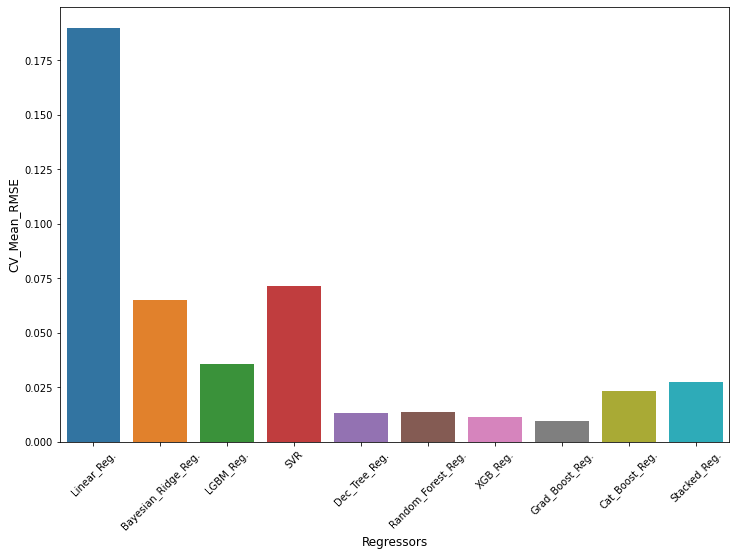

In [671]:
plt.figure(figsize = (12,8))
sns.barplot(final_cv_score['Regressors'],final_cv_score['RMSE_mean'])
plt.xlabel('Regressors', fontsize = 12)
plt.ylabel('CV_Mean_RMSE', fontsize = 12)
plt.xticks(rotation=45)
plt.show()